<h1><center> Сегментация пользователей Метанпромбанка по потреблению </center></h1>

---

В нашем распоряжении данные Метанпромбанка по пользователям из нескольких городов. 

Нам следует понять разницу между теми клиентами, которые уже пользуются **многими** продуктами и теми, кто пользуется **немногими**. Деление должно происходить с учётом географии, пола и возраста. Сегментация необходима для того, чтобы не упустить чего-то важного в каком-то общем смешанном показателе. Решается проблема удержания клиентов, идеи по привлечению приветствуются. 

**Цель исследования** - уменьшение оттока клиентов. 

Так начнём же.

---

### <center> Декомпозиция работы </center>

**Шаг 1. Получение и уточнение задания.**

Цель исследования: нахождение разницы между теми клиентами, которые пользуются многими продуктами и теми, кто пользуется немногими

**Шаг 2. Загрузка, ознакомление и предобработка данных.**
*    1  Ознакомление с данными
*    2  Переименование столбцов
*    3  Обработка пропусков
*    4  Обработка дубликатов
*    5  Замена типа данных
*    6  Добавление столбцов

**Шаг 3. Исследовательский анализ данных.**
1. Изучение параметров, анализ распределений и выбивающихся значений
- `score` — баллы кредитного рейтинга;
- `Age` — возраст;
- `Objects` — количество объектов в собственности;
- `Balance` — баланс на счёте;
- `Products` — количество продуктов, которыми пользуется клиент;
- `CreditCard` — есть ли кредитная карта;
- `Loyalty` — активный клиент;
- `estimated_salary` — предполагаемая заработная плата клиента;
- `Churn` — ушёл или нет.


2. анализ общих характеристик (квартили, средние значения, стандартные отклонения)
- без выбивающихся значений
- с выбивающимися значениями


3. факторы, влияющие на отток клиентов
- `score`
- `City`
- `Gender`
- `Age`
- `Objects`
- `Balance`
- `Products`
- `CreditCard`
- `Loyalty`
- `estimated_salary`


4. Построение матрицы корреляций, кодирование get_dummies.

**Шаг 4. Сегментация пользователей. Поиск взаимосвязей.**
* 1  Сегментация пользователей по географии
* 2  Сегментация пользователей по полу
* 3  Сегментация пользователей по возрасту
* 4  Сегментация пользователей по количеству используемых продуктов

**Шаг 5. Формулировка и проверка статистических гипотез.**
* 1  Проверка гипотезы о разнице дохода клиентов с разным количеством продуктов
* 2  Проверка секретной гипотезы

**Шаг 6. Выводы и рекомендации.**

**Шаг 7. Презентация.**
- титульный слайд;
- описание работы с целью исследования;
- слайд с общими выводами работы;
- слайды, демонстрирующие ключевые моменты работы: исследовательского анализа данных, сегментации и проверки гипотез;
- заключительный слайд.

---
## <center> 1. Подготовка данных </center> 

Импотрируем все необходимые библиотеки и warnings, а также установим некоторые параметры:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display_html 
from scipy import stats as st
import math as mth
plt.rcParams["figure.figsize"] = (15, 6)
pd.set_option("max_colwidth", 130)
pd.set_option("precision", 2)
import warnings
warnings.simplefilter("ignore")

---
> ### 1.1 Ознакомление с данными

Теперь откроем файл data.csv и сохраним его в переменной df, а затем ознакомимся с ним:

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/bank_dataset.csv')

In [3]:
print('\033[1m' + 'Типы данных:', '\033[0m')
df.info()
print('')

#for index in df:
#    print('\033[1m' + 'Столбец', index, '\033[0m')
#    print(df[index].unique())
#    print('')

display(df.describe())

print('')
print('\033[1m' + 'Количество пропусков в столбцах:', '\033[0m')
print(df.isna().sum());

#print('\033[1m' + 'Количество дубликатов:', df.duplicated().sum(), '\033[0m')

#df.head()
#df.tail()

Типы данных: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           6383 non-null   float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB



,userid,score,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
count,1.00e+04,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,1.57e+07,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,7.19e+04,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,1.56e+07,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,1.57e+07,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,1.57e+07,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.0
75%,1.58e+07,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,1.59e+07,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0



Количество пропусков в столбцах: 
userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64


Данным необходима некоторая предобработка. С другой стороны, у нас нет явных дубликатов. Приступим.

---
> ### 1.2 Переименование столбцов

Названия столбцов требуют правки - имеется разный регистр и несколько невнятные названия:

In [4]:
df.columns = [x.lower() for x in df.columns.values]
df = df.rename(columns={'userid': 'user_id', 'creditcard': 'credit_card'})
df.tail(2)

,user_id,score,city,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1
9999,15671055,792,Ярославль,Ж,28,4,130142.79,1,1,0,38190.78,0


Порядок!

---
> ### 1.3 Обработка пропусков

Первичное ознакомление с данными показало наличие 3617 пропусков в столбце balance, это около трети данных. Изучим пропуски:

In [5]:
losses = df.groupby(df['balance'].isnull()).mean()

idx = pd.IndexSlice
slice_ = idx[[1, 1], ['products', 'churn']]
losses.style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
balance,,,,,,,,,,
False,15733104.80,651.14,39.20,4.98,119827.49,1.39,0.70,0.51,100717.35,0.24
True,15734685.59,649.45,38.43,5.07,nan,1.78,0.72,0.52,98983.56,0.14


Первично мы видим, что у клиентов с пропущенными значениями в среднем больше продуктов и ниже вероятность оттока. Выделим клиентов с пропусками в отдельный датасет:

In [6]:
nans = df[df.isnull().any(1)].reset_index(drop=True)

Средние показатели мы изучили выше, посмотрим остальные столбцы:

In [7]:
print(nans['city'].value_counts())

Ярославль    2418
Рыбинск      1199
Name: city, dtype: int64


Вот и новая зацепка - пропуски только у пользователей из Ярославля и Рыбинска, причём в Ярославле их в два раза больше, но, возможно, и клиентов в Ярославле в два раза больше - соотношение пропусков мы ещё посмотрим. Проверим также пропуски в разделении по полу клиентов:

In [8]:
print(nans['gender'].value_counts())

М    1963
Ж    1654
Name: gender, dtype: int64


Здесь каких-то явных сюрпризов не оказалось. Для возможности прямого сравнения городов соберём ещё два датасета: с пользователями из Ростова Великого и с пользователями из Ярославля и Рыбинска без пропусков:

In [9]:
rostov_no_nans = df[df['city'] == 'Ростов Великий'].reset_index(drop=True)
yar_n_ryb_no_nans = df[df['city'] != 'Ростов Великий'].dropna().reset_index(drop=True)

Изучим три полученных датасета (*1. Ростов Великий без пропусков; 2. Ярославль и Рыбинск без пропусков; 3. Ярославль и Рыбинск с пропусками*) методом describe. Для этого создадим функцию, и выделим интересующие нас ячейки:

In [10]:
def describer(some_dataset, city_name):
    idx = pd.IndexSlice
    slice_ = idx[[1, 1], ['products', 'churn']]
    print(' ')
    print('\033[1m' + city_name, '\033[0m')
    display(some_dataset.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_))

Передадим датасеты функции через цикл и непосредственно изучим результаты describe:

In [11]:
sets_for_describer = [[rostov_no_nans, 'Ростов Великий без пропусков:'],\
                      [yar_n_ryb_no_nans, 'Ярославль и Рыбинск без пропусков:'],\
                      [nans, 'Ярославль и Рыбинск с пропусками:']]
for i, d in sets_for_describer:
    describer(i, d)

 
Ростов Великий без пропусков: 


,index,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,2509.00,2509.00,2509.00,2509.00,2509.00,2509.00,2509.00,2509.00,2509.00,2509.00
1,mean,15733291.65,651.45,39.77,5.01,119730.12,1.52,0.71,0.50,101113.44,0.32
2,std,73228.43,98.17,10.52,2.94,27022.01,0.62,0.45,0.50,58263.01,0.47
3,min,15608515.00,350.00,18.00,0.00,27288.43,1.00,0.00,0.00,11.58,0.00
4,25%,15670131.00,584.00,32.00,2.00,102800.72,1.00,0.00,0.00,51016.02,0.00
5,50%,15732622.00,651.00,38.00,5.00,119703.10,1.00,1.00,0.00,102397.22,0.00
6,75%,15798467.00,722.00,45.00,8.00,137560.38,2.00,1.00,1.00,151083.80,1.00
7,max,15858392.00,850.00,84.00,10.00,214346.96,4.00,1.00,1.00,199970.74,1.00


 
Ярославль и Рыбинск без пропусков: 


,index,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,3874.00,3874.00,3874.00,3874.00,3874.00,3874.00,3874.00,3874.00,3874.00,3874.00
1,mean,15732983.78,650.93,38.83,4.96,119890.56,1.30,0.69,0.52,100460.83,0.19
2,std,71084.22,96.14,10.43,2.89,31931.15,0.53,0.46,0.50,56807.41,0.39
3,min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,123.07,0.00
4,25%,15671415.75,584.00,32.00,2.00,98367.31,1.00,0.00,0.00,52429.99,0.00
5,50%,15732154.50,653.50,37.00,5.00,120032.47,1.00,1.00,1.00,100754.45,0.00
6,75%,15794425.50,716.00,44.00,7.00,140987.19,2.00,1.00,1.00,148970.42,0.00
7,max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199953.33,1.00


 
Ярославль и Рыбинск с пропусками: 


,index,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,3617.00,3617.00,3617.00,3617.00,0.00,3617.00,3617.00,3617.00,3617.00,3617.00
1,mean,15734685.59,649.45,38.43,5.07,nan,1.78,0.72,0.52,98983.56,0.14
2,std,71947.49,96.16,10.49,2.86,nan,0.50,0.45,0.50,57730.83,0.35
3,min,15608442.00,350.00,18.00,0.00,nan,1.00,0.00,0.00,90.07,0.00
4,25%,15672255.00,583.00,31.00,3.00,nan,1.00,0.00,0.00,49506.82,0.00
5,50%,15736083.00,651.00,37.00,5.00,nan,2.00,1.00,1.00,98618.79,0.00
6,75%,15796286.00,717.00,43.00,7.00,nan,2.00,1.00,1.00,148330.97,0.00
7,max,15858100.00,850.00,88.00,10.00,nan,4.00,1.00,1.00,199992.48,1.00


Итак, мы видим следующие особенности:

- Во-первых, очевидно, что в **Ярославле и Рыбинске пропуски в столбце balance находятся почти в половине данных**. 
- Во-вторых, у клиентов из **Ростова Великого средний отток почти в два раза выше**, чем у клиентов из Ярославля и Рыбинска без пропусков в balance (что, в свою очередь примерно на четверь выше, чем у клиентов с пропусками).
- В-третьих, мы видим в в Ярославле и Рыбинске некоторую корреляцию между количеством продуктов и оттоком - **чем меньше продуктов - тем меньше вероятность оттока**. Т.е. у клиентов с пропусками в balance примерно на четверть больше продуктов и они реже уходят.

Тем не менее, причина наличия пропусков не ясна. Можно было бы предположить, что пропуски вызваны наличием исключительно кредитных продуктов, либо, например только мобильного приложения или сейфовой ячейки, но маловероятно, чтобы не было ни одного такого клиента в Ростове Великом. Попробуем посмотреть отдельно на Ярославль и Рыбинск:

In [12]:
yar = df[df['city'] == 'Ярославль'].reset_index(drop=True)
ryb = df[df['city'] == 'Рыбинск'].reset_index(drop=True)

In [13]:
print('Пропусков в Ярославле:', yar['balance'].isna().sum(), ', ', round((yar['balance'].isna().sum())\
      / (len(yar)), 2), '% данных')
print('Пропусков в Рыбинске:', ryb['balance'].isna().sum(), ', ', round((ryb['balance'].isna().sum())\
      / (len(ryb)), 2), '% данных')

Пропусков в Ярославле: 2418 ,  0.48 % данных
Пропусков в Рыбинске: 1199 ,  0.48 % данных


Интересно, что процент пропусков совпадает в обоих городах - это может говорить о единой причине их возникновения. На данном этапе **предположим, что причиной является технический сбой - например, при выгрузке из базы данных по 48% были без указания баланса**, либо он просто не загрузился, а возможно не был указан в той базе, где хранились данные. Возможно, причину удастся найти далее. Продолжим.

---
> ### 1.4 Обработка дубликатов

Явных дубликатов нет, попробуем найти неявные. Сначала убедимся, что количество уникальных user_id соответствует количеству записей в датасете:

In [14]:
df.user_id.nunique()

10000

Отлично, теперь попробуем посмотреть датасет без user_id. Хотя это и не самый показательный вариант, он может навести нас на какие-то идеи:

In [15]:
df_without_id = df.drop('user_id', axis = 1)
df_without_id.duplicated().sum()

0

Что ж, неявных дубликатов нет.

---
> ### 1.5 Добавление столбцов

Учитывая то, что мы работаем с сегментацией - то нам следует разделить клиентов как минимум по трём параметрам - возрастная группа, уровень дохода, надёжность заёмщика. Эти категории могут помочь нам в дальнейшем изучении данных.

---
#### Возрастная группа

Разделим клиентов на 3 возрастные группы:
- Молодые, до 35 лет;
- Взрослые, 36 - 60 лет;
- Пенсионеры, 61 и старше.

In [16]:
age_groups = []

for ager in df.age:
    if ager < 36:
        age_groups.append('Молодые')
    elif ager < 61:
        age_groups.append('Взрослые')
    else:
        age_groups.append('Пенсионеры')
        
df.insert(5, 'age_group', age_groups, allow_duplicates = False)

---
#### Уровень дохода

Определим 3 группы доходности:
- Ниже среднего, менее 1 квартиля;
- Средний, от 1 до 3 квартиля;
- Выше среднего, выше 3 квартиля.

Для этого ещё раз вызовем метод describe:

In [17]:
slice_ = idx[[4, 5, 6], ['estimated_salary']]
df.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.00
1,mean,15733676.57,650.53,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.20
2,std,71936.19,96.65,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.40
3,min,15608437.00,350.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.00
4,25%,15671264.25,584.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.00
5,50%,15733474.00,652.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.00
6,75%,15795969.75,718.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.00
7,max,15858426.00,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


Замечательно! Теперь добавим столбец с группами:

In [18]:
income_groups = []

for dollar in df.estimated_salary:
    if dollar < 51002:
        income_groups.append('Ниже среднего')
    elif dollar < 149388:
        income_groups.append('Средний')
    else:
        income_groups.append('Выше среднего')
        
df.insert(12, 'income_group', income_groups, allow_duplicates = False)

---
#### Кредитный рейтинг

Оценки кредитного рейтинга похожи на оценки НБКИ. Выделим 4 категории кредитного рейтинга:
- 700-850 баллов: отлично (5);
- 550-699: хорошо (4);
- 450-549: удовлетворительно (3);
- 350-449: плохо (2).

In [19]:
credit_groups = []

for loan in df.score:
    if loan < 449:
        credit_groups.append(2)
    elif loan < 549:
        credit_groups.append(3)
    elif loan < 699:
        credit_groups.append(4)
    else:
        credit_groups.append(5)
        
df.insert(2, 'rating', credit_groups, allow_duplicates = False)

Взглянем на полученный датасет:

In [20]:
df.tail()

,user_id,score,rating,city,gender,age,age_group,objects,balance,products,credit_card,loyalty,estimated_salary,income_group,churn
9995,15648965,771,5,Ярославль,М,39,Взрослые,5,NaN,2,1,0,96270.64,Средний,0
9996,15612628,516,3,Ярославль,М,35,Молодые,10,57369.61,1,1,1,101699.77,Средний,0
9997,15627268,709,5,Ярославль,Ж,36,Взрослые,7,NaN,1,0,1,42085.58,Ниже среднего,1
9998,15725091,772,5,Ростов Великий,М,42,Взрослые,3,75075.31,2,1,0,92888.52,Средний,1
9999,15671055,792,5,Ярославль,Ж,28,Молодые,4,130142.79,1,1,0,38190.78,Ниже среднего,0


Очень хорошо.

---

**Выводы**

Мы загрузили данные и выполнили их предобработку, а именно:
- переминовали столбцы;
- ознакомились с пропусками в столбце balance, и хотя их причину установить не удалось, мы увидели, что **пропуски есть у 48% пользователей, но только из Ярославля и Рыбинска**;
- убедились, что в данных нет дубликатов;
- добавили столбцы с возрасными группами, уровнем дохода и оценкой кредитного рейтинга.

Продолжим работу.

---

---
## <center> 2. Исследовательский анализ данных </center>

Нам следует изучить параметры, проанализировать распределения и общие характеристики (квартили, средние значения, стандартные отклонения), факторы, влияющие на отток клиентов и построить матрицу корреляций.

---
> ### 2.1 Изучение рапределений и параметров

Начнём с анализа распределений по столбцам и выбросов в них, что затронет:

- `score` — баллы кредитного рейтинга;
- `rating` — оценка кредитного рейтинга;
- `age` — возраст;
- `objects` — количество объектов в собственности;
- `balance` — баланс на счёте;
- `products` — количество продуктов, которыми пользуется клиент;
- `credit_card` — есть ли кредитная карта;
- `loyalty` — активный клиент;
- `estimated_salary` — предполагаемая заработная плата клиента;
- `churn` — ушёл или нет.

Так как нам предстоит смотреть схожие гистограммы и боксплоты - определим для них функции:

In [21]:
def wonderful_hist(wonderful_title, w_x_l, w_y_l, w_l_r, w_set, w_bins, w_color, w_r_min, w_r_max):
    plt.figure(figsize=(15, 6))
    plt.title(wonderful_title, fontsize=15)
    plt.xlabel(w_x_l, fontsize=12)
    plt.ylabel(w_y_l, fontsize=12)
    plt.tick_params(axis='both', labelsize=10, labelrotation=w_l_r)
    w_set.hist(bins=w_bins, color=w_color, range=(w_r_min, w_r_max), edgecolor='#888888', grid=False)
    return plt.show()

In [22]:
def amazing_boxplot(amazing_title, a_set, a_color, a_x_l):
    plt.figure(figsize=(15, 6))
    plt.title(amazing_title, fontsize=15)
    sns.boxplot(a_set, color=a_color)
    plt.xlabel(a_x_l, fontsize=12)
    return plt.show()

---
#### Столбец score

Передадим нашей функции необходимые аргументы и ознакомимся с результатами:

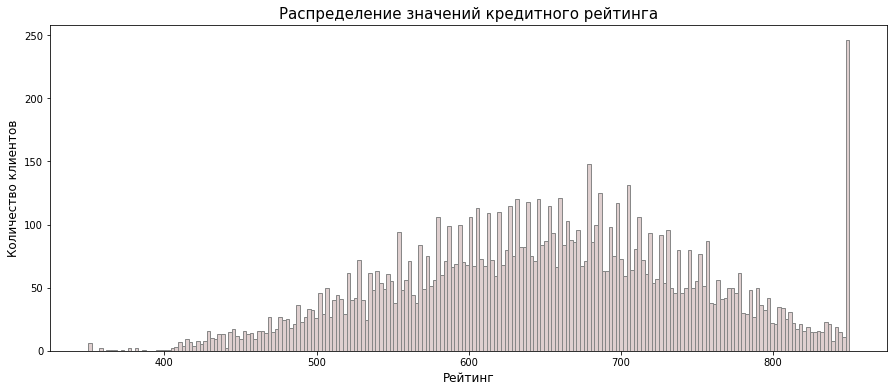

In [23]:
wonderful_hist('Распределение значений кредитного рейтинга', 'Рейтинг', 'Количество клиентов',\
               0, df.score, 212, '#dfcfcf', 350, 850)

В целом, распределение нормальное, но количество клиентов с асболютно максимальным рейтингом выглядит маловероятным. Посмотрим, сколько их:

In [24]:
len(df[df.score == 850])

233

Посмотрим, что покажет боксплот:

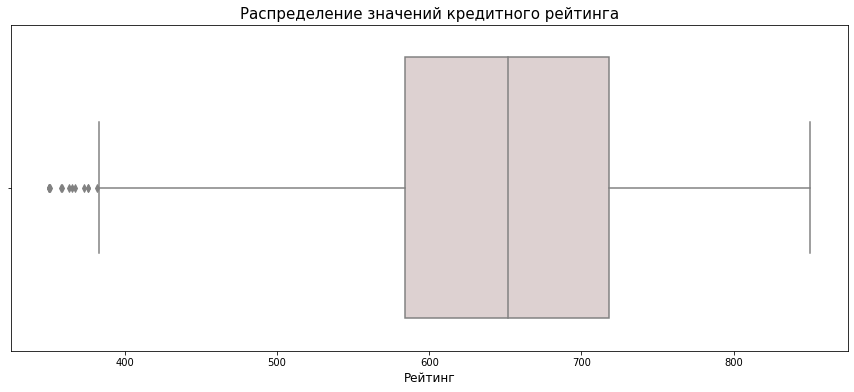

In [25]:
amazing_boxplot('Распределение значений кредитного рейтинга', df.score, '#dfcfcf', 'Рейтинг')

Боксплот показывает, что 233 клиента с максимальным кредитным рейтингом - не выбросы. Зато выбросами он посчитал клиентов с рейтингом менее примерно 385. Вычислим точное значение - для этого составим функцию, учитывающую, что "усы" боксплота показывают 1.5 межквартильного размаха:

In [26]:
def min_whisker(column):
    table = column.describe().reset_index(drop=True)
    return print('Нижняя граница:', int(table[4] - ((table[6] - table[4]) * 1.5)))

In [27]:
min_whisker(df.score)

Нижняя граница: 383


Почти угадали! Подсчитаем сколько выбросов и удалим, если их немного, предварительно сохранив датасет с выбросами:

In [28]:
len(df[df.score < 383])

15

In [29]:
df_original = df

In [30]:
df = df.query('score >= 383').reset_index(drop=True)

Тем не менее, около 2% клиентов с максимально возможным рейтингом остаются внутри нормального распределения. Придётся пока их оставить, но мы возьмём это на заметку для дальнейшей работы.

---
#### Столбец rating

Этот столбец мы создали на основе предыдущего, поэтому сюрпризов быть не должно. Тем не менее, ознакомимся с данными:

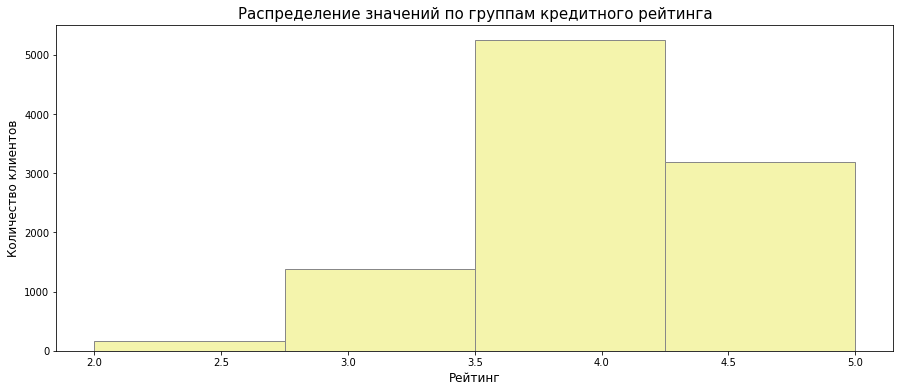

In [31]:
wonderful_hist('Распределение значений по группам кредитного рейтинга', 'Рейтинг',\
               'Количество клиентов', 0, df.rating, 4, '#f4f4ac', 2, 5)

По большей части, у клиентов хороший рейтинг. Взглянем на боксплот:

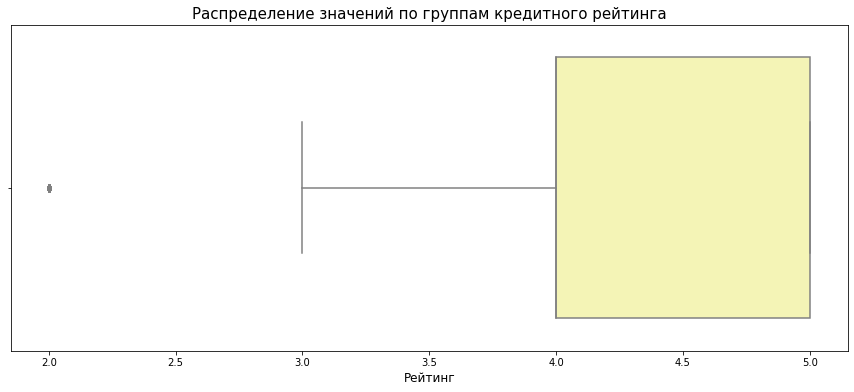

In [32]:
amazing_boxplot('Распределение значений по группам кредитного рейтинга', df.rating, '#fefeac', 'Рейтинг')

Выглядит необычно! Взглянем, как распределены оценки классическим value_counts:

In [33]:
df.rating.value_counts()

4    5246
5    3188
3    1387
2     164
Name: rating, dtype: int64

164 "двоечника". Рассмотрим средние значения в разбивке по оценкам кредитного рейтинга:

In [34]:
slice_ = idx[[0], ['churn']]
df.groupby('rating').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,rating,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,2,15733779.89,429.40,40.79,4.99,118327.94,1.49,0.74,0.47,95890.19,0.28
1,3,15732461.19,510.44,38.77,5.04,119999.13,1.51,0.70,0.50,100790.83,0.21
2,4,15733136.63,629.03,38.95,5.00,119865.69,1.53,0.71,0.52,99625.76,0.20
3,5,15734944.73,759.60,38.83,5.03,119717.70,1.54,0.71,0.52,100587.12,0.20


В целом более-менее равные показатели, **отток у "двоечников" немного выше остальных**, но мы уже виедли, что их так мало, что боксплот показал их как выбросы. Мы запомним этот момент, но, тем не менее, продолжим работу без них.

In [35]:
df = df.query('rating >= 3').reset_index(drop=True)

---
#### Столбец age

Смотреть распределение возрастов всегда интересно, передадим аргументы функции wonderful_hist:

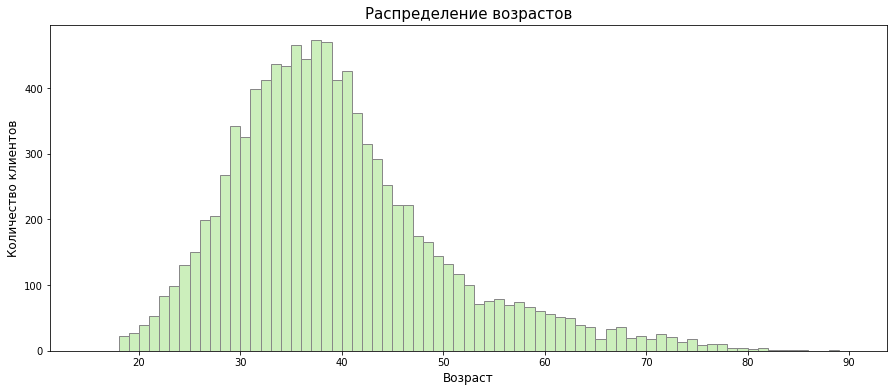

In [36]:
wonderful_hist('Распределение возрастов', 'Возраст', 'Количество клиентов', 0, df.age, 75, '#ccefbc', 15, 90)

Распределение в целом нормальное, посмотрим ящик:

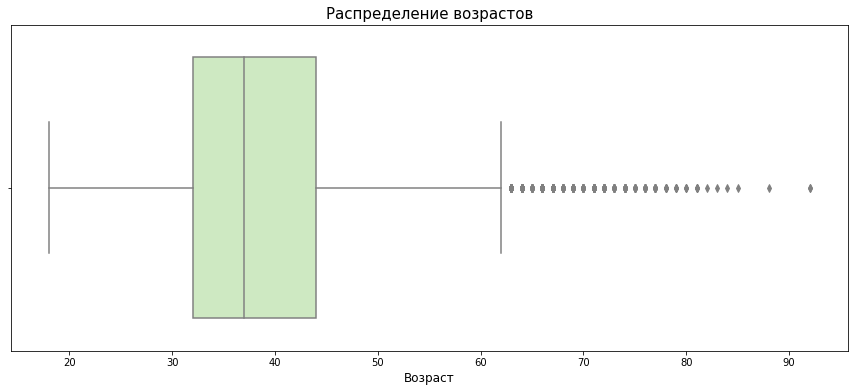

In [37]:
amazing_boxplot('Распределение возрастов', df.age, '#ccefbc', 'Возраст')

Интересно, согласну графику - пенсионеры в нашем банке - это выбросы. Взглянем подробнее, для чего создадим функцию расчёта "правого уса":

In [38]:
def max_whisker(column):
    table = column.describe().reset_index(drop=True)
    return print('Верхняя граница:', int(table[6] + ((table[6] - table[4]) * 1.5)))

In [39]:
max_whisker(df.age)

Верхняя граница: 62


In [40]:
len(df[df.age > 62])

353

Примерно 3.5% наших данных составляют клиенты старше 62 лет, и это выбросы. Перед тем как оставить их позади, посмотрим на статистику по ним:

In [41]:
slice_ = idx[[1], ['loyalty', 'churn']]
df.query('age > 62').describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,rating,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,353.00,353.00,353.00,353.00,353.00,220.00,353.00,353.00,353.00,353.00,353.00
1,mean,15733960.02,660.84,4.18,69.27,4.92,118622.42,1.52,0.71,0.84,97381.53,0.20
2,std,74166.90,91.61,0.66,5.20,2.98,30354.20,0.58,0.45,0.37,57405.95,0.40
3,min,15609425.00,456.00,3.00,63.00,0.00,27288.43,1.00,0.00,0.00,502.70,0.00
4,25%,15671735.00,598.00,4.00,65.00,2.00,98827.60,1.00,0.00,1.00,49506.82,0.00
5,50%,15727248.00,659.00,4.00,68.00,5.00,120443.79,1.00,1.00,1.00,96399.67,0.00
6,75%,15801876.00,721.00,5.00,72.00,7.00,137901.69,2.00,1.00,1.00,144727.45,0.00
7,max,15858362.00,850.00,5.00,92.00,10.00,187013.13,4.00,1.00,1.00,199493.38,1.00


Характерны довольно высокая средняя активность и низкий отток. Учитывая, что оригинальный датасет мы сохранили для дальнейшей работы, оставим эту категорию клиентов позади.

In [42]:
df = df.query('age <= 62').reset_index(drop=True)

Проверим средние по возрастам:

In [43]:
slice_ = idx[22]
df.groupby('age').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,age,user_id,score,rating,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,18,15746003.18,686.68,4.36,4.82,124409.33,1.50,0.64,0.59,85102.39,0.09
1,19,15740504.81,665.63,4.33,5.07,118973.04,1.37,0.81,0.56,97734.10,0.04
2,20,15748182.70,665.05,4.22,5.08,132241.55,1.55,0.65,0.47,97705.54,0.05
3,21,15739855.32,647.28,4.21,4.77,121943.18,1.66,0.72,0.60,102536.67,0.06
4,22,15727066.98,639.10,4.04,5.66,118304.37,1.52,0.70,0.54,97863.26,0.13
5,23,15719475.14,657.78,4.23,5.41,121473.88,1.53,0.68,0.45,110148.37,0.06
6,24,15728361.82,655.42,4.22,5.04,120469.15,1.51,0.69,0.53,107645.53,0.11
7,25,15737902.49,648.26,4.11,5.22,123140.91,1.61,0.71,0.55,97748.57,0.04
8,26,15731326.98,649.85,4.19,5.01,118750.57,1.52,0.70,0.50,102558.03,0.07
9,27,15735692.77,646.94,4.13,4.88,123823.56,1.57,0.71,0.46,101296.51,0.06


В целом все значения примерно равны. Кроме одного - очевидно, **у клиентов примерно до 40 лет отток ощутимо ниже**, а после 40 - начинается. Построим таблицу, чтобы понимать детальнее:

In [44]:
age_and_churn = df.groupby('age')['churn'].mean().reset_index()

Метод hist нам не подойдёт - понадобится seaborn, поэтому сразу запакуем функцию:

In [45]:
def best_plot_ever(best_data, b_x, b_y, b_color, b_title, s, round_to, b_x_l, b_y_l):
    plt.figure(figsize=(15, 6))
    sns.barplot(data=best_data, x=b_x, y=b_y, linewidth=1, edgecolor='#888888', color=b_color)
    plt.title(b_title, fontsize=15)
    for i, val in enumerate(best_data[b_y].values):
        plt.text(i, val, round(val, round_to), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':s})
    plt.xlabel(b_x_l, fontsize=12)
    plt.ylabel(b_y_l,fontsize=12)
    plt.tick_params(axis='both',labelsize=10)
    plt.show()

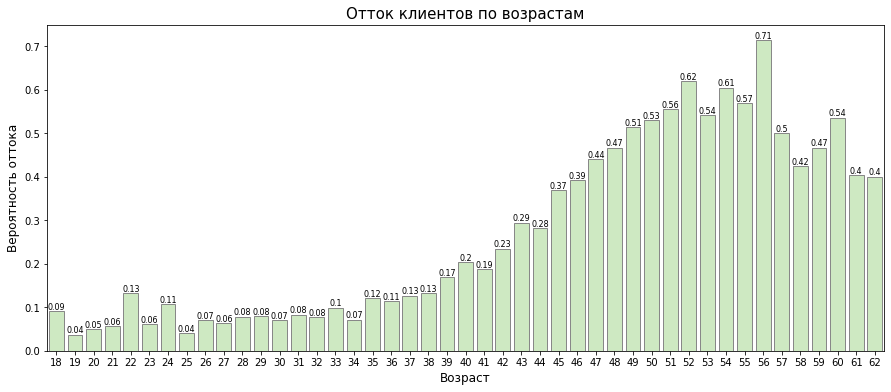

In [46]:
best_plot_ever(age_and_churn, 'age', 'churn', '#ccefbc', 'Отток клиентов по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

Это крайне важный показатель для нашего исследования! Уже с 39 лет клиенты начинают "задумываться" об уходе, но **особенно активно уходят клиенты 45+**. Запомним.

---
#### Столбец objects

Ознакомимся с рапределением количества объектов в собственности у клиентов:

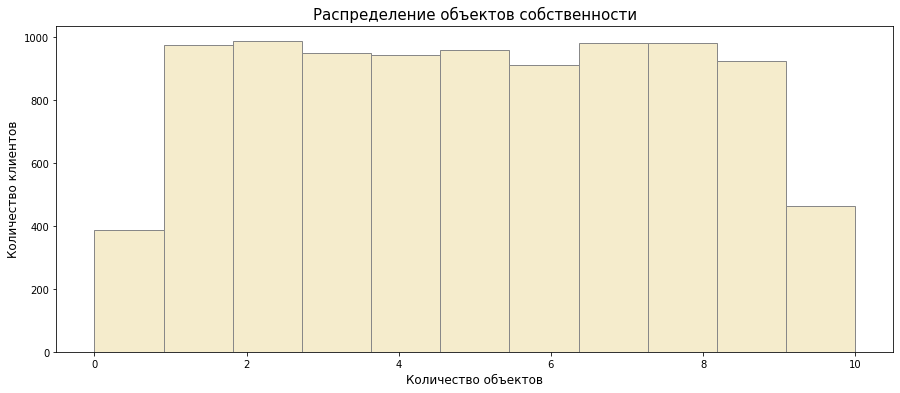

In [47]:
wonderful_hist('Распределение объектов собственности', 'Количество объектов',\
               'Количество клиентов', 0, df.objects, 11, '#f5eccc', 0, 10)

Распределение несколько неожиданное, построим боксплот:

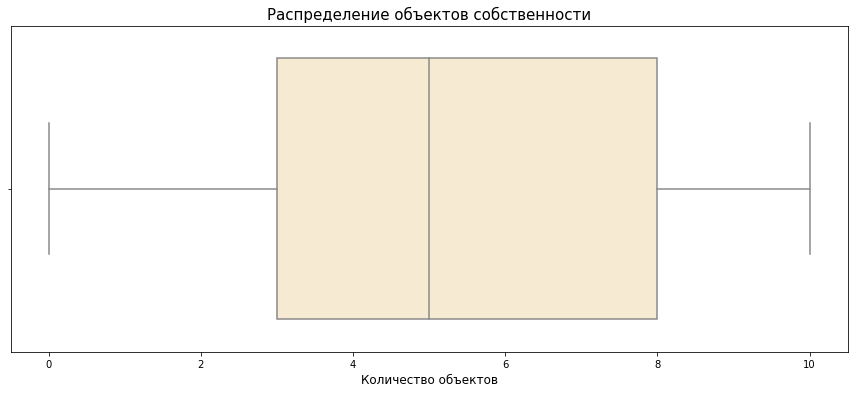

In [48]:
amazing_boxplot('Распределение объектов собственности', df.objects, '#fceccc', 'Количество объектов')

Все показания находятся в границах статистически значимой выборки. Проверим средние значения в разбивке по объектам:

In [49]:
df.groupby('objects').mean()

,user_id,score,rating,age,balance,products,credit_card,loyalty,estimated_salary,churn
objects,,,,,,,,,,
0,1.57e+07,656.58,4.18,38.08,119926.83,1.44,0.65,0.51,102158.61,0.23
1,1.57e+07,652.03,4.17,38.10,118525.21,1.49,0.68,0.54,100409.06,0.22
2,1.57e+07,658.90,4.21,37.96,120635.90,1.59,0.71,0.52,98465.24,0.19
3,1.57e+07,655.13,4.20,37.74,119685.79,1.53,0.72,0.51,97421.34,0.20
4,1.57e+07,654.09,4.18,37.17,118236.59,1.51,0.71,0.50,99882.37,0.20
5,1.57e+07,652.88,4.17,38.02,121167.57,1.56,0.69,0.49,102083.72,0.21
6,1.57e+07,652.72,4.17,37.65,120048.82,1.53,0.71,0.51,99358.60,0.20
7,1.57e+07,653.20,4.17,37.50,120947.00,1.53,0.71,0.51,100928.40,0.17
8,1.57e+07,651.50,4.15,37.57,120691.02,1.52,0.72,0.50,100817.03,0.19


Ничего интересного.

---
#### Столбец balance

На этапе предобработки мы видели множество пропусков в этом столбце. Посмотрим, что удастся обнаружить с помощью графиков, но сначала выделим отдельный набор данных, чтобы не возникло проблем из-за пропусков:

In [50]:
df_balance = df.balance.dropna().reset_index(drop=True).sort_values().reset_index(drop=True)
df_balance.nunique()

6052

В столбце с балансом более 6000 уникальных значений, что не даёт нам возможности увидеть распределение. Посмотрим на боксплот:

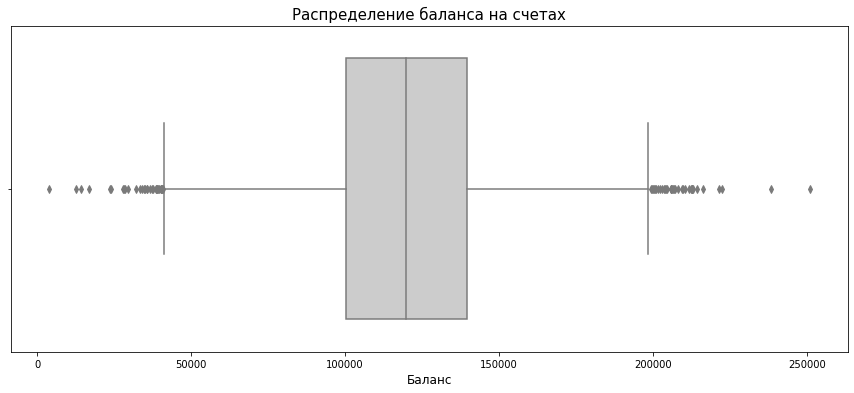

In [51]:
amazing_boxplot('Распределение баланса на счетах', df_balance, '#cccccc', 'Баланс')

Выбросов здесь немало. Учитывая, что мы и так имеем дело с большим количесвтом пропусков, избавляться от многих выбросов нежелательно. Определим точные границы и посчитаем количество:

In [52]:
max_whisker(df_balance)
min_whisker(df_balance)

Верхняя граница: 198585
Нижняя граница: 41234


In [53]:
df_balance = df_balance.reset_index()

In [54]:
print('Выбросов в большую сторону:', len(df_balance[df_balance.balance > 198534]))
print('Выбросов в меньшую сторону:', len(df_balance[df_balance.balance < 41201]))

Выбросов в большую сторону: 37
Выбросов в меньшую сторону: 33


Выбросов немного - теоретически можно удалять. Но огромное количество пропусков нам всё еще нечем заменить, поэтому и выбросы придётся оставить тоже.

---
#### Столбец products

Начнём с распределения:

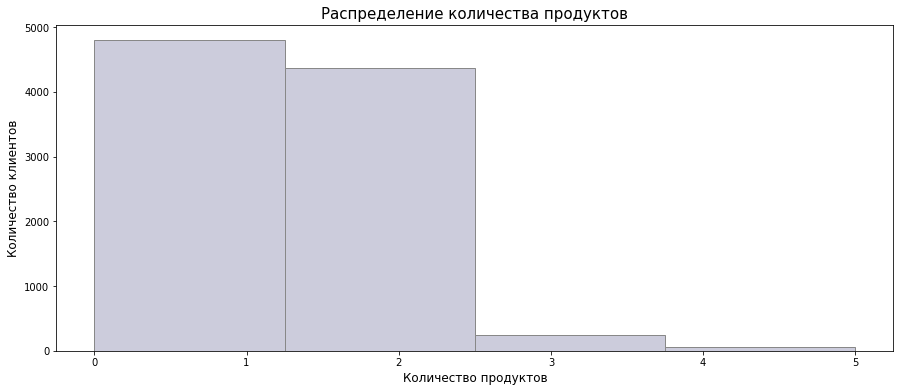

In [55]:
wonderful_hist('Распределение количества продуктов', 'Количество продуктов',\
               'Количество клиентов', 0, df.products, 4, '#ccccdc', 0, 5)

Большинство использует 1 продукт, а 3 и 4 - редкость. Проверим наличие выбросов:

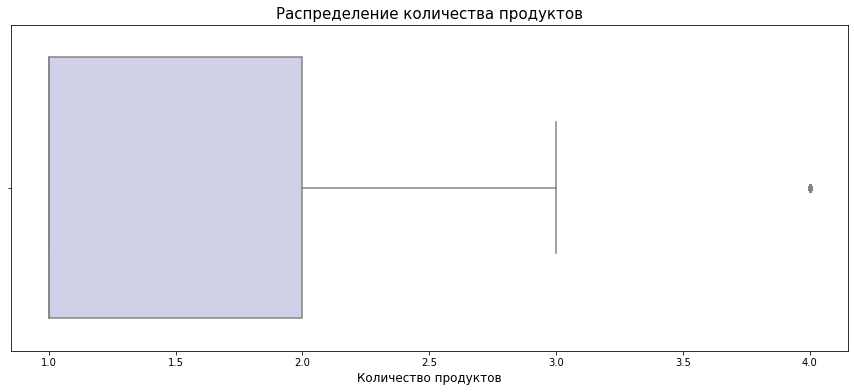

In [56]:
amazing_boxplot('Распределение количества продуктов', df.products, '#ccccec', 'Количество продуктов')

Нечто похожее мы наблюдали в оценках кредитного рейтинга - оставим без изменений. Взглянем на средние распределения:

In [57]:
slice_ = idx[[3], ['score', 'age', 'churn']]
df.groupby('products').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,products,user_id,score,rating,age,objects,balance,credit_card,loyalty,estimated_salary,churn
0,1,15732640.31,653.45,4.17,38.46,4.97,119927.40,0.70,0.49,99644.12,0.28
1,2,15734515.86,655.55,4.19,36.63,5.07,119780.16,0.71,0.52,100593.75,0.07
2,3,15740011.43,651.20,4.16,42.02,4.93,119026.10,0.72,0.43,104223.83,0.83
3,4,15718599.59,666.21,4.21,45.55,5.34,123016.93,0.66,0.48,99888.53,1.00


Клиенты с 4 продуктами в среднем уходят всегда! У этих клиентов выше кредитный рейтинг, и они несколько старше. Это важные детали, но также очень высокй отток у клиентов с 3 продуктами - 0.83, и они тоже старше, а вот клиенты с 2 продуктами почти не уходят. Посмотрим в цифрах, сколько таких клиентов:

In [58]:
df.products.value_counts()

1    4798
2    4365
3     249
4      56
Name: products, dtype: int64

Неудивительно, что боксплот показал их как выбросы. Мы сделаем первый вывод, и это важнейшая статистика для нашей работы, **если у клиента 4 продукта - значит он уйдёт**. Оставим их, так как исследование продуктов это ключевой вопрос задания, но объединим в одну группу:

In [59]:
df = df.replace({'products': {4: 3}})

---
#### Столбец credit_card

Взглянем на гистограмму, но для лучшего понимания соберём датасет из клиентов с кк и без неё:

In [60]:
cc = df.groupby('credit_card')['user_id'].count().reset_index()
cc.loc[cc['credit_card'] == 0, 'credit_card'] = 'нет кредитной карты'
cc.loc[cc['credit_card'] == 1, 'credit_card'] = 'есть кредитная карта'

Для добавления колонки с процентами создадим функцию "волшебный процент":

In [61]:
def wonder_percent(data_cent, column_cent, count_data):
    percentage = []
    for percenter in data_cent[column_cent]:
        percentage.append(str(round((percenter / len(count_data)) * 100, 2)) + '%') 
    data_cent['percent'] = percentage

Передадим аргументы функции, переименуем столбцы и взглянем на результат:

In [62]:
wonder_percent(cc, 'user_id', df)
cc.rename(columns={'user_id': 'clients'}, inplace=True)
cc

,credit_card,clients,percent
0,нет кредитной карты,2800,29.57%
1,есть кредитная карта,6668,70.43%


**Кредитная карта - крайне популярный продукт в нашем банке, у 70.5% она есть в наличии**, что является очень важной информацией для отдела маркетинга. Так как метод hist не выведет нам такую информацию в нужном виде, воспользуемся графиком seaborn:

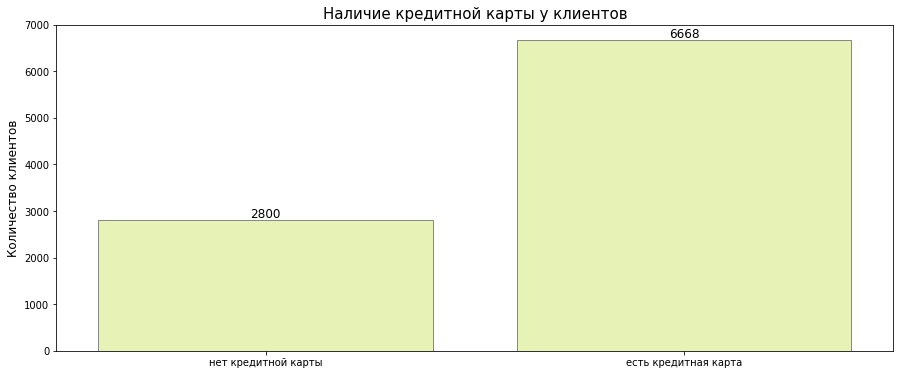

In [63]:
best_plot_ever(cc, 'credit_card', 'clients', '#ecfcac', 'Наличие кредитной карты у клиентов',\
               12, 0, ' ', 'Количество клиентов')

Строить боксплот здесь бессмысленно, взглянем на средние значения клиентов с кк:

In [64]:
df.groupby('credit_card').mean().reset_index()

,credit_card,user_id,score,rating,age,objects,balance,products,loyalty,estimated_salary,churn
0,0,1.57e+07,654.06,4.18,37.97,4.93,119494.32,1.52,0.51,101242.31,0.21
1,1,1.57e+07,654.59,4.19,37.66,5.06,120047.30,1.53,0.50,99767.73,0.20


Значительных различий нет.

---
#### Столбец loyalty

Посмотрим на активность клиентов:

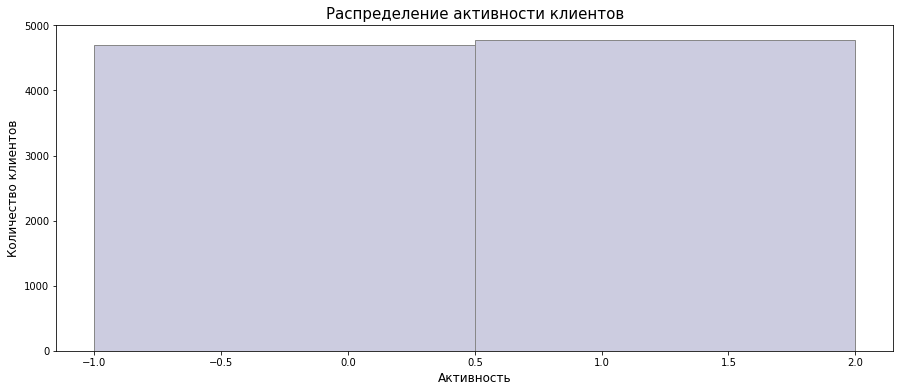

In [65]:
wonderful_hist('Распределение активности клиентов', 'Активность', 'Количество клиентов', 0, df.loyalty, 2, '#cccce0', -1, 2)

Распределение активных и неактивных примерно равное, посмотрим точное количество:

In [66]:
df.loyalty.value_counts()

1    4773
0    4695
Name: loyalty, dtype: int64

Боксплот здесь не пригодится, а средние значения посмотреть будет полезно:

In [67]:
slice_ = idx[['churn']]
df.groupby('loyalty').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,loyalty,user_id,score,rating,age,objects,balance,products,credit_card,estimated_salary,churn
0,0,15733536.56,652.67,4.17,37.59,5.09,120551.67,1.52,0.71,100699.02,0.26
1,1,15733693.74,656.17,4.19,37.91,4.94,119221.03,1.53,0.70,99716.70,0.14


**Отток активных клиентов ниже почти в 2 раза**! Это очень важная информация, хотя сам по себе отток невелик в обоих случаях.

---
#### Столбец estimated_salary

Говоря о доходах следует учесть следующие моменты: во-первых это _оценочный показатель_, а во-вторых, мы выделили три группы доходов именно в зависимости от распределения доходов. Значений здесь очень много, гистограмма нам не сможет показать что-либо важное, поэтому посмотрим боксплот:

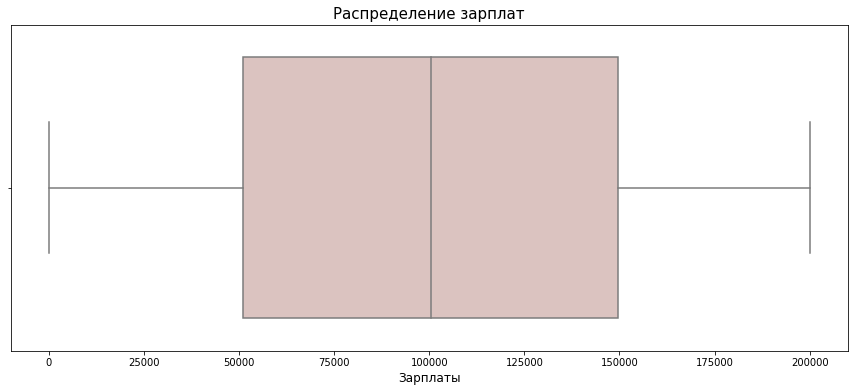

In [68]:
amazing_boxplot('Распределение зарплат', df.estimated_salary, '#dfbfbc', 'Зарплаты')

Видимо, программа, оценивающая уровень зарплат, стремилась создать идеальное распределение - выглядит странно, мы получили эталонный боксплот без выбросов. Что ж, продолжим работу.

---
#### Столбец churn

Пришло время изучить самый интересный столбец - отток клиентов:

In [69]:
churned = df.groupby('churn')['user_id'].count().reset_index()
churned.loc[churned['churn'] == 1, 'churn'] = 'ушедшие'
churned.loc[churned['churn'] == 0, 'churn'] = 'активные'

In [70]:
wonder_percent(churned, 'user_id', df)
churned.rename(columns={'user_id': 'clients'}, inplace=True)
churned

,churn,clients,percent
0,активные,7563,79.88%
1,ушедшие,1905,20.12%


Отток около 20% неприятен, взглянем на график:

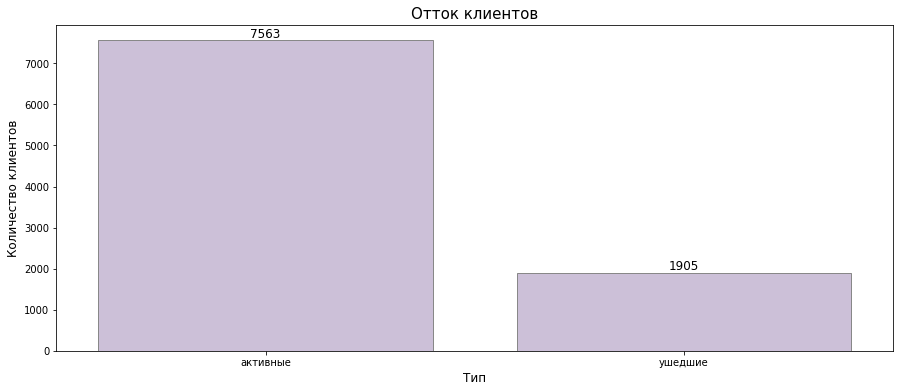

In [71]:
best_plot_ever(churned, 'churn', 'clients', '#ccbcdc', 'Отток клиентов', 12, 0, 'Тип', 'Количество клиентов')

Боксплот вновь не пригодится, а вот средние распределения без всех выбросов, которые остались позади стоит оценить:

In [72]:
slice_ = idx[['age', 'loyalty']]
df.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15733929.67,654.87,4.19,36.18,5.04,119600.46,1.55,0.71,0.54,99992.37
1,1,15732369.70,652.71,4.17,44.00,4.94,120779.89,1.45,0.70,0.36,101043.26


Мы видим два показателя, значительно отличающихся у клиентов - средний возраст, что мы уже заметили ранее, и средняя активность, на что мы также обращали внимание. **Клиенты оттока старше и менее активно пользуются продуктами банка**.  Ранее мы разделили датасет на города, почему бы не взглянуть сейчас - возможно мы увидим что-то интересное:

In [73]:
def displayer(dislayed_set, city_name):
    print(' ')
    print('\033[1m' + city_name, '\033[0m')
    display(dislayed_set.groupby('churn').mean().reset_index())

sets_for_displayer = [[rostov_no_nans, 'Ростов Великий:'],\
                      [yar, 'Ярославль:'],\
                      [ryb, 'Рыбинск:']]
for i, d in sets_for_displayer:
    displayer(i, d)

 
Ростов Великий: 


,churn,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,1.57e+07,653.26,37.31,5.01,119427.11,1.55,0.72,0.56,102414.66
1,1,1.57e+07,647.69,44.89,5.01,120361.08,1.45,0.71,0.36,98403.89


 
Ярославль: 


,churn,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,1.57e+07,651.16,37.24,5.01,119484.84,1.54,0.71,0.55,99217.10
1,1,1.57e+07,641.91,45.13,5.00,121915.78,1.48,0.70,0.37,103439.28


 
Рыбинск: 


,churn,user_id,score,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,1.57e+07,652.10,37.84,5.11,119820.56,1.54,0.70,0.57,98602.37
1,1,1.57e+07,647.48,44.15,4.66,119792.06,1.51,0.67,0.34,103629.55


Выводы те же, что и в общем по датасету - клиенты оттока старше и менее активно пользуются продуктами банка, существенных различий между городами нет.

Время перейти к следующему важному шагу.

---
> ### 2.2 Анализ общих характеристик

На этом шаге нам следует изучить квартили, средние значения и стандартные отклонения по всему датасету в два этапа: 
- без выбивающихся значений
- с выбивающимися значениями

По большому счёту, мы уже проверили все эти параметры на предыдущем шаге, теперь просто сопоставим два анализа. Не будем же терять ни минуты.

In [74]:
print('\033[1m' + 'Данные без выбросов:', '\033[0m')
display(df.describe())
print(' ')
print('\033[1m' + 'Данные с выбросами:', '\033[0m')
display(df_original.describe())

Данные без выбросов: 


,user_id,score,rating,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,9.47e+03,9468.00,9468.00,9468.00,9468.00,6054.00,9468.00,9468.00,9468.0,9468.00,9468.0
mean,1.57e+07,654.43,4.18,37.75,5.02,119880.42,1.53,0.70,0.5,100203.81,0.2
std,7.18e+04,92.48,0.66,8.79,2.89,30138.21,0.56,0.46,0.5,57556.32,0.4
min,1.56e+07,449.00,3.00,18.00,0.00,3768.69,1.00,0.00,0.0,11.58,0.0
25%,1.57e+07,587.00,4.00,32.00,3.00,100241.12,1.00,0.00,0.0,50957.30,0.0
50%,1.57e+07,654.00,4.00,37.00,5.00,119796.97,1.00,1.00,1.0,100416.10,0.0
75%,1.58e+07,719.00,5.00,43.00,8.00,139578.94,2.00,1.00,1.0,149522.27,0.0
max,1.59e+07,850.00,5.00,62.00,10.00,250898.09,3.00,1.00,1.0,199992.48,1.0


 
Данные с выбросами: 


,user_id,score,rating,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,1.00e+04,10000.00,10000.00,10000.00,10000.00,6383.00,10000.00,10000.00,10000.00,10000.00,10000.0
mean,1.57e+07,650.53,4.14,38.92,5.01,119827.49,1.53,0.71,0.52,100090.24,0.2
std,7.19e+04,96.65,0.71,10.49,2.89,30095.06,0.58,0.46,0.50,57510.49,0.4
min,1.56e+07,350.00,2.00,18.00,0.00,3768.69,1.00,0.00,0.00,11.58,0.0
25%,1.57e+07,584.00,4.00,32.00,3.00,100181.98,1.00,0.00,0.00,51002.11,0.0
50%,1.57e+07,652.00,4.00,37.00,5.00,119839.69,1.00,1.00,1.00,100193.91,0.0
75%,1.58e+07,718.00,5.00,44.00,7.00,139512.29,2.00,1.00,1.00,149388.25,0.0
max,1.59e+07,850.00,5.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.0


Значительных изменений нет, за исключением некоторых минимальных и максимальных показателей, за счет того, что мы их удалили - это 588 значений, т.е. 5.88% данных.

---
> ### 2.3 Факторы, влияющие на отток клиентов

Изучим связь оттока с факторами из следующих столбцов:

- `score`
- `rating`
- `city`
- `gender`
- `age`
- `age_group`
- `objects`
- `balance`
- `products`
- `credit_card`
- `loyalty`
- `estimated_salary`
- `income_group`
- `churn`

Вновь большая часть работы уже сделана ранее, но мы посмотрим другие графики, а также используем метод corr, который, возможно, поможет увидеть некоторые зависимости до построения матрицы корреляций. Снова создадим необходимые функции, первая будет строить scatterplot и считать коэффициент корреляции Пирсона:

In [75]:
def amazing_scatter(amazing_data, a_x, a_y, a_heading, a_x_l, a_y_l):
    plt.figure(figsize=(15, 6))
    sns.scatterplot(data=amazing_data, x=a_x, y=a_y, size=a_x, hue=a_y, sizes=(20, 200), legend=False).\
    set_title(a_heading, fontsize=15)
    plt.xlabel(a_x_l, fontsize=12,)
    plt.ylabel(a_y_l, fontsize=12)
    plt.show()
    print('\033[1m' + 'Корреляция:', round(amazing_data[a_x].corr(amazing_data[a_y]), 2), '\033[0m')

Определим функцию, которая покажет нам два датасета рядом:

In [76]:
def twin_pics(data_one, data_two):
    gone_clients_styler = data_one.style.set_table_attributes("style='display:inline'").set_caption('Ушедшие клиенты')
    devoted_clients_styler = data_two.style.set_table_attributes("style='display:inline'").set_caption('Активные клиенты')
    display_html(gone_clients_styler._repr_html_()+"\xa0\xa0\xa0\xa0\xa0\xa0"+devoted_clients_styler._repr_html_(), raw=True)

Создадим функцию, выводящую рядом два барплота:

In [77]:
def awesome_plot(common_suptitle, data_one, column_one, color_one, title_one, xlabel_one,\
                data_two, column_two, color_two, title_two, xlabel_two):

    fig, ax = plt.subplots(1, 2, figsize=(16,6))
    fig.suptitle(common_suptitle, fontsize=15, y=1.00)

    ax1 = sns.barplot(data=data_one, x=column_one, y='user_id', linewidth=1, edgecolor='#aaaaaa', color=color_one, ax=ax[0])
    for j, g in enumerate(data_one['user_id'].values):
        ax1.text(j, g, int(g), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    ax1.set_title(title_one, fontsize=14)
    ax1.set_xlabel(xlabel_one, fontsize=12)
    ax1.set_ylabel('Количество клиентов', fontsize=10);

    ax2 = sns.barplot(data=data_two, x=column_two, y='user_id', linewidth=1, edgecolor='#aaaaaa', color=color_two, ax=ax[1])
    for i, val in enumerate(data_two['user_id'].values):
        ax2.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'size':10})
    ax2.set_title(title_two, fontsize=14)
    ax2.set_xlabel(xlabel_two, fontsize=12)
    ax2.set_ylabel('Количество клиентов', fontsize=10);

Отдельно запакуем функцию подсчёта корреляции:

In [78]:
def mister_pearson(amazing_data, a_x, a_y):
    print('\033[1m' + 'Корреляция:', round(amazing_data[a_x].corr(amazing_data[a_y]), 2), '\033[0m')

Сразу разделим данные на тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [79]:
gone_clients = df[df['churn'] == 1].reset_index(drop=True)
devoted_clients = df[df['churn'] == 0].reset_index(drop=True)

---
#### Столбец score

Сгруппируем данные, посмотрим график и коэффициент корреляции:

In [80]:
score_churn = df.groupby('score')['churn'].mean().reset_index()

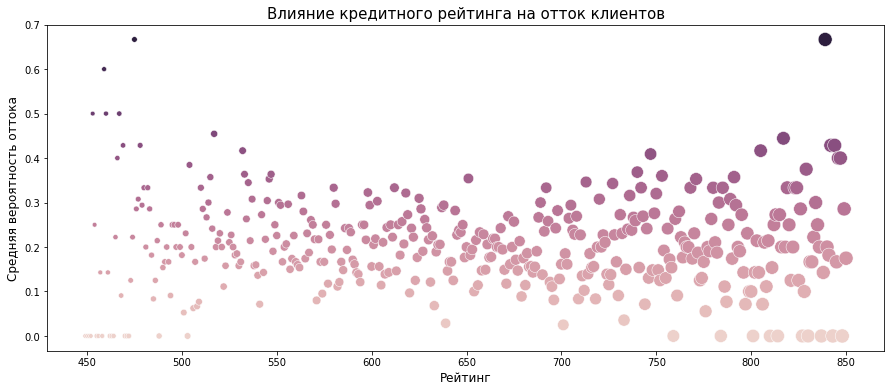

Корреляция: 0.0 


In [83]:
amazing_scatter(score_churn, 'score', 'churn', 'Влияние кредитного рейтинга на отток клиентов',\
               'Рейтинг', 'Средняя вероятность оттока')

Есть некоторые выбивающиеся значения как в сторону оттока, так и наоборот, но в целом каких-то заметных тенденций нет. Коэффициент корреляции Пирсона практически нулевой, что ожидаемо при взгляде на график. Вряд ли конкретные оценки реально влияют на отток, но на всякий случай ознакомимся с ними:

In [84]:
score_churn.sort_values(by='churn', ascending=False).head().style.hide_index()

score,churn
475,0.67
839,0.67
459,0.60
453,0.50
467,0.50


Посмотрим количество:

In [85]:
top_score_churns = [839, 475, 459]
for i in top_score_churns:
    print(len(df[df.score == i]))

3
6
5


По таким количествам теорию не построить.

---
#### Столбец rating

Вновь сгруппируем данные, и изучим график, на этот раз гистограмму, а не scatter:

In [86]:
rating_churn = df.groupby('rating')['churn'].mean().reset_index()

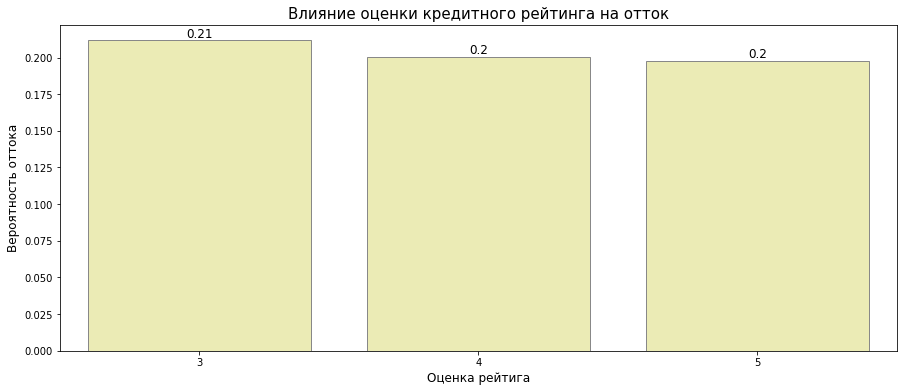

Корреляция: -0.01 


In [87]:
best_plot_ever(rating_churn, 'rating', 'churn', '#f4f4ac', 'Влияние оценки кредитного рейтинга на отток',\
               12, 2, 'Оценка рейтига', 'Вероятность оттока')
mister_pearson(df, 'rating', 'churn')

Разница невелика, а корреляция ничтожна. Посмотрим на данные в разбивке на ушедших клиентов и оставшихся с добавлением процентов:

In [88]:
gone_rating = gone_clients.groupby('rating')['user_id'].count().reset_index()
devoted_rating = devoted_clients.groupby('rating')['user_id'].count().reset_index()

wonder_percent(gone_rating, 'user_id', gone_clients)
wonder_percent(devoted_rating, 'user_id', devoted_clients)

twin_pics(gone_rating, devoted_rating)

,rating,user_id,percent
0,3,283,14.86%
1,4,1014,53.23%
2,5,608,31.92%
,rating,user_id,percent
0,3,1053,13.92%
1,4,4046,53.5%
2,5,2464,32.58%


Часть кода здесь мы тоже можем заколдовать в функцию:

In [89]:
def twin_table_magic(magic_data_one, magic_data_two):
    wonder_percent(magic_data_one, 'user_id', gone_clients)
    wonder_percent(magic_data_two, 'user_id', devoted_clients)
    twin_pics(magic_data_one, magic_data_two)

В целом, соотношение почти одинаковое, то же самое нам покажут и графики:

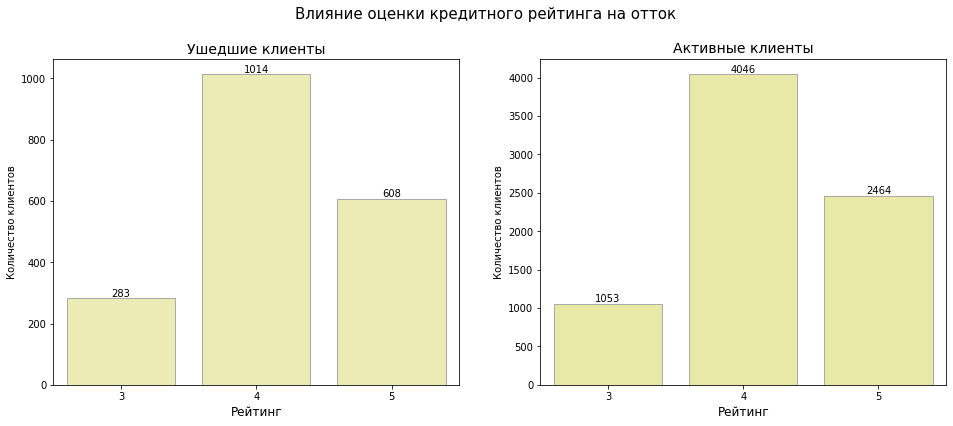

In [90]:
awesome_plot('Влияние оценки кредитного рейтинга на отток', gone_rating, 'rating', '#f4f4ac', 'Ушедшие клиенты',\
            'Рейтинг', devoted_rating, 'rating', '#f4f49c', 'Активные клиенты', 'Рейтинг')

Ни общий рейтинг, ни разделение по классам не повлияло на отток клиентов.

---
#### Столбец city

Сгруппируем данные и посмотрим на результаты:

In [91]:
city_churn = df.groupby('city')['churn'].mean().reset_index()

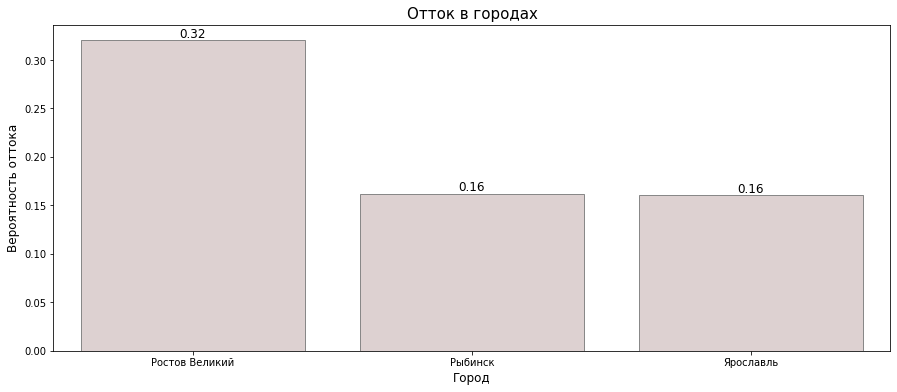

In [92]:
best_plot_ever(city_churn, 'city', 'churn', '#dfcfcf', 'Отток в городах', 12, 2, 'Город', 'Вероятность оттока')

Интересно, что в Ярославле и Рыбинске отток равный, а вот то, **в Ростове Великом отток в два раза выше** - мы уже видели на этапе изучения пропусков. Для проверки корреляции Пирсона, нам придётся заменить названия городов на цифры:

In [93]:
df_city_dummied = pd.get_dummies(df, columns=['city'])

In [94]:
cities_list_for_mr_pearson = [['Ростов Великий:', 'city_Ростов Великий'],\
                             ['Рыбинск:', 'city_Рыбинск'],\
                             ['Ярославль:', 'city_Ярославль']]
for i, x in cities_list_for_mr_pearson:
    print(i)
    mister_pearson(df_city_dummied, x, 'churn')
    print('')

Ростов Великий:
Корреляция: 0.17 

Рыбинск:
Корреляция: -0.06 

Ярославль:
Корреляция: -0.1 



Показатели незначительные, но Ростов Великий отличается ощутимо, и мы знаем, что там отток в 2 раза выше, чем в двух других городах. Посмотрим на распределение ушедших и активных клиентов на двух таблицах рядом:

In [95]:
gone_city = gone_clients.groupby('city')['user_id'].count().reset_index()
devoted_city = devoted_clients.groupby('city')['user_id'].count().reset_index()
twin_table_magic(gone_city, devoted_city)

,city,user_id,percent
0,Ростов Великий,763,40.05%
1,Рыбинск,381,20.0%
2,Ярославль,761,39.95%
,city,user_id,percent
0,Ростов Великий,1618,21.39%
1,Рыбинск,1967,26.01%
2,Ярославль,3978,52.6%


Может показаться сюрпризом - примерно по 40% от общего числа ушедших клиентов - это жители Ростова и Ярославля. На самом деле виной тому размер клиентской базы - в Ярославле она в два раза больше, чем в других городах. Посмотрим графики:

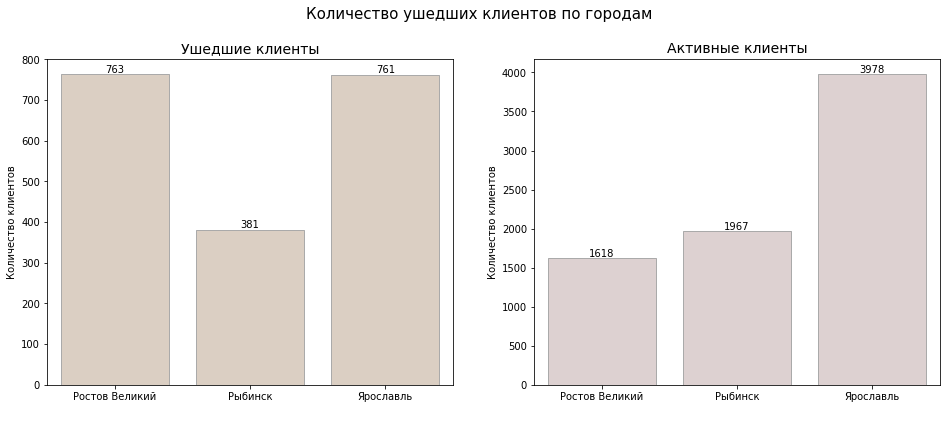

In [96]:
awesome_plot('Количество ушедших клиентов по городам', gone_city, 'city', '#dfcfbf',\
             'Ушедшие клиенты', ' ', devoted_city, 'city', '#dfcfcf', 'Активные клиенты', ' ')

Опять же, нас не должно сбивать с толку количество ушедших в Ярославле клиентов - общая доля оттока там как в Рыбинске. Дополнительно посмотрим какие доли клиентов ушли из каждого города:

In [97]:
city_churn_percents = devoted_city.merge(gone_city, on='city').drop(['percent_x', 'percent_y'], axis=1)
city_churn_percents.set_axis(['city', 'active_users','gone_users'],axis = 'columns', inplace = True)
city_churn_percents['percent_of_gone'] = city_churn_percents['gone_users'] / (city_churn_percents['active_users'] +\
                                                                              city_churn_percents['gone_users']) * 100

slice_ = idx[[0], ['percent_of_gone']]
city_churn_percents.style.set_properties(**{'background-color': '#ffbbbb'}, subset=slice_)

,city,active_users,gone_users,percent_of_gone
0,Ростов Великий,1618,763,32.05
1,Рыбинск,1967,381,16.23
2,Ярославль,3978,761,16.06


Скандал! В Ростове Великом ушла треть клиентов, но те же цифры мы видели на первом графике на этом шаге, взглянем ещё раз:

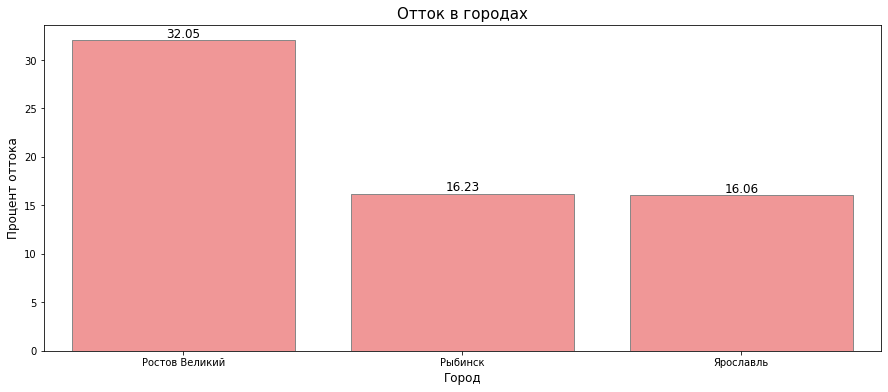

In [98]:
best_plot_ever(city_churn_percents, 'city', 'percent_of_gone', '#ff8888', 'Отток в городах', 12, 2, 'Город', 'Процент оттока')

---
#####  Ростов Великий

Сгруппируем данные и посмотрим, какие показатели выделяются, чтобы найти возможные инсайты:

In [99]:
ros = df[df['city'] == 'Ростов Великий'].reset_index(drop=True)
ros = ros.replace({'gender': {'М': 1, 'Ж': 2}})
slice_ = idx[[1], ['age', 'loyalty']]
ros.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15734608.53,656.45,4.19,1.44,36.16,5.01,119537.56,1.55,0.71,0.55,102589.79
1,1,15731196.49,653.98,4.19,1.55,44.07,5.05,120215.25,1.42,0.71,0.37,98678.05


Первые заметные показатели - возраст и активность. Посмотрим на количественное распределение и вероятность оттока:

In [100]:
ros_churned = ros.query('churn == 1').reset_index(drop=True)
ros_churned.describe()

,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
count,7.63e+02,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.00,763.0
mean,1.57e+07,653.98,4.19,1.55,44.07,5.05,120215.25,1.42,0.71,0.37,98678.05,1.0
std,7.42e+04,94.18,0.67,0.50,8.70,3.00,19503.26,0.72,0.46,0.48,59112.70,0.0
min,1.56e+07,453.00,3.00,1.00,19.00,0.00,62389.03,1.00,0.00,0.00,11.58,1.0
25%,1.57e+07,582.50,4.00,1.00,38.00,2.00,107211.14,1.00,0.00,0.00,47008.90,1.0
50%,1.57e+07,649.00,4.00,2.00,45.00,5.00,118715.86,1.00,1.00,0.00,97677.52,1.0
75%,1.58e+07,727.00,5.00,2.00,50.00,8.00,132865.47,2.00,1.00,1.00,149343.98,1.0
max,1.59e+07,850.00,5.00,2.00,62.00,10.00,181461.48,3.00,1.00,1.00,199808.10,1.0


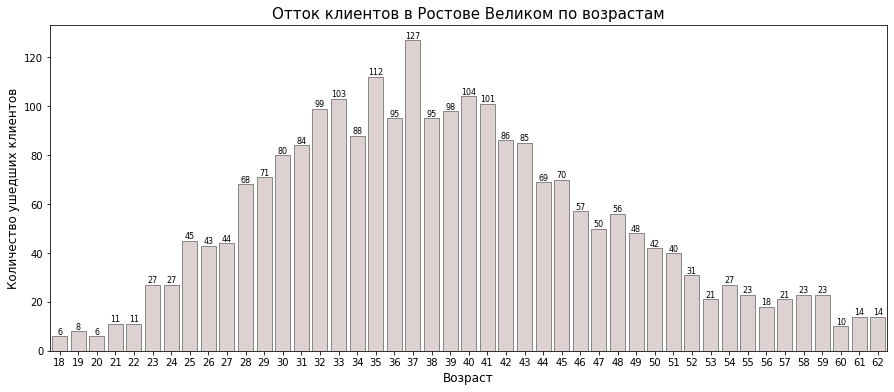

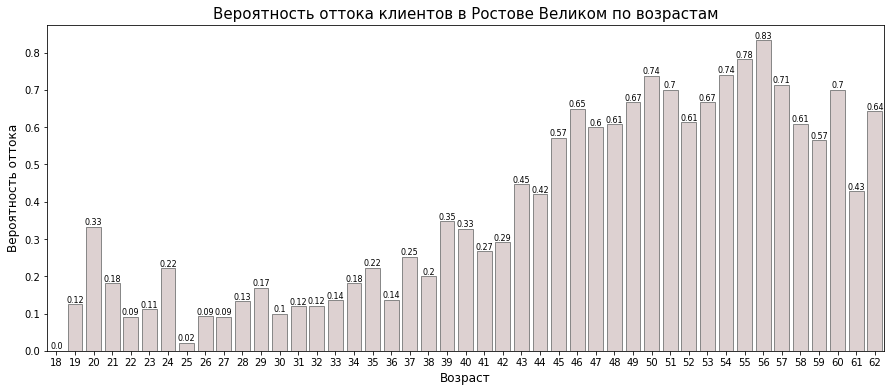

In [101]:
ros_age_count = ros.groupby('age')['churn'].count().reset_index()
best_plot_ever(ros_age_count, 'age', 'churn', '#dfcfcf', 'Отток клиентов в Ростове Великом по возрастам',\
               8, 2, 'Возраст', 'Количество ушедших клиентов')

ros_age = ros.groupby('age')['churn'].mean().reset_index()
best_plot_ever(ros_age, 'age', 'churn', '#dfcfcf', 'Вероятность оттока клиентов в Ростове Великом по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

Количественное распределение нормальное, причём, большинство уходящих - клиенты от 28 до 48 лет. У вероятности оттока несколько нестабильная картина - высокая вероятность есть у отдельных возрастов, например 20, 24, 39. Но заметный отток начинается с возраста 43 года - выделим эту часть и продолжим работу с ней:

In [102]:
ros_age = ros.query('age >= 43').reset_index(drop=True)
slice_ = idx[[1], ['loyalty']]
ros_age.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15735840.20,651.80,4.14,1.47,48.60,5.05,121648.75,1.57,0.69,0.63,102910.46
1,1,15729650.48,653.43,4.19,1.55,49.93,5.04,120093.39,1.40,0.67,0.36,99466.58


Здесь мы видим, что ушедшие клиенты показывают гораздо более низкую активность. Если таких клиентов много, то мы можем определить первый сегмент:

In [103]:
ros_age_loyalty = ros_age.query('loyalty == 0').reset_index(drop=True)
slice_ = idx[[1], ['churn']]
ros_age_loyalty.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00,395.00
1,mean,15730523.21,652.36,4.16,1.54,49.09,5.13,120040.77,1.43,0.69,0.00,101698.77,0.73
2,std,73563.44,98.13,0.69,0.50,5.02,2.98,22517.93,0.65,0.46,0.00,59327.04,0.44
3,min,15608532.00,452.00,3.00,1.00,43.00,0.00,49157.09,1.00,0.00,0.00,91.75,0.00
4,25%,15667541.50,581.00,4.00,1.00,45.00,2.50,104785.13,1.00,0.00,0.00,50861.88,0.00
5,50%,15723442.00,650.00,4.00,2.00,48.00,5.00,118356.89,1.00,1.00,0.00,102428.51,1.00
6,75%,15794687.50,726.50,5.00,2.00,52.00,8.00,134564.15,2.00,1.00,0.00,153120.24,1.00
7,max,15858007.00,850.00,5.00,2.00,62.00,10.00,212696.32,3.00,1.00,0.00,198715.27,1.00


386 клиентов - это почти половина оттока, правда следует заметить, что не все эти клиенты - ушедшие. Мы могли бы выделить их в отдельный сегмент - "пользователи из Ростова Великого старше 43 лет с низкой активностью". Но сначала проверим, можем ли мы распространить этот сегмент на два других города:

---
#####  Рыбинск

Взглягем, какие показатели выделяются здесь:

In [104]:
ryb = df[df['city'] == 'Рыбинск'].reset_index(drop=True)
ryb = ryb.replace({'gender': {'М': 1, 'Ж': 2}})
slice_ = idx[[1], ['age', 'loyalty']]
ryb.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15735108.80,654.27,4.19,1.42,36.62,5.11,119577.66,1.55,0.70,0.55,98730.22
1,1,15728398.00,657.35,4.21,1.57,43.10,4.64,120057.78,1.50,0.66,0.33,102055.18


Картина схожа с Ростовом Великим, но также у клиентов с оттоком меньше объектов - их мы проверим позже, а пока повторим шаги по сегментации:

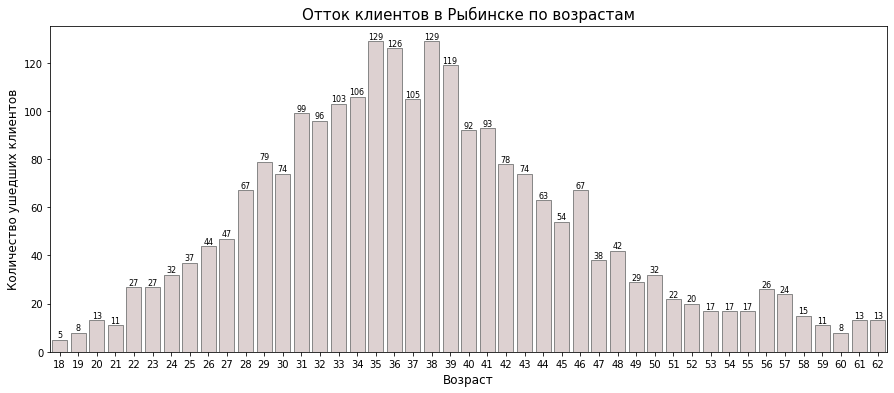

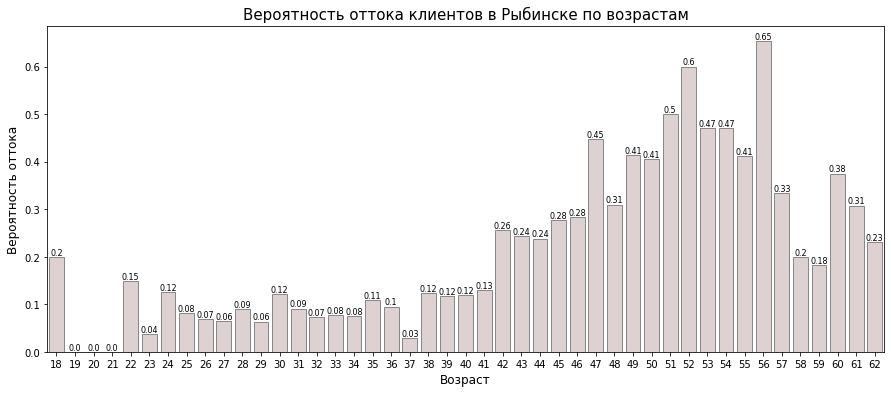

In [105]:
ryb_age_count = ryb.groupby('age')['churn'].count().reset_index()
best_plot_ever(ryb_age_count, 'age', 'churn', '#dfcfcf', 'Отток клиентов в Рыбинске по возрастам',\
               8, 2, 'Возраст', 'Количество ушедших клиентов')

ryb_age = ryb.groupby('age')['churn'].mean().reset_index()
best_plot_ever(ryb_age, 'age', 'churn', '#dfcfcf', 'Вероятность оттока клиентов в Рыбинске по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

Количественное распределение схоже с Ростовом Великим - клиенты от 28 до 48 лет уходят чаще других в количестве, но это наталктвает на мысль, что таких клиентов в целом в банке большинство. Интересно, что клиенты 19-21 года вообще не уходят. Заметный отток начинается с возраста 42 года - но эти цифры значительно ниже Ростова Великого, поэтому мы выделим клиентов от 47 лет:

In [106]:
ryb_age = ryb.query('age >= 47').reset_index(drop=True)
slice_ = idx['loyalty']
ryb_age.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15738820.41,650.20,4.17,1.43,53.02,4.81,118717.55,1.48,0.69,0.79,94249.93
1,1,15731038.08,671.87,4.28,1.55,52.46,4.52,123350.17,1.48,0.60,0.33,107913.55


Низкая активность клиентов старше 47 лет может быть коварной, так как схожая низкая активность у всех ушелших клиентов в этом городе:

In [107]:
slice_ = idx[[1], ['loyalty']]
ryb.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15735108.80,654.27,4.19,1.42,36.62,5.11,119577.66,1.55,0.70,0.55,98730.22
1,1,15728398.00,657.35,4.21,1.57,43.10,4.64,120057.78,1.50,0.66,0.33,102055.18


Мы запомним этот момент (что низкая активность клиентов старше 47 лет и у всех остальных одинаковая) и проверим этот показатель позже. Сеёчас посмотрим, сколько пользователей удалось выделить:

In [108]:
ryb_age_loyalty = ryb_age.query('loyalty == 0').reset_index(drop=True)
slice_ = idx[[1], ['churn']]
ryb_age_loyalty.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,137.00,137.00,137.00,137.00,137.00,137.00,73.00,137.00,137.00,137.00,137.00,137.00
1,mean,15736147.09,665.12,4.23,1.53,51.43,4.88,123240.81,1.48,0.69,0.00,109338.54,0.69
2,std,67896.55,96.69,0.67,0.50,4.02,2.79,33734.12,0.64,0.46,0.00,54545.14,0.46
3,min,15613115.00,473.00,3.00,1.00,47.00,0.00,50911.21,1.00,0.00,0.00,2019.78,0.00
4,25%,15681542.00,585.00,4.00,1.00,48.00,2.00,99685.06,1.00,0.00,0.00,66652.75,0.00
5,50%,15736426.00,663.00,4.00,2.00,50.00,5.00,120952.74,1.00,1.00,0.00,111190.53,1.00
6,75%,15788812.00,727.00,5.00,2.00,54.00,7.00,142643.54,2.00,1.00,0.00,158323.81,1.00
7,max,15857831.00,850.00,5.00,2.00,62.00,10.00,213146.20,3.00,1.00,0.00,196257.67,1.00


137 человек с высокой вероятностью оттока из 377 ушедших.

---
#####  Ярославль

Посмотрим, удастся ли найти схожие показатели здесь:

In [109]:
yar = df[df['city'] == 'Ярославль'].reset_index(drop=True)
yar = yar.replace({'gender': {'М': 1, 'Ж': 2}})
slice_ = idx[[1], ['age', 'loyalty']]
yar.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15733070.50,654.52,4.18,1.43,35.96,5.02,119661.98,1.54,0.71,0.53,99560.00
1,1,15735534.46,649.11,4.13,1.57,44.39,4.97,122119.62,1.44,0.70,0.37,102908.07


Картина схожая, посмотрим на графики:

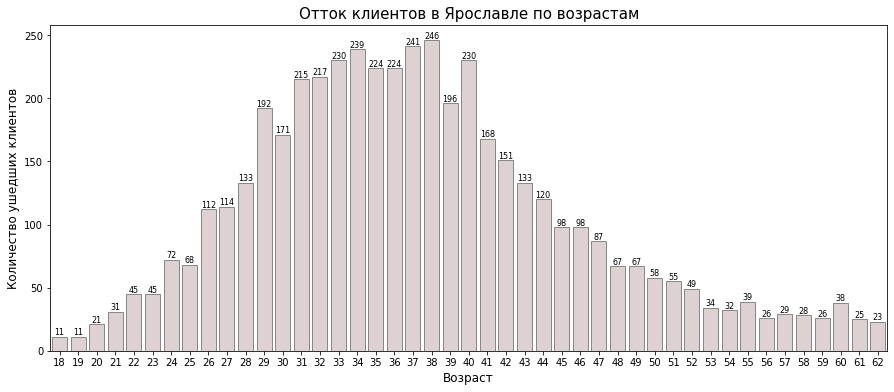

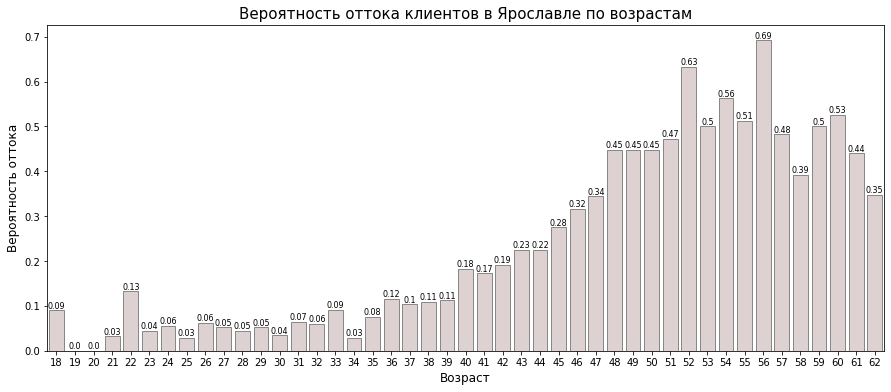

In [110]:
yar_age_count = yar.groupby('age')['churn'].count().reset_index()
best_plot_ever(yar_age_count, 'age', 'churn', '#dfcfcf', 'Отток клиентов в Ярославле по возрастам',\
               8, 2, 'Возраст', 'Количество ушедших клиентов')

yar_age = yar.groupby('age')['churn'].mean().reset_index()
best_plot_ever(yar_age, 'age', 'churn', '#dfcfcf', 'Вероятность оттока клиентов в Ярославле по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

В Ярославле отток составляет 734 человека. График подтверждает, что возрастные клиенты, от 48 лет уходят чаще:

In [111]:
yar_age = yar.query('age >= 48').reset_index(drop=True)
slice_ = idx['loyalty']
yar_age.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15733774.44,658.20,4.23,1.38,53.55,5.34,116079.95,1.54,0.70,0.78,96843.78
1,1,15734888.18,648.27,4.13,1.57,53.58,4.94,119925.41,1.41,0.70,0.39,101361.91


Здесь активность ушедших клиентов не настолько низкая, чтобы можно было однозначно выделить группу, более того, она даже немного выше, чем в среднем по Ярославлю. Но посмотрим какие цифры мы увидим если попробуем:

In [112]:
yar_age_loyalty = yar_age.query('loyalty == 0').reset_index(drop=True)
slice_ = idx[[1], ['churn']]
yar_age_loyalty.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,246.00,246.00,246.00,246.00,246.00,246.00,145.00,246.00,246.00,246.00,246.00,246.00
1,mean,15738226.37,649.41,4.14,1.51,52.84,5.08,119940.33,1.33,0.70,0.00,99638.81,0.73
2,std,73157.64,89.64,0.63,0.50,4.14,3.03,35229.08,0.60,0.46,0.00,59027.94,0.45
3,min,15612331.00,461.00,3.00,1.00,48.00,0.00,29602.08,1.00,0.00,0.00,123.07,0.00
4,25%,15676519.50,584.50,4.00,1.00,49.00,2.00,98488.08,1.00,0.00,0.00,48658.79,0.00
5,50%,15737204.50,647.00,4.00,2.00,52.00,5.00,120320.54,1.00,1.00,0.00,99991.32,1.00
6,75%,15801978.50,705.00,5.00,2.00,56.00,8.00,144976.50,2.00,1.00,0.00,152654.72,1.00
7,max,15858052.00,850.00,5.00,2.00,62.00,10.00,201009.64,3.00,1.00,0.00,198810.65,1.00


246 пользователей с вероятностью оттока 0.73.

---
#####  Выделение сегмента по возрасту и активности

Начав проверку с географии, мы пришли к выводу, что в каждом из трёх городов склонны к оттоку пользователи 45+ с низкой активностью. Ранее мы обращали внимание на эту корреляцию, теперь же проверим, можем ли мы выделить один общий сегмент таких клиентов:

In [113]:
df_age_loyalty = df.replace({'gender': {'М': 1, 'Ж': 2}})
slice_ = idx[['age', 'loyalty']]
df_age_loyalty.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15733929.67,654.87,4.19,1.43,36.18,5.04,119600.46,1.55,0.71,0.54,99992.37
1,1,15732369.70,652.71,4.17,1.56,44.00,4.94,120779.89,1.45,0.70,0.36,101043.26


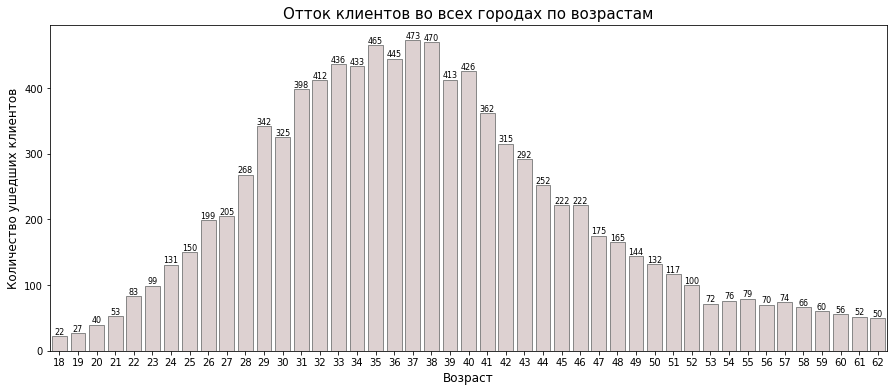

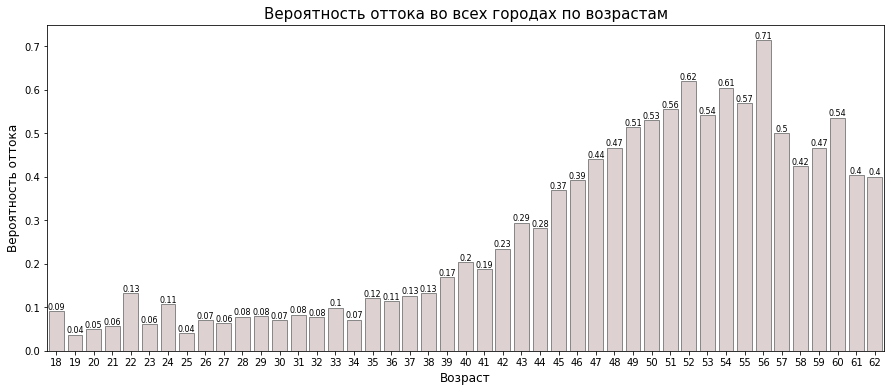

In [114]:
df_age_loyalty_count = df.groupby('age')['churn'].count().reset_index()
best_plot_ever(df_age_loyalty_count, 'age', 'churn', '#dfcfcf', 'Отток клиентов во всех городах по возрастам',\
               8, 2, 'Возраст', 'Количество ушедших клиентов')

df_age_loyalty_mean = df.groupby('age')['churn'].mean().reset_index()
best_plot_ever(df_age_loyalty_mean, 'age', 'churn', '#dfcfcf', 'Вероятность оттока во всех городах по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

Картина уже знакомая, выделяются клиенты 45 и старше, но мы в качестве "входного билета" в наш "клуб неактивных взрослых" обозначим средний возраст трёх городов - 46:

In [115]:
df_age_loyalty = df_age_loyalty.query('age >= 46').reset_index(drop=True)
slice_ = idx['loyalty']
df_age_loyalty.groupby('churn').mean().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,churn,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary
0,0,15737375.26,652.34,4.18,1.43,51.60,5.10,119198.91,1.52,0.72,0.71,97739.95
1,1,15732520.73,651.98,4.17,1.56,52.00,4.87,119757.03,1.41,0.68,0.36,101899.22


Разница значительная - посмотрим описание:

In [116]:
df_age_loyalty = df_age_loyalty.query('loyalty == 0').reset_index(drop=True)
slice_ = idx[[1], ['churn']]
df_age_loyalty.describe().reset_index().style.set_properties(**{'background-color': '#ffffb3'}, subset=slice_)

,index,user_id,score,rating,gender,age,objects,balance,products,credit_card,loyalty,estimated_salary,churn
0,count,794.00,794.00,794.00,794.00,794.00,794.00,559.00,794.00,794.00,794.00,794.00,794.00
1,mean,15736735.15,650.71,4.15,1.53,50.96,5.07,120079.44,1.41,0.71,0.00,102637.33,0.69
2,std,70663.26,95.19,0.67,0.50,4.43,2.97,29206.92,0.63,0.45,0.00,57615.11,0.46
3,min,15608532.00,450.00,3.00,1.00,46.00,0.00,12459.19,1.00,0.00,0.00,91.75,0.00
4,25%,15680035.00,581.00,4.00,1.00,47.00,2.00,102288.58,1.00,0.00,0.00,54495.40,0.00
5,50%,15736606.50,648.00,4.00,2.00,50.00,5.00,118560.00,1.00,1.00,0.00,103793.52,1.00
6,75%,15797594.25,714.00,5.00,2.00,54.00,8.00,138223.37,2.00,1.00,0.00,154082.35,1.00
7,max,15858179.00,850.00,5.00,2.00,62.00,10.00,213146.20,3.00,1.00,0.00,198810.65,1.00


Что же, через нелёгкие пути мы нашли **крупный сегмент оттока: "Старше 46 лет, низкая активность"**. Посмотрим непосредственное количество ушедших клиентов, чтобы определить точную цифру ушедих и долю от общего количества:

In [117]:
total_churn = df['churn'].sum()
forty_six_low_loyalty = df_age_loyalty.query('churn == 1')['user_id'].count()
churn_ratio_forty_six_low_loyalty = round(forty_six_low_loyalty / (forty_six_low_loyalty + total_churn) * 100, 2)

Сохраним в отдельный датасет и посмотрим график:

In [118]:
churn_forty_six_low_loyalty = pd.DataFrame({'segment': ['Общий отток', 'Старше 46 лет, низкая активность'], \
                                            'churn': [total_churn, forty_six_low_loyalty]})

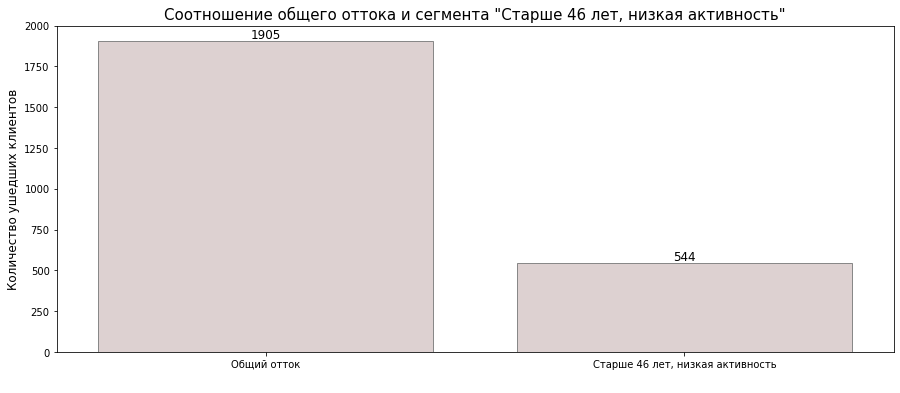

Общий отток клиентов: 1905
Отток клиентов сегмента: 544
Доля оттока сегмента: 22.21


In [119]:
best_plot_ever(churn_forty_six_low_loyalty, 'segment', 'churn', '#dfcfcf', \
               'Соотношение общего оттока и сегмента "Старше 46 лет, низкая активность"',\
               12, 2, ' ', 'Количество ушедших клиентов')
print('Общий отток клиентов:', total_churn)
print('Отток клиентов сегмента:', forty_six_low_loyalty)
print('Доля оттока сегмента:', churn_ratio_forty_six_low_loyalty)

Итак, мы смогли добраться до группы "Старше 46 лет, низкая активность". Возможно, эти данные помогут нам в дальнейшем.

---
#### Столбец gender

Посмотрим, влияет ли пол на отток:

In [120]:
gender_churn = df.groupby('gender')['churn'].mean().reset_index()

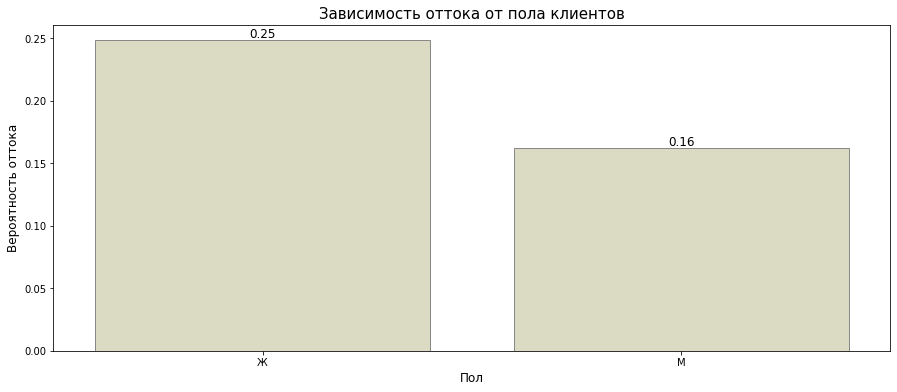

In [121]:
best_plot_ever(gender_churn, 'gender', 'churn', '#dfdfbf', 'Зависимость оттока от пола клиентов',\
               12, 2, 'Пол', 'Вероятность оттока')

**Женщины уходят значительно чаще мужчин**. Для проверки корреляции заменим значения на числа:

In [122]:
df_gender_dummied = pd.get_dummies(df, columns=['gender'])

In [123]:
gender_list_for_mr_pearson = [['Мужчины:', 'gender_М'],\
                             ['Женщины:', 'gender_Ж']]
for i, x in gender_list_for_mr_pearson:
    print(i)
    mister_pearson(df_gender_dummied, x, 'churn')
    print('')

Мужчины:
Корреляция: -0.11 

Женщины:
Корреляция: 0.11 



Показатели незначительные. Посмотрим на распределение у ушидших и оставшихся клиентов:

In [124]:
gone_gender = gone_clients.groupby('gender')['user_id'].count().reset_index()
devoted_gender = devoted_clients.groupby('gender')['user_id'].count().reset_index()
twin_table_magic(gone_gender, devoted_gender)

,gender,user_id,percent
0,Ж,1069,56.12%
1,М,836,43.88%
,gender,user_id,percent
0,Ж,3237,42.8%
1,М,4326,57.2%


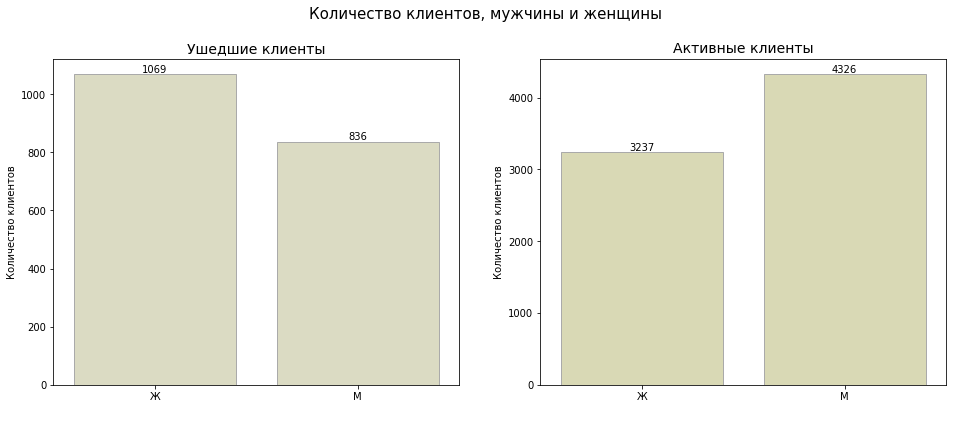

In [125]:
awesome_plot('Количество клиентов, мужчины и женщины', gone_gender, 'gender', '#dfdfbf',\
             'Ушедшие клиенты', ' ', devoted_gender, 'gender', '#dfdfaf', 'Активные клиенты', ' ')

Как и с городами, посмотрим, какой процент клиентов ушёл:

In [126]:
gender_churn_percents = devoted_gender.merge(gone_gender, on='gender').drop(['percent_x', 'percent_y'], axis=1)
gender_churn_percents.set_axis(['gender', 'active_users','gone_users'],axis = 'columns', inplace = True)
gender_churn_percents['percent_of_gone'] = gender_churn_percents['gone_users'] / (gender_churn_percents['active_users'] +\
                                                                              gender_churn_percents['gone_users']) * 100

slice_ = idx[[0], ['percent_of_gone']]
gender_churn_percents.style.set_properties(**{'background-color': '#ffbbbb'}, subset=slice_)

,gender,active_users,gone_users,percent_of_gone
0,Ж,3237,1069,24.83
1,М,4326,836,16.20


Подытожим графиком:

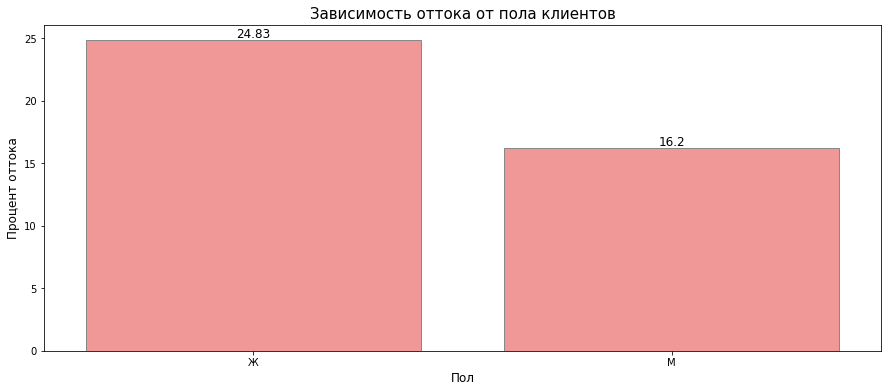

In [127]:
best_plot_ever(gender_churn_percents, 'gender', 'percent_of_gone', '#ff8888', 'Зависимость оттока от пола клиентов',\
               12, 2, 'Пол', 'Процент оттока')

В целом, похоже, **банку стоит лучше работать с женской аудиторией** - примем это во внимание на этапе сегментации.

---
#### Столбец age

Мы уже увидели, как возраст влияет на отток, взглянем ещё раз:

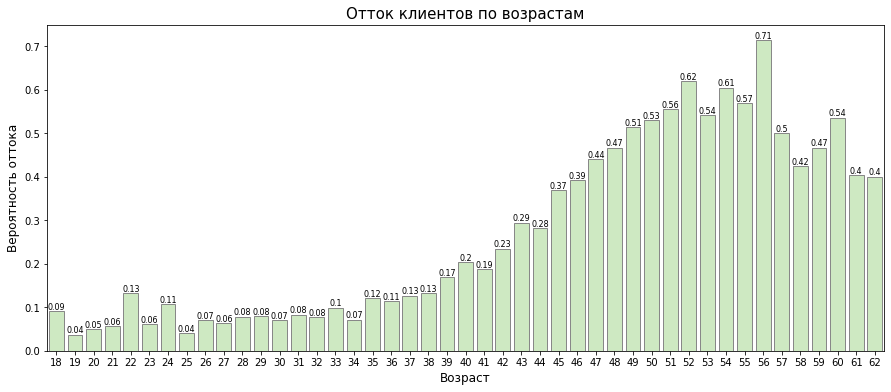

In [128]:
best_plot_ever(age_and_churn, 'age', 'churn', '#ccefbc', 'Отток клиентов по возрастам',\
               8, 2, 'Возраст', 'Вероятность оттока')

С 45 лет отток клиентов очень большой. Проверим корреляцию Пирсона:

In [129]:
mister_pearson(df, 'age', 'churn')

Корреляция: 0.36 


Показатель не очень высокий - вероятно, кроме возраста есть и другие факторы, которые нужно сложить. Очень интересно посмотреть, как различаются возраста тех, кто ушёл и тех, кто остался:

In [130]:
gone_age = gone_clients.groupby('age')['user_id'].count().reset_index()
devoted_age = devoted_clients.groupby('age')['user_id'].count().reset_index()
twin_table_magic(gone_age, devoted_age)

,age,user_id,percent
0,18,2,0.1%
1,19,1,0.05%
2,20,2,0.1%
3,21,3,0.16%
4,22,11,0.58%
5,23,6,0.31%
6,24,14,0.73%
7,25,6,0.31%
8,26,14,0.73%
9,27,13,0.68%


Скорее построим графики! Учитывая, что у нас очень много значений, два графика рядом будут не очень удобны, построим два подряд:

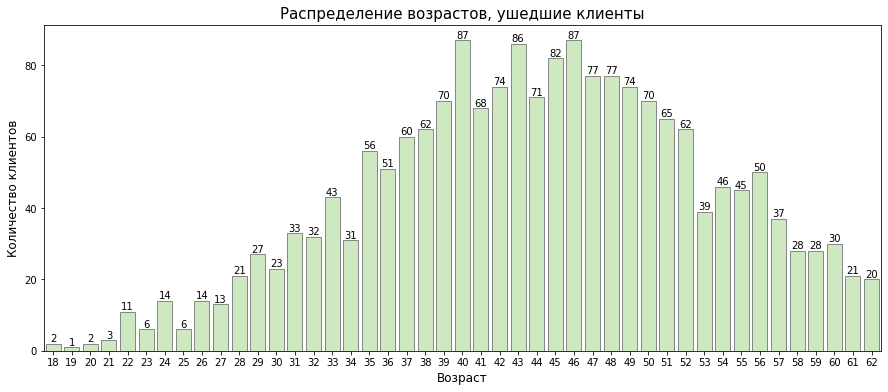

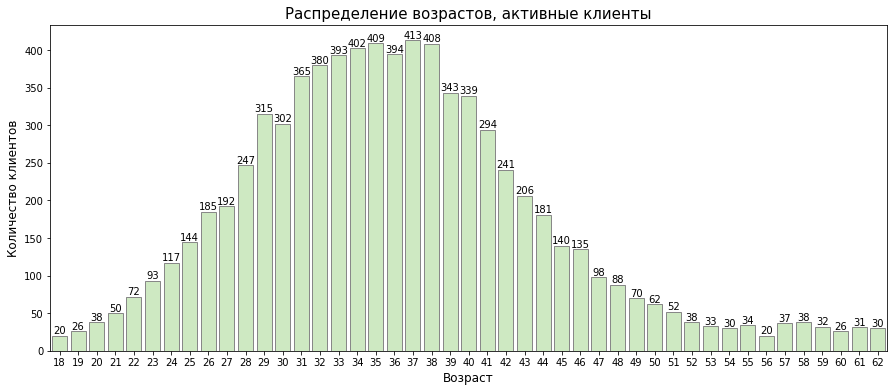

In [131]:
best_plot_ever(gone_age, 'age', 'user_id', '#ccefbc', 'Распределение возрастов, ушедшие клиенты',\
               10, 2, 'Возраст', 'Количество клиентов')
best_plot_ever(devoted_age, 'age', 'user_id', '#ccefbc', 'Распределение возрастов, активные клиенты',\
               10, 2, 'Возраст', 'Количество клиентов')

Выводы подтверждаются - **более возрастные клиенты ушли, и остались более молодые**.

---
#### Столбец objects

Оценим влияние количества объектов собственности у клиентов на отток:

In [132]:
objects_churn = df.groupby('objects')['churn'].mean().reset_index()

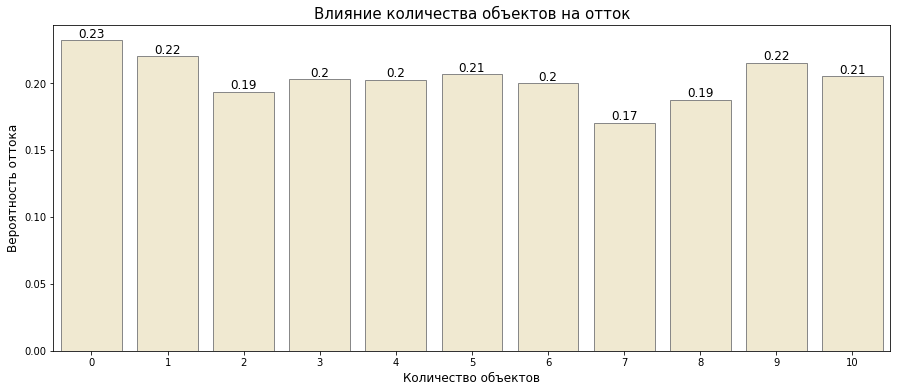

Корреляция: -0.01 


In [133]:
best_plot_ever(objects_churn, 'objects', 'churn', '#f5eccc', 'Влияние количества объектов на отток',\
               12, 2, 'Количество объектов', 'Вероятность оттока')
mister_pearson(df, 'objects', 'churn')

Мы видим минимальную отрицательную корреляцию. Проверим распределения в разбивке на ушедших и активных клиентов:

In [134]:
gone_objects = gone_clients.groupby('objects')['user_id'].count().reset_index()
devoted_objects = devoted_clients.groupby('objects')['user_id'].count().reset_index()
twin_table_magic(gone_objects, devoted_objects)

,objects,user_id,percent
0,0,90,4.72%
1,1,215,11.29%
2,2,191,10.03%
3,3,193,10.13%
4,4,191,10.03%
5,5,198,10.39%
6,6,182,9.55%
7,7,167,8.77%
8,8,184,9.66%
9,9,199,10.45%


В целом, мы уже видели схожую картину на графике на этапе работы с выбросами.

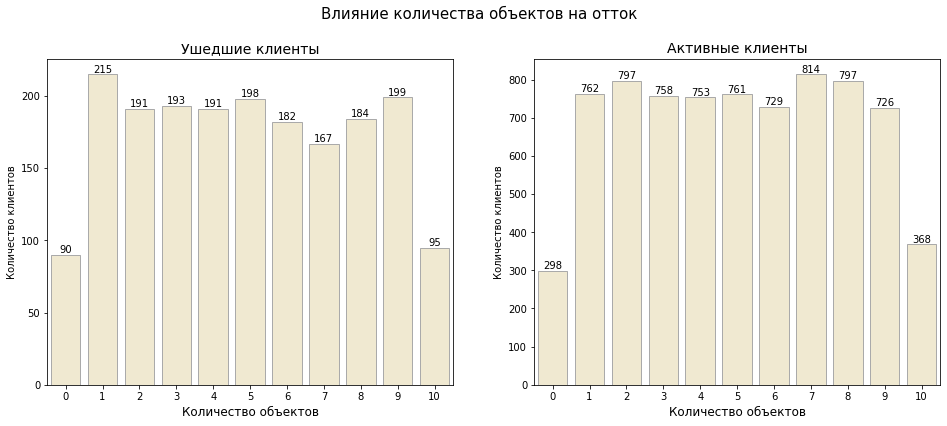

In [135]:
awesome_plot('Влияние количества объектов на отток', gone_objects, 'objects', '#f5eccc', 'Ушедшие клиенты',\
             'Количество объектов', devoted_objects, 'objects', '#f5eccc', 'Активные клиенты', 'Количество объектов')

Среди ушедших минимально выделяются клиенты с одним объектом.

---
#### Столбец balance

Учитывая огромное количество значений баланса, нам стоит посчитать коэффициент корреляции без графика, но предварительно стоит избавиться от пропусков:

In [136]:
df_no_nan = df.dropna()
balance_churn = df_no_nan.groupby('balance')['churn'].mean().reset_index()

In [137]:
mister_pearson(df, 'balance', 'churn')

Корреляция: 0.02 


Показатель почти нулевой. Продолжим работу.

---
#### Столбец products

На одном из предыдущих этапов мы нашли важный момент - отток у клиентов с 4 продутками - 100%. Клиенты с тремя продуктами тоже весьма склонны к оттоку. Эти две группы мы объединили, посмотрим графики:

In [138]:
products_churn = df.groupby('products')['churn'].mean().reset_index()

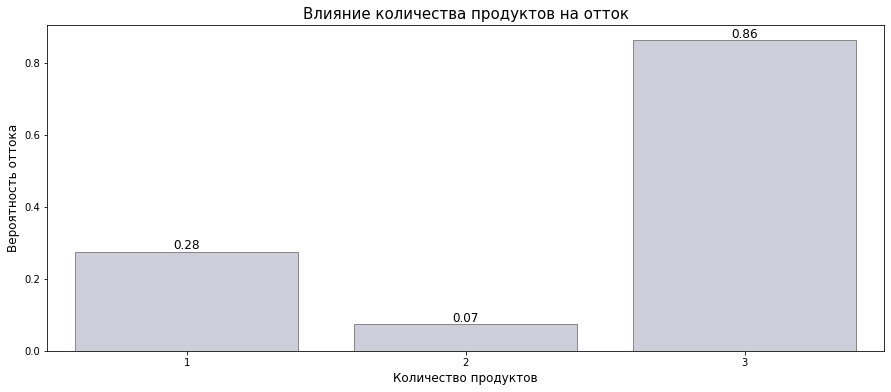

Корреляция: -0.07 


In [139]:
best_plot_ever(products_churn, 'products', 'churn', '#ccccdc', 'Влияние количества продуктов на отток',\
               12, 2, 'Количество продуктов', 'Вероятность оттока')
mister_pearson(df, 'products', 'churn')

Первоначальные выводы подтвердились - **у клиентов с 3 продуктами очень высокая вероятность оттока - 0.86**, но коэффициент корреляции Пирсона низкий, лишь -0.07. Сравним с ушедшими:

In [140]:
gone_products = gone_clients.groupby('products')['user_id'].count().reset_index()
devoted_products = devoted_clients.groupby('products')['user_id'].count().reset_index()
twin_table_magic(gone_products, devoted_products)

,products,user_id,percent
0,1,1320,69.29%
1,2,322,16.9%
2,3,263,13.81%
,products,user_id,percent
0,1,3478,45.99%
1,2,4043,53.46%
2,3,42,0.56%


Показатели очень интересные - клиентов с 3 продуктами мало в любом случае, но отток очень большой - 263 клиента ушло, и лишь 42 осталось, что теперь составляет 0.56% всей клиентской базы.

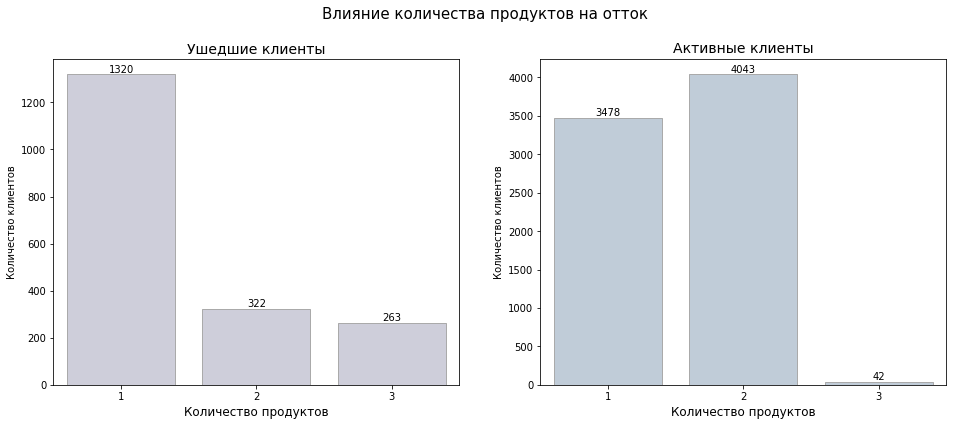

In [141]:
awesome_plot('Влияние количества продуктов на отток', gone_products, 'products', '#ccccdc', 'Ушедшие клиенты',\
             'Количество продуктов', devoted_products, 'products', '#bcccdc', 'Активные клиенты', 'Количество продуктов')

Хотя вероятность оттока у клиентов с 1 продуктом не так высока - 0.3, число ушедших составляет более 13% всех клиентов. График активных клиентов показывает более обнадёживающую статистику - **у клиентов с 2 продуктами наименьшая вероятность оттока - 0.07**, и их сейчас большинство. Проверим процент оттока:

In [142]:
products_churn_percents = devoted_products.merge(gone_products, on='products').drop(['percent_x', 'percent_y'], axis=1)
products_churn_percents.set_axis(['products', 'active_users','gone_users'], axis = 'columns', inplace = True)
products_churn_percents['percent_of_gone'] = products_churn_percents['gone_users'] / (products_churn_percents['active_users'] +\
                                                                              products_churn_percents['gone_users']) * 100
slice_ = idx[[2], ['percent_of_gone']]
products_churn_percents.style.set_properties(**{'background-color': '#ffbbbb'}, subset=slice_)

,products,active_users,gone_users,percent_of_gone
0,1,3478,1320,27.51
1,2,4043,322,7.38
2,3,42,263,86.23


Отток колоссальный, взглянем на график:

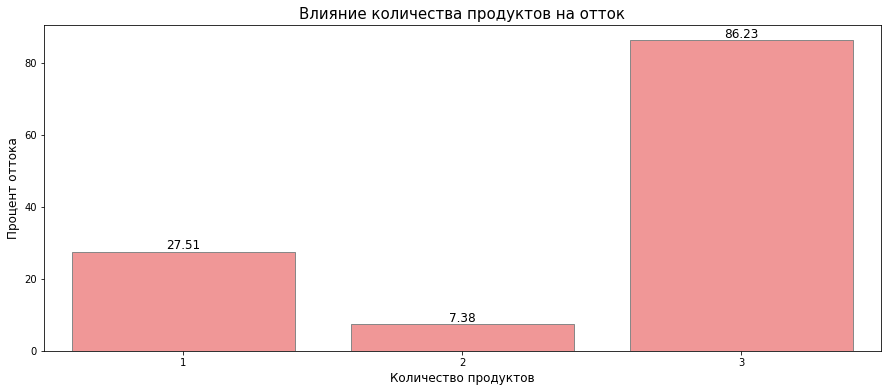

In [143]:
best_plot_ever(products_churn_percents, 'products', 'percent_of_gone', '#ff8888', 'Влияние количества продуктов на отток',\
               12, 2, 'Количество продуктов', 'Процент оттока')

Оба момента - высокий отток у клиентов с 3 и 4 продуктами, а также низкий отток у клиентов с двумя - мы учтём на сегментации.

---
#### Столбец credit_card

Проверим, как влияет наличие кредитной карты на отток. Ранее мы выяснили важный момент - кредитная карта очень популярный продукт в нашем банке, он есть у 70% клиентов.

In [144]:
cc_churn = df.groupby('credit_card')['churn'].mean().reset_index()

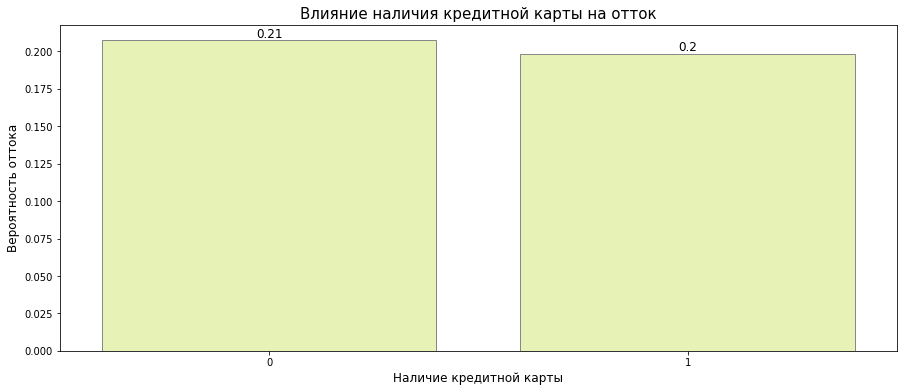

Корреляция: -0.01 


In [145]:
best_plot_ever(cc_churn, 'credit_card', 'churn', '#ecfcac', 'Влияние наличия кредитной карты на отток',\
               12, 2, 'Наличие кредитной карты', 'Вероятность оттока')
mister_pearson(df, 'credit_card', 'churn')

Кредитная карта не влияет на отток - это хорошо для отдела продаж. Сравним её наличие у ушедших и оставшихся клиентов:

In [146]:
gone_cc = gone_clients.groupby('credit_card')['user_id'].count().reset_index()
devoted_cc = devoted_clients.groupby('credit_card')['user_id'].count().reset_index()
twin_table_magic(gone_cc, devoted_cc)

,credit_card,user_id,percent
0,0,581,30.5%
1,1,1324,69.5%
,credit_card,user_id,percent
0,0,2219,29.34%
1,1,5344,70.66%


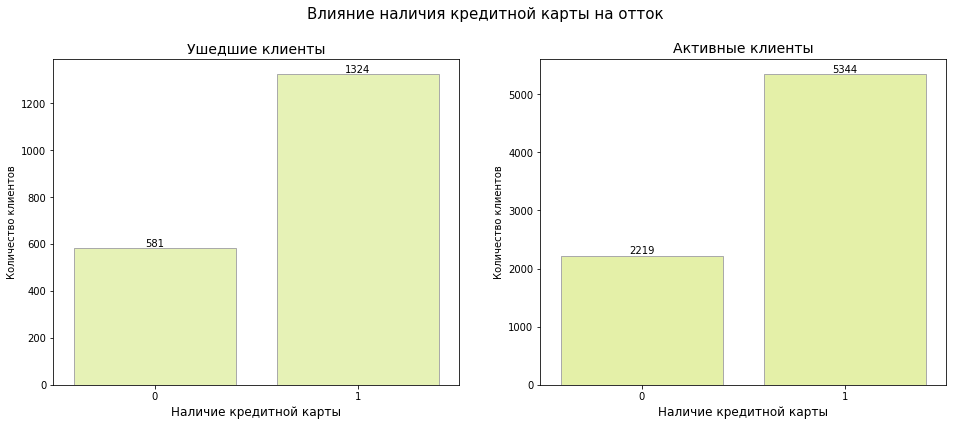

In [147]:
awesome_plot('Влияние наличия кредитной карты на отток', gone_cc, 'credit_card', '#ecfcac', 'Ушедшие клиенты',\
             'Наличие кредитной карты', devoted_cc, 'credit_card', '#ecfc9c', 'Активные клиенты', 'Наличие кредитной карты')

Распределения в целом похожи, и мы можем сделать вывод, что наличие кредитной карты не влияет на отток. А ещё, раз кредитка так популярна среди клиентов, посмотрим, какую часть от всех продуктов, имеющихся у клиентов составляет именно она:

In [148]:
df.head(2)

,user_id,score,rating,city,gender,age,age_group,objects,balance,products,credit_card,loyalty,estimated_salary,income_group,churn
0,15677338,619,4,Ярославль,Ж,42,Взрослые,2,NaN,1,1,1,101348.88,Средний,1
1,15690047,608,4,Рыбинск,Ж,41,Взрослые,1,83807.86,1,0,1,112542.58,Средний,0


In [149]:
credit_card_ratio = df[['products', 'credit_card']]
credit_card_ratio['products'] = credit_card_ratio['products'].sum()
credit_card_ratio['credit_card'] = credit_card_ratio['credit_card'].sum()
credit_card_ratio['ratio'] = credit_card_ratio['credit_card'] / credit_card_ratio['products'] * 100
credit_card_ratio = credit_card_ratio.drop_duplicates()
slice_ = idx[[0], ['ratio']]
credit_card_ratio.style.set_properties(**{'background-color': '#ffbbbb'}, subset=slice_)

,products,credit_card,ratio
0,14443,6668,46.17


**Почти половина продуктов банка - это кредитные карты**. Это важнейшая информация, мы учтём это в сегментации.

---
#### Столбец loyalty

Теперь нам предстоит проверить, связана ли активность клиентов с оттоком:

In [150]:
loyalty_churn = df.groupby('loyalty')['churn'].mean().reset_index()

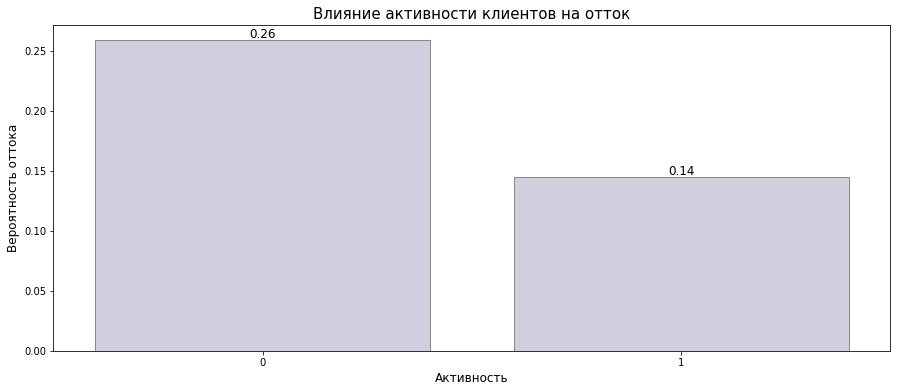

Корреляция: -0.14 


In [151]:
best_plot_ever(loyalty_churn, 'loyalty', 'churn', '#cccce0', 'Влияние активности клиентов на отток',\
               12, 2, 'Активность', 'Вероятность оттока')
mister_pearson(df, 'loyalty', 'churn')

Хотя вероятность оттока не очень высока в обоих случаях, что подтверждет низкий коэффициент корреляции, **неактивные клиенты уходят чаще**. Сравним ушедших и оставшихся клиентов:

In [152]:
gone_loyalty = gone_clients.groupby('loyalty')['user_id'].count().reset_index()
devoted_loyalty = devoted_clients.groupby('loyalty')['user_id'].count().reset_index()
twin_table_magic(gone_loyalty, devoted_loyalty)

,loyalty,user_id,percent
0,0,1215,63.78%
1,1,690,36.22%
,loyalty,user_id,percent
0,0,3480,46.01%
1,1,4083,53.99%


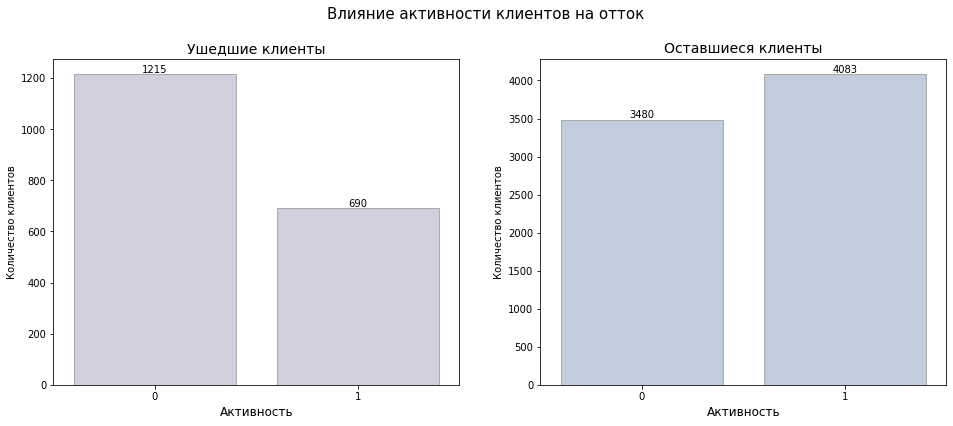

In [153]:
awesome_plot('Влияние активности клиентов на отток', gone_loyalty, 'loyalty', '#cccce0', 'Ушедшие клиенты',\
             'Активность', devoted_loyalty, 'loyalty', '#bccce0', 'Оставшиеся клиенты', 'Активность')

Очень большая часть клиентов не активны - об этом следует сообщить отделу маркетинга, возможно стоит каким-то образом взаимодействовать с неактивными клиентами, что может помочь снизить отток. Но мы подсчитаем, какая часть активных/неактивных клиентов ушла:

In [154]:
loyalty_churn_percents = devoted_loyalty.merge(gone_loyalty, on='loyalty').drop(['percent_x', 'percent_y'], axis=1)
loyalty_churn_percents.set_axis(['loyalty', 'active_users', 'gone_users'], axis = 'columns', inplace = True)
loyalty_churn_percents['percent_of_gone'] = loyalty_churn_percents['gone_users'] / (loyalty_churn_percents['active_users'] +\
                                                                              loyalty_churn_percents['gone_users']) * 100
slice_ = idx[[0], ['percent_of_gone']]
loyalty_churn_percents.style.set_properties(**{'background-color': '#ffbbbb'}, subset=slice_)

,loyalty,active_users,gone_users,percent_of_gone
0,0,3480,1215,25.88
1,1,4083,690,14.46


Запомним, что четверть неактивных клиентов уходят. Возможно это не просто неактивные клиенты, а коррелирующие с каким-либо признаком, впрочем, это мы проверим на сегментации.

---
#### Столбец estimated_salary

Так как значений здесь очень много, сразу посмотрим на корреляцию:

In [155]:
mister_pearson(df, 'estimated_salary', 'churn')

Корреляция: 0.01 


Мы уже видели, что оценка зарплат довольно странная - неудивительно, что корреляция с оттоком низкая. Сравнивать ушедших и оставшихся клиентов здесь нет смысла, так как мы уже видели отсутствие значимых различий в показателях.

---
#### Столбец income_group

Здесь возможна схожая ситуация с предыдущим параметром, тем более мы выделяли этот столбец основываясь на показаниях распределений (Низкий доход - ниже 1 квартиля, средний - между 1 и 3, высокий - выше 3). Но здесь мы можем оценить графики, предварительно выделив группы в отдельный столбец:

In [156]:
income_groups_churn = []

for dollar in df.income_group:
    if dollar == 'Ниже среднего':
        income_groups_churn.append(1)
    elif dollar == 'Средний':
        income_groups_churn.append(2)
    elif dollar == 'Выше среднего':
        income_groups_churn.append(3)

df.insert(13, 'income_group_churn', income_groups_churn, allow_duplicates = False)

In [157]:
income_group_churn = df.groupby('income_group_churn')['churn'].mean().reset_index()

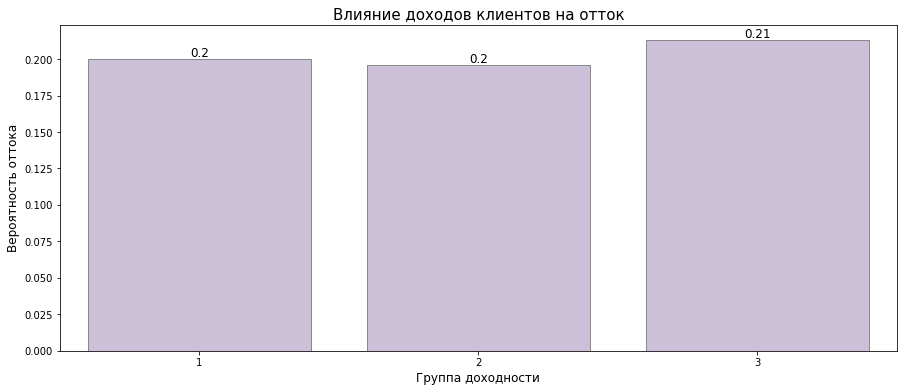

Корреляция: 0.01 


In [158]:
best_plot_ever(income_group_churn, 'income_group_churn', 'churn', '#ccbcdc', 'Влияние доходов клиентов на отток',\
               12, 2, 'Группа доходности', 'Вероятность оттока')
mister_pearson(df, 'income_group_churn', 'churn')

Отток примерно одинаковый, и в целом он соответствует среднему оттоку по всему датасету, а корреляция ожидаемо минимальная. Посмотрим, есть ли различия между ушедшими и оставшимися клиентами:

In [159]:
del df['income_group_churn']

In [160]:
gone_income_group = gone_clients.groupby('income_group')['user_id'].count().reset_index()
devoted_income_group = devoted_clients.groupby('income_group')['user_id'].count().reset_index()
twin_table_magic(gone_income_group, devoted_income_group)

,income_group,user_id,percent
0,Выше среднего,506,26.56%
1,Ниже среднего,474,24.88%
2,Средний,925,48.56%
,income_group,user_id,percent
0,Выше среднего,1870,24.73%
1,Ниже среднего,1895,25.06%
2,Средний,3798,50.22%


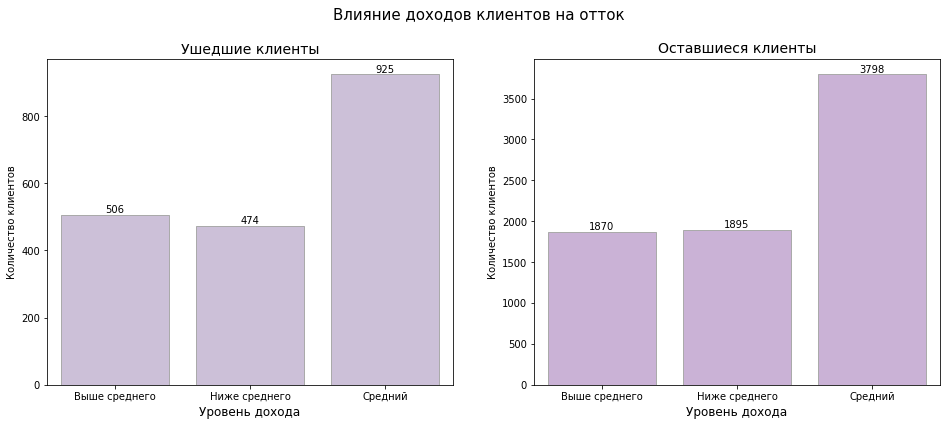

In [161]:
awesome_plot('Влияние доходов клиентов на отток', gone_income_group, 'income_group', '#ccbcdc', 'Ушедшие клиенты',\
             'Уровень дохода', devoted_income_group, 'income_group', '#ccacdc', 'Оставшиеся клиенты', 'Уровень дохода')

Вновь ничего неожиданного - клиентов со средним уровнем дохода больше остальных, которые, в свою очередь, примерно одного объёма. Время взглянуть на матрицу корреляций.

---
> ### Построение матрицы корреляций

Сперва произведём кодирование столбцов с категориальными данными с помощью get_dummies, и сохраним корреляцию в отдельную переменную:

In [162]:
df_dummies = pd.get_dummies(df, columns=['city', 'gender', 'age_group', 'income_group'])
corr_m = round(df_dummies.corr(), 2)

Взглянем непосредственно на график:

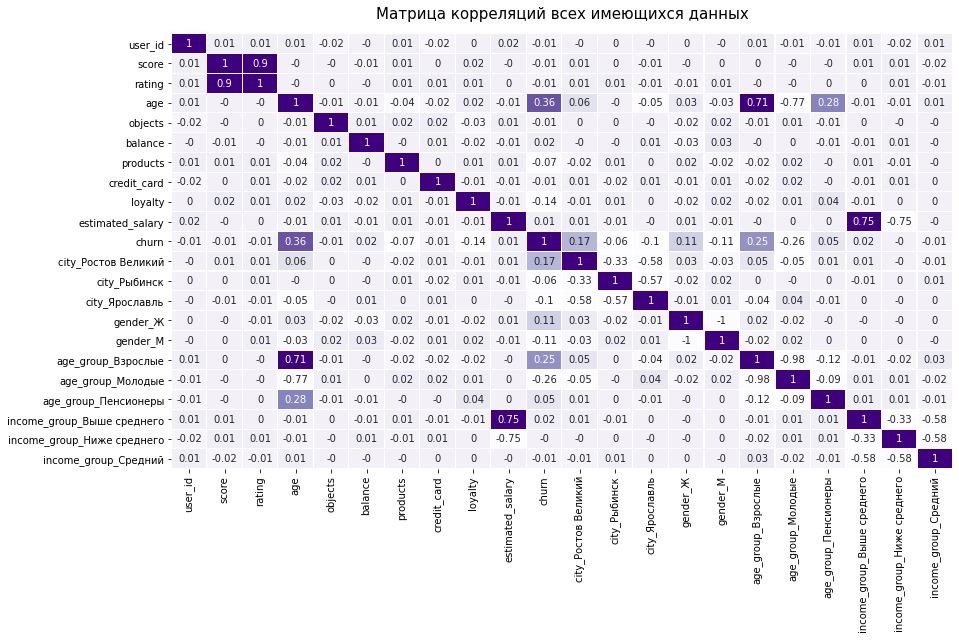

In [163]:
f, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(data=corr_m, annot=True, fmt='.2g', cmap="Purples", linewidths=.1,\
            linecolor='white', vmin=-0.05, vmax=0.5, cbar=False);
ax.set_title('Матрица корреляций всех имеющихся данных', fontsize=15, pad=15)
plt.show()

Что же, многие наши выводы подтвердились - мы видим некоторую корреляцию оттока со следующими данными: возраст, количество продуктов, активность, нахождение в Ростове Великом, пол клиентов, возрастные группы "Взрослые" и "Молодые". Для большей наглядности посмотрим корреляцию в один столбец:

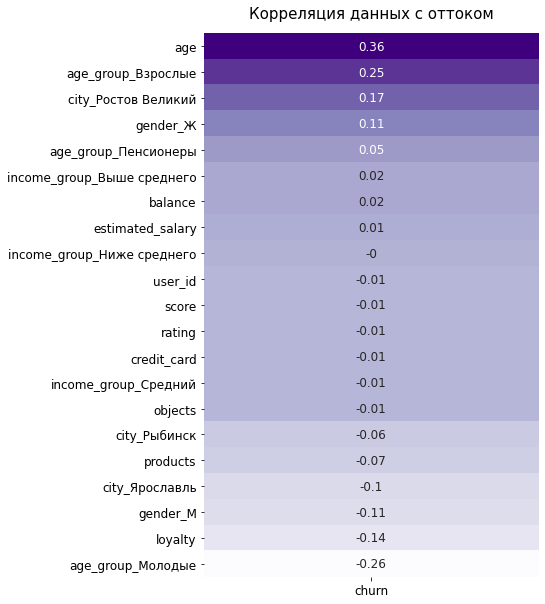

In [164]:
plt.figure(figsize=(6, 10))
sns.heatmap(round(df_dummies.corr()[['churn']].sort_values(by='churn', ascending=False).drop(['churn'], axis=0), 2),\
                      vmin=-0.25, vmax=0.35, annot=True, annot_kws={"size":12}, cmap='Purples', cbar=False)
plt.title('Корреляция данных с оттоком', fontsize=15, pad=15)
plt.tick_params(axis='both', labelsize=12)
plt.show()

---
**Выводы**

Позади большой объём работы, ключевые выводы этого этапа таковы:
- в Ярославле и Рыбинске примерно равный отток клиентов (15.58% и 16.01% соответственно), **в Ростове Великом отток в два раза выше (31.38%)**;
- **женщины уходят значительно чаще мужчин**, 24.19% против 15.87%;
- **более возрастные клиенты (40-49 лет) ушли**, и остались более молодые (31-38 лет);
- **очень высокий отток у клиентов с 3 (83.13%) и 4 (100%) продуктами**;
- **крайне низкий отток у клиентов с двумя продуктами** - 7.38%;
- почти половина продуктов банка - это **кредитные карты** - 46.45%;
- **неактивные клиенты уходят гораздо чаще**, 25.42% против 13.97%.
- построение матрицы корреляций подтвердило вышеуказанные выводы.

---

---
## <center> 3. Сегментация пользователей </center> 

На этом шаге нам предстоит разделить уходящих пользователей на сегменты. Мы будем отталкиваться от 5 основных критериев:
- география
- пол
- возраст
- количество используемых продуктов
- активность

Не будем же терять ни минуты.

---
> ### 3.1 Сегментация пользователей по географии

Для сегментации по городам оставим только ушедших клиентов и напишем самую крутую функцию, жемчужину нашего исследования:

In [165]:
df_gone = df.query('churn == 1').reset_index(drop=True)

In [166]:
def magic_city_segmentation(city, color_mf, number_mf_city_title, total_mf_city_title, color_age, age_city_title, color_prod,\
                           prod_city_title, color_loyalty, loyalty_city_title):
    city = city.replace({'gender': {1: 'Мужчины', 2: 'Женщины'}})
    city_gender_segment = city.groupby('gender')['user_id'].count().reset_index()
    
    city_total = city_gender_segment['user_id'].sum()
    wonder_percent(city_gender_segment, 'user_id', city)
    
    best_plot_ever(city_gender_segment, 'gender', 'user_id', color_mf, number_mf_city_title,\
                   8, 2, 'Пол', 'Количество клиентов')
    print('\033[1m' + total_mf_city_title, city_total, '\033[0m')
    sets_for_mf_printer = [['Доля женщин:', 0], ['Доля мужчин:', 1]]
    for i, d in sets_for_mf_printer:
        print(i, city_gender_segment['percent'][d])
    
    city_age_segment = city.groupby('age')['user_id'].count().reset_index()
    best_plot_ever(city_age_segment, 'age', 'user_id', color_age, age_city_title, 8, 2, 'Возраст', 'Количество клиентов')
    print('Медианный возраст клиента:', int(city.age.median()))
    
    city_products_segment = city.groupby('products')['user_id'].count().reset_index()
    wonder_percent(city_products_segment, 'user_id', city)
    
    best_plot_ever(city_products_segment, 'products', 'user_id', color_prod, prod_city_title,\
               8, 2, 'Количество продуктов', 'Количество клиентов')
    sets_for_products_printer = [['Доля клиентов с одним продуктом:', 0], ['Доля клиентов с двумя продуктами:', 1],\
                                 ['Доля клиентов с тремя продуктами:', 2]]
    for i, d in sets_for_products_printer:
        print(i, city_products_segment['percent'][d])
    
    city_loyalty_segment = city.groupby('loyalty')['user_id'].count().reset_index()
    wonder_percent(city_loyalty_segment, 'user_id', city)
    city_loyalty_segment = city_loyalty_segment.replace({'loyalty': {0: 'Неактивные', 1: 'Активные'}})
    
    best_plot_ever(city_loyalty_segment, 'loyalty', 'user_id', color_loyalty, loyalty_city_title,\
               8, 2, 'Активность клиентов', 'Количество клиентов')
    sets_for_mf_printer = [['Доля неактивных клиентов:', 0], ['Доля активных клиентов:', 1]]
    for i, d in sets_for_mf_printer:
        print(i, city_loyalty_segment['percent'][d])

Сохраним ушедших клиентов по городам в соответвтующих переменных:

In [167]:
yaroslavl = yar.query('churn == 1').reset_index(drop=True)
rostov_velikiy = ros.query('churn == 1').reset_index(drop=True)
rybinsk = ryb.query('churn == 1').reset_index(drop=True)

Начнём с портрета клиента из самого крупного города, Ярославля.

---
#### Ярославль

Скорее ознакомимся с детальной информацией:

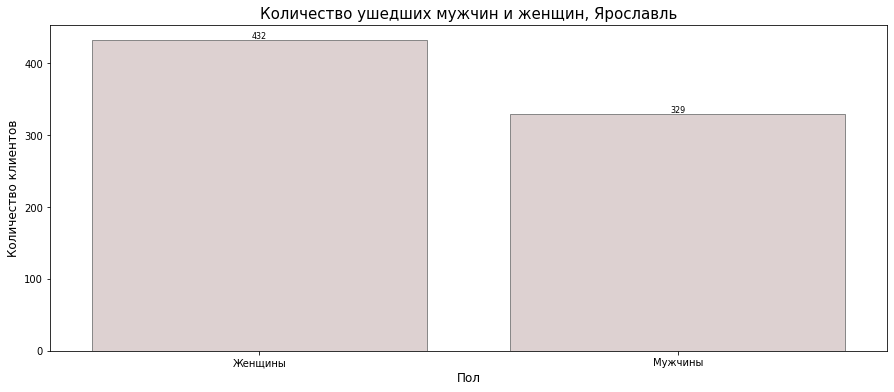

Всего ушедших клиентов в Ярославле: 761 
Доля женщин: 56.77%
Доля мужчин: 43.23%


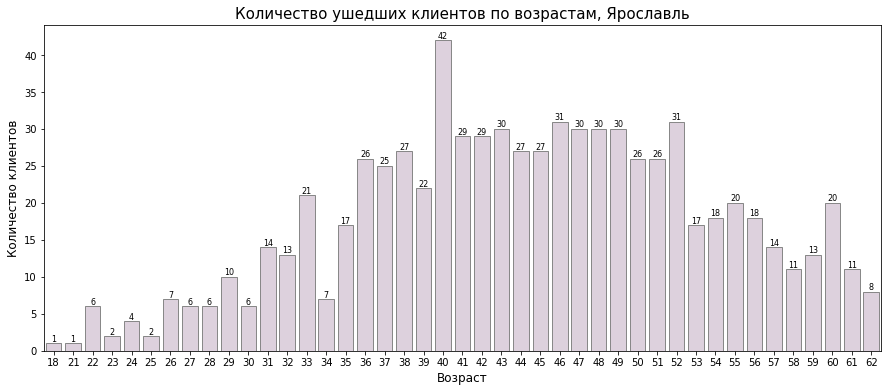

Медианный возраст клиента: 45


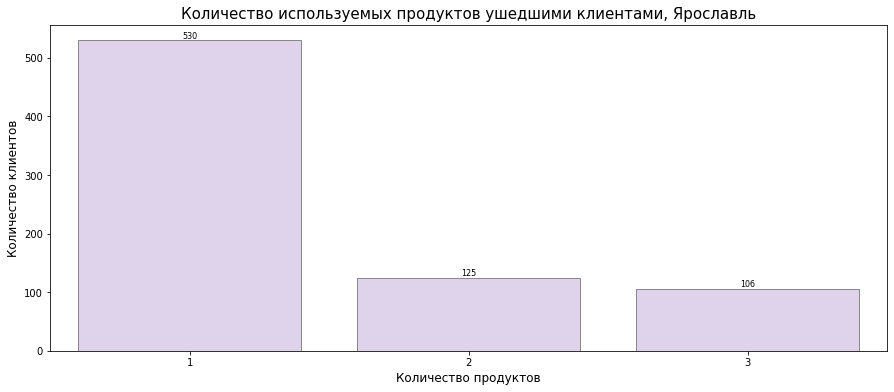

Доля клиентов с одним продуктом: 69.65%
Доля клиентов с двумя продуктами: 16.43%
Доля клиентов с тремя продуктами: 13.93%


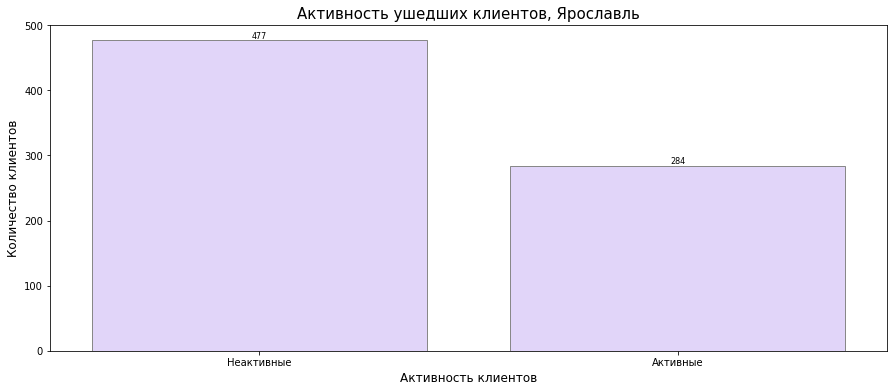

Доля неактивных клиентов: 62.68%
Доля активных клиентов: 37.32%


In [168]:
magic_city_segmentation(yaroslavl, '#dfcfcf', 'Количество ушедших мужчин и женщин, Ярославль',\
                        'Всего ушедших клиентов в Ярославле:', '#dfcfdf',\
                        'Количество ушедших клиентов по возрастам, Ярославль', '#dfcfef', \
                        'Количество используемых продуктов ушедшими клиентами, Ярославль', '#dfcfff', \
                        'Активность ушедших клиентов, Ярославль')

---
**Портрет ушедшего пользователя Ярославля**

Мы получили такой портрет: это женщина 36-52 лет, с 1 продуктом и низкой активностью использования продуктов банка.

---

---
#### Ростов Великий

Ознакомимся с показателями:

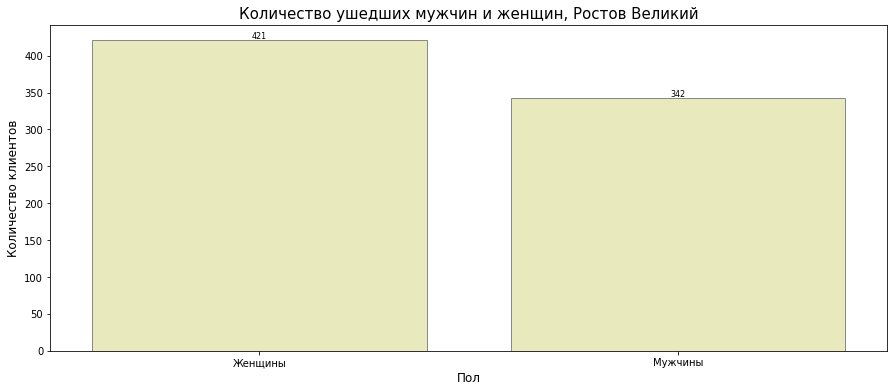

Всего ушедших клиентов в Ростове Великом: 763 
Доля женщин: 55.18%
Доля мужчин: 44.82%


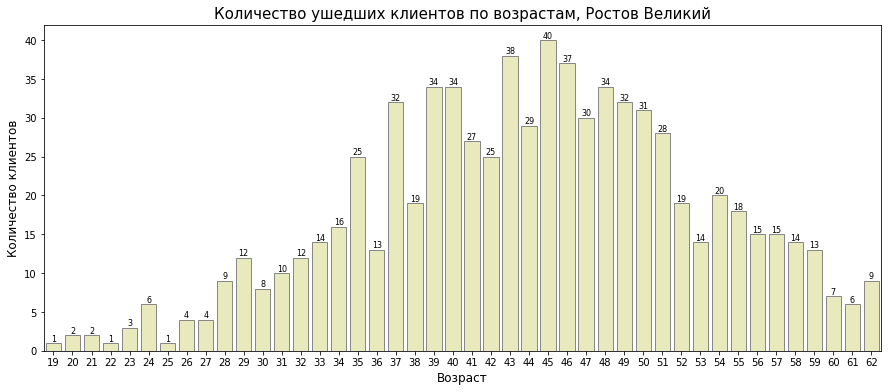

Медианный возраст клиента: 45


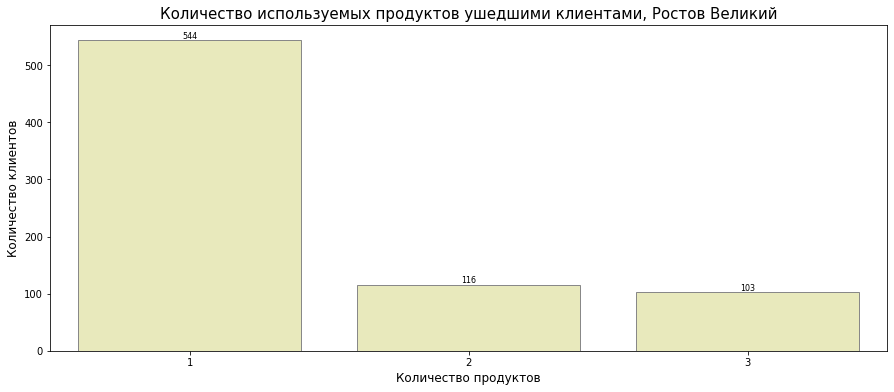

Доля клиентов с одним продуктом: 71.3%
Доля клиентов с двумя продуктами: 15.2%
Доля клиентов с тремя продуктами: 13.5%


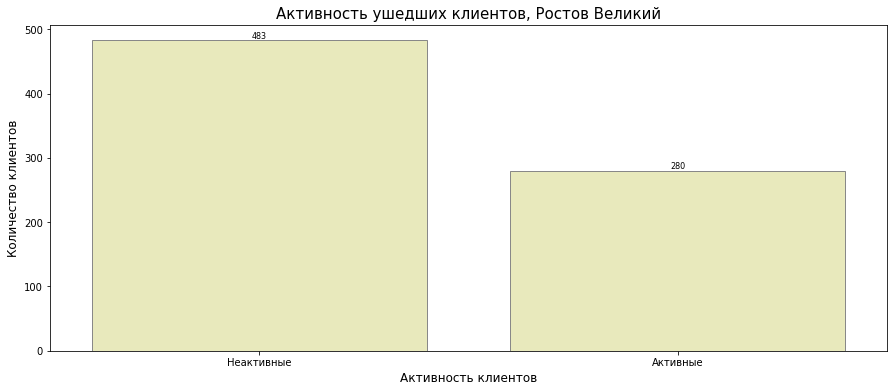

Доля неактивных клиентов: 63.3%
Доля активных клиентов: 36.7%


In [169]:
magic_city_segmentation(rostov_velikiy, '#eff0b5', 'Количество ушедших мужчин и женщин, Ростов Великий',\
                        'Всего ушедших клиентов в Ростове Великом:', '#eff0b5',\
                        'Количество ушедших клиентов по возрастам, Ростов Великий',\
                        '#eff0b5', 'Количество используемых продуктов ушедшими клиентами, Ростов Великий', '#eff0b5',\
                        'Активность ушедших клиентов, Ростов Великий')

---
**Портрет ушедшего пользователя Ростова Великого**

Уходящий ростовский пользователь - это женщина 37-51 года с 1 продуктом, которым она используется редко.

---

---
#### Рыбинск

Построим портрет рыбчанина:

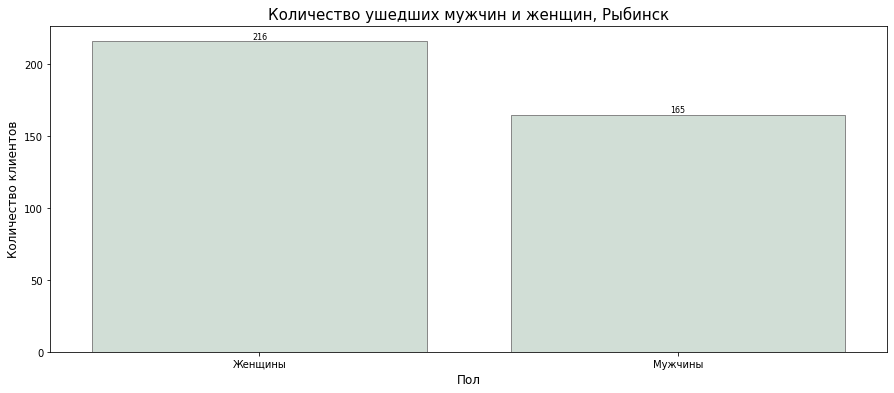

Всего ушедших клиентов в Рыбинске: 381 
Доля женщин: 56.69%
Доля мужчин: 43.31%


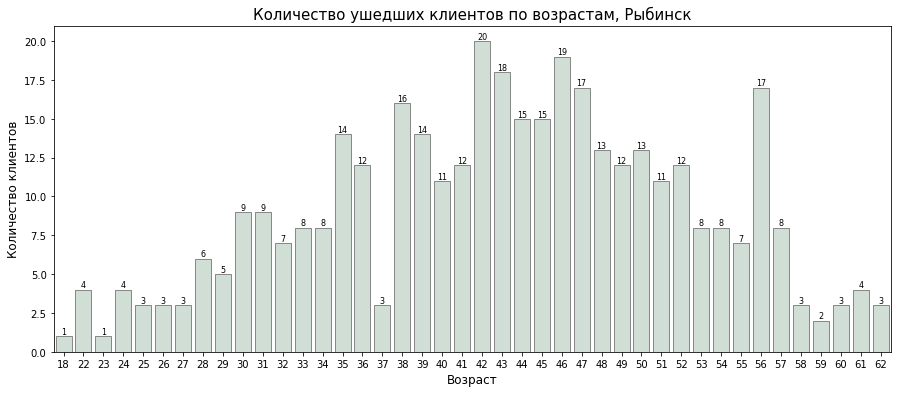

Медианный возраст клиента: 43


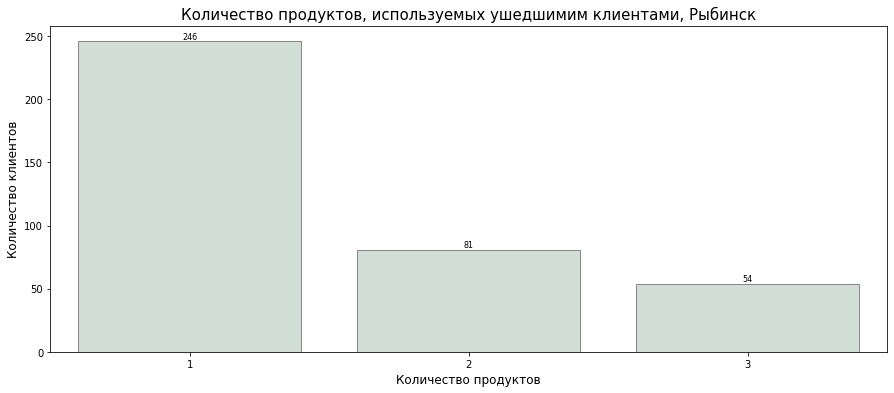

Доля клиентов с одним продуктом: 64.57%
Доля клиентов с двумя продуктами: 21.26%
Доля клиентов с тремя продуктами: 14.17%


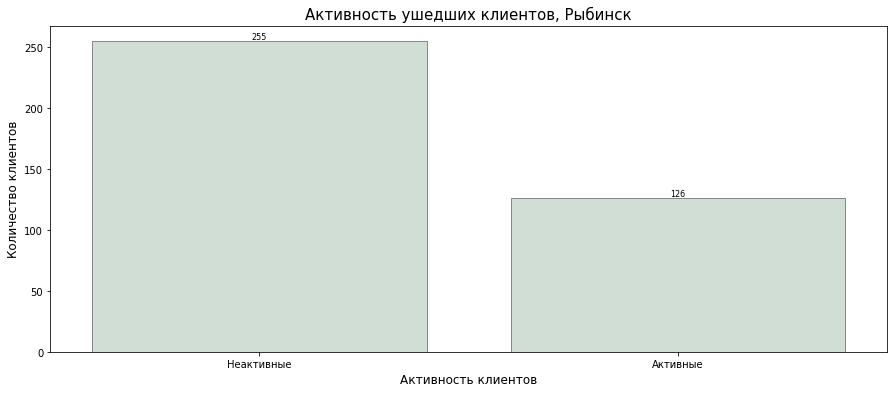

Доля неактивных клиентов: 66.93%
Доля активных клиентов: 33.07%


In [170]:
magic_city_segmentation(rybinsk, '#cfe0d5', 'Количество ушедших мужчин и женщин, Рыбинск',\
                        'Всего ушедших клиентов в Рыбинске:', '#cfe0d5',\
                        'Количество ушедших клиентов по возрастам, Рыбинск', '#cfe0d5', \
                        'Количество продуктов, используемых ушедшимим клиентами, Рыбинск', '#cfe0d5',\
                        'Активность ушедших клиентов, Рыбинск')

---
**Портрет пользователя Рыбинска**

Женщина 35-56 лет, с 1 продуктом, пользуется им редко.

---

---
#### Сравнение портретов

**Портрет ушедшего пользователя Ярославля**

Мы получили такой портрет: это женщина 36-52 лет, с 1 продуктом и низкой активностью использования продуктов банка.

**Портрет ушедшего пользователя Ростова Великого**

Уходящий ростовский пользователь - это женщина 37-51 года с 1 продуктом, которым она используется редко.

**Портрет пользователя Рыбинска**

Женщина 35-56 лет, с 1 продуктом, пользуется им редко.

---

**Вывод**

Мы видим крайне схожий портрет ушедшего пользователя. Посмотрим, что покажут другие сегментации.

---
> ### 3.2 Сегментация пользователей по полу

Здесь пойдём другим путём. Мы рассмотрим сегментацию клиентов обоих полов одновременно. Это подразумевает совершенно иную концепцию, и мы начнём с создания функции для подсчёта процентов, и сохранения в отдельный столбец именно в формате float, так как этот показатель будет ключевым при построении графиков:

In [171]:
def nowonder_percent(data_cent, column_cent, count_data):
    percentage = []
    for percenter in data_cent[column_cent]:
        percentage.append(round((percenter / len(count_data)) * 100, 2)) 
    data_cent['percent'] = percentage

Также для удобства чтения легенды заменим значения "М" и "Ж" в датасете и цифры на категориальные в loyalty:

In [172]:
df_undummies = df_gone.replace({'gender': {'М': 'Мужчины', 'Ж': 'Женщины'}})
df_undummies = df_undummies.replace({'loyalty': {0: 'Неактивные', 1: 'Активные'}})

Соберём функцию для вывода парного барплота:

In [173]:
def pairbar(maze_column, maze_core, maze_palette, query_a, query_b, query_c, pair_title, pair_x, pair_y):
    plt.figure(figsize=(15, 6))
    sns.barplot(data=maze_encoder(maze_column, maze_core, query_a, query_b, query_c),\
                x=maze_column, y='percent', hue=maze_core, linewidth=1, edgecolor='#999999', palette=maze_palette)
    plt.title(pair_title, fontsize=15)
    plt.xlabel(pair_x, fontsize=12)
    plt.ylabel(pair_y, fontsize=12)
    plt.tick_params(axis='both', labelsize=12)
    plt.show()

    display(maze_encoder(maze_column, maze_core, query_a, query_b, query_c).style.hide_index())

Теперь упакуем функцию для создания датасетов подходящего формата и приправим специями в виде try / except, потому что мы не всегда будем передавать достаточное количество аргументов: 

In [174]:
def maze_encoder(maze_column, maze_core, query_a, query_b, query_c):
    m_w_data = df_undummies.groupby([maze_column, maze_core])['user_id'].count().reset_index()

    a_sum = df_undummies.query(query_a)
    m_w_a = m_w_data.query(query_a)
    nowonder_percent(m_w_a, 'user_id', a_sum)

    b_sum = df_undummies.query(query_b)
    m_w_b = m_w_data.query(query_b)
    nowonder_percent(m_w_b, 'user_id', b_sum)

    try:
        c_sum = df_undummies.query(query_c)
        m_w_c = m_w_data.query(query_c)
        nowonder_percent(m_w_c, 'user_id', c_sum)
    
    except:
        m_w_data = m_w_a.append([m_w_b])
    
    try:
        m_w_data = m_w_a.append([m_w_b, m_w_c])
    
    except:
        return m_w_data
    
    return m_w_data

---
#### Города

Сравним соотношение полов клиентов в городах:

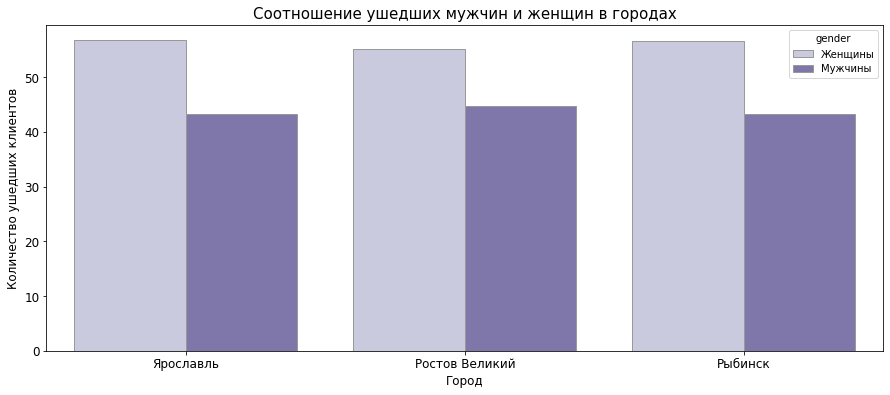

city,gender,user_id,percent
Ярославль,Женщины,432,56.77
Ярославль,Мужчины,329,43.23
Ростов Великий,Женщины,421,55.18
Ростов Великий,Мужчины,342,44.82
Рыбинск,Женщины,216,56.69
Рыбинск,Мужчины,165,43.31


In [175]:
pairbar('city', 'gender', 'Purples', 'city == "Ярославль"', 'city == "Ростов Великий"', 'city == "Рыбинск"',\
        'Соотношение ушедших мужчин и женщин в городах', 'Город', 'Количество ушедших клиентов')

Мы видим на графике, что во всех трёх городах женщины уходят чаще. Таблица же показывает, что максимальный отток клиентов обоих полов - в Ярославле и Ростове Великом, но это для нас не ново.

---
#### Возраст

Здесь хитрая функция для подсчёта не понадобится, так как у нас слишком много значений, из которых нужно всего два ответа. Сгруппируем данные и построим график:

In [176]:
men_women_ages = df_undummies.groupby(['age', 'gender'])['user_id'].count().reset_index()
women = df_undummies.query('gender == "Женщины"')
men = df_undummies.query('gender == "Мужчины"')

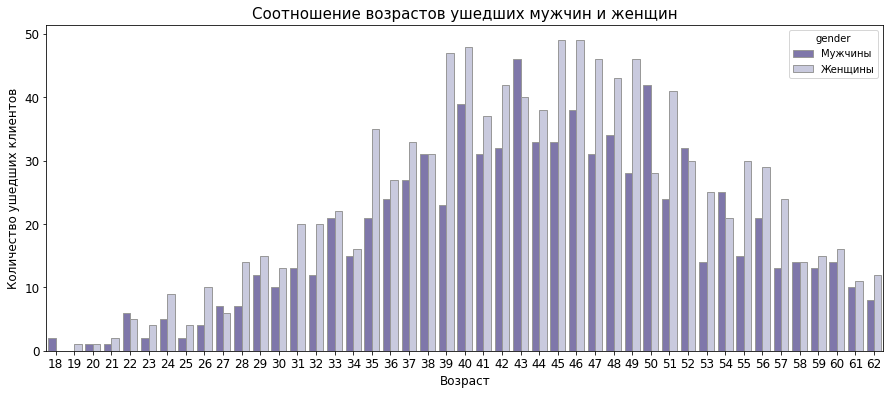

Медианный возраст ушедших мужчин: 44
Медианный возраст ушедших женщин: 44


In [177]:
plt.figure(figsize=(15, 6))
sns.barplot(data=men_women_ages, x='age', y='user_id', hue='gender', linewidth=1, edgecolor='#999999', palette='Purples_r')
plt.title('Соотношение возрастов ушедших мужчин и женщин', fontsize=15)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество ушедших клиентов', fontsize=12)
plt.tick_params(axis='both', labelsize=12)
plt.show()

sets_for_age_printer = [['Медианный возраст ушедших мужчин:', men], ['Медианный возраст ушедших женщин:', women]]
for i, d in sets_for_age_printer:
    print(i, int(d.age.median()))

Ровесники. Продолжим.

---
#### Количество используемых продуктов

Проверим как отличается поведение клиентов в этом аспекте:

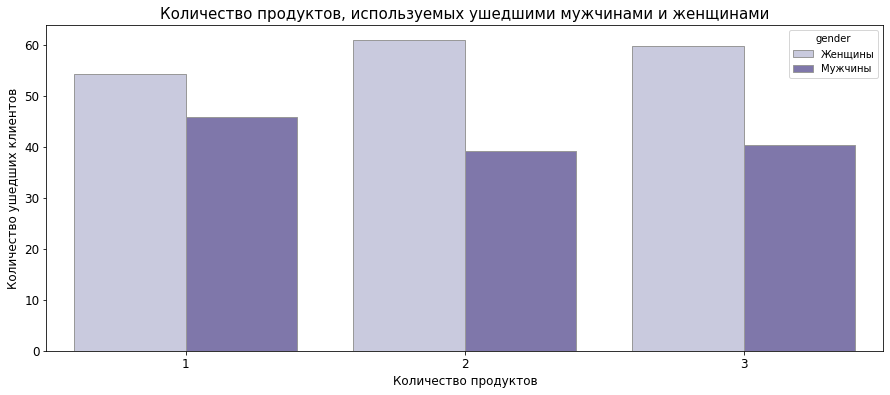

products,gender,user_id,percent
1,Женщины,716,54.24
1,Мужчины,604,45.76
2,Женщины,196,60.87
2,Мужчины,126,39.13
3,Женщины,157,59.70
3,Мужчины,106,40.30


In [178]:
pairbar('products', 'gender', 'Purples', 'products == 1', 'products == 2', 'products == 3',\
        'Количество продуктов, используемых ушедшими мужчинами и женщинами', 'Количество продуктов',\
        'Количество ушедших клиентов')

Женщины и мужчины чаще уходят имея 1 продукт, что мы видим в таблице.

---
#### Активность

Посмотрим насколько часто ушедшие пользуются продуктами банка:

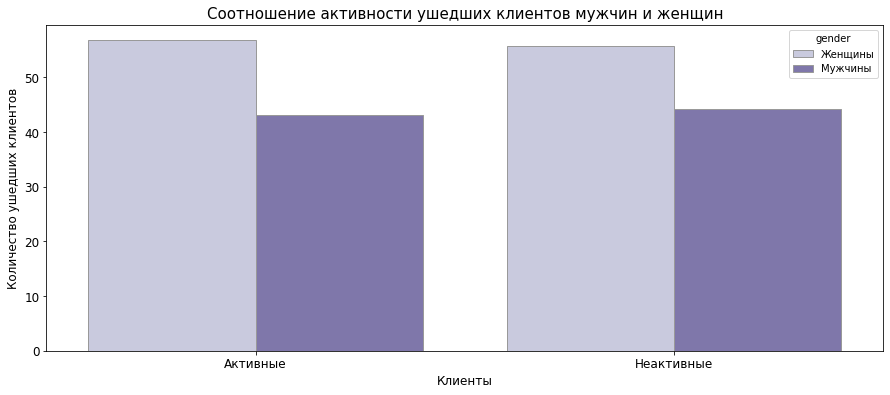

loyalty,gender,user_id,percent
Активные,Женщины,392,56.81
Активные,Мужчины,298,43.19
Неактивные,Женщины,677,55.72
Неактивные,Мужчины,538,44.28


In [179]:
pairbar('loyalty', 'gender',  'Purples', 'loyalty == "Активные"', 'loyalty == "Неактивные"', 'zero',\
        'Соотношение активности ушедших клиентов мужчин и женщин', 'Клиенты', 'Количество ушедших клиентов')

В целом, уходящие мужчины и женщины пользуются продуктами неактивно. Соотношение при этом схожее.

---
#### Сравнение портретов


**Портрет ушедшего клиента-мужчины**

Мужчина - это пользователь из любого города 44 лет, использует 1 продукт со средней периодичностью.

**Портрет ушедшего клиента-женщины**

Пользователь-женщина предпочитает редко использовать 1 продукт, ей 44 лет, город - любой.

---

**Выводы**

Вновь схожая картина ушедшего клиента. Продолжим работу.

---
> ### 3.3 Сегментация пользователей по возрасту

Учитывая, что у нас 45 возрастных значений, а исследование и так уже немного подзатянулось, мы снова выделим три возрастные группы. Но на этот раз мы гораздо лучше знакомы с данными и можем выделить сегменты молодых клиентов до 30 лет, взрослых - от 30 до 45 и старших - 46-62 года. У нас есть две концепции исследования портретов клиентов, здесь мы используем вторую. Начнём с "ребалансировки" групп:

In [180]:
df_undummies.drop(['age_group'], axis = 1, inplace = True)
age_groups = []
for ager in df_undummies.age:
    if ager < 30:
        age_groups.append('Молодые')
    elif ager <= 45:
        age_groups.append('Взрослые')
    else:
        age_groups.append('Старшие')
        
df_undummies.insert(6, 'age_group', age_groups, allow_duplicates = False)

---
#### Города

Посмотрим, какие города характерны для разных возрастов:

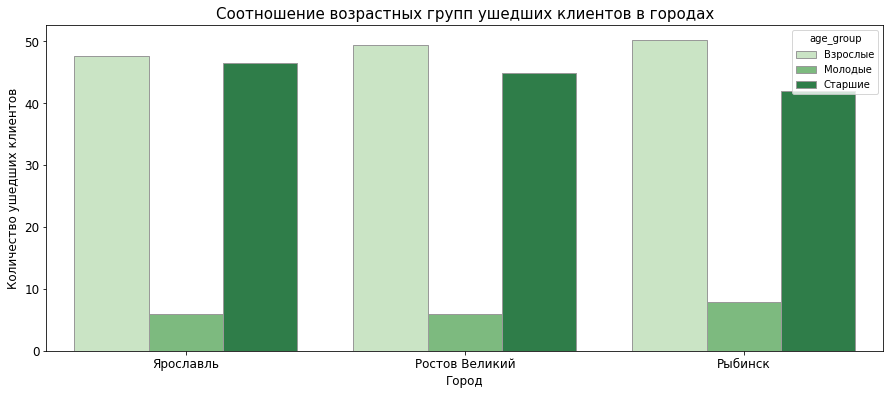

city,age_group,user_id,percent
Ярославль,Взрослые,362,47.57
Ярославль,Молодые,45,5.91
Ярославль,Старшие,354,46.52
Ростов Великий,Взрослые,376,49.28
Ростов Великий,Молодые,45,5.90
Ростов Великий,Старшие,342,44.82
Рыбинск,Взрослые,191,50.13
Рыбинск,Молодые,30,7.87
Рыбинск,Старшие,160,41.99


In [181]:
pairbar('city', 'age_group', 'Greens', 'city == "Ярославль"', 'city == "Ростов Великий"', 'city == "Рыбинск"',\
        'Соотношение возрастных групп ушедших клиентов в городах', 'Город', 'Количество ушедших клиентов')

Взрослые - самая объёмная группа, что, в общем-то, мы уже видели. Но уходят они ненамного чаще, чем **старшие - это явно тот сегмент, с которым нужно поработать**! Касательно взрослых, с одной стороны, такую большую группу не совсем правильно сегментировать, так как это основа банка, и клиентов слишком много, но для формальности мы сделаем это: ушедшие взрослые клиенты скорее всего обслуживаются в отделениях в Ростове Великом или Рыбинске; старшие - в Ярославле, а молодые - в Рыбинске. В целом, отток молодых клиентов выглядит незначительно в абсолютных значениях, с этой категорией клиентов у банка порядок.

---
#### Пол

Изучим соотношение возрастов и полов:

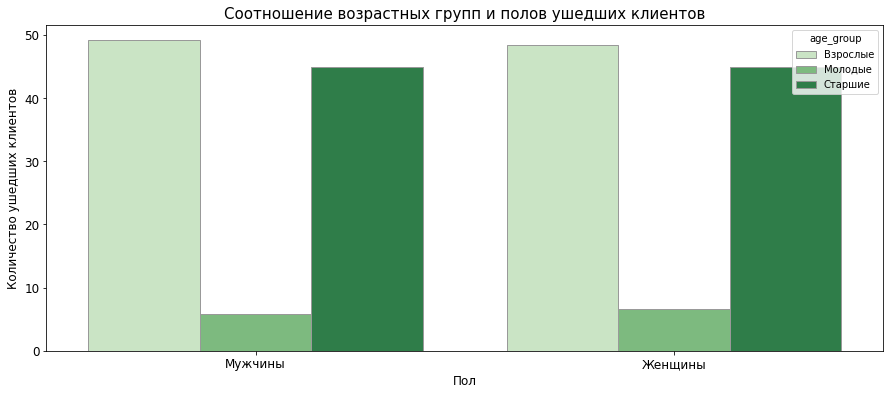

gender,age_group,user_id,percent
Мужчины,Взрослые,411,49.16
Мужчины,Молодые,49,5.86
Мужчины,Старшие,376,44.98
Женщины,Взрослые,518,48.46
Женщины,Молодые,71,6.64
Женщины,Старшие,480,44.90


In [182]:
pairbar('gender', 'age_group', 'Greens', 'gender == "Мужчины"', 'gender == "Женщины"', 'zero',\
        'Соотношение возрастных групп и полов ушедших клиентов', 'Пол', 'Количество ушедших клиентов')

В целом по возрастам картина схожа с предыдущей. Больших различий нет, женщины уходят чаще мужчин.

---
#### Количество используемых продуктов

Ознакомимся с показателями:

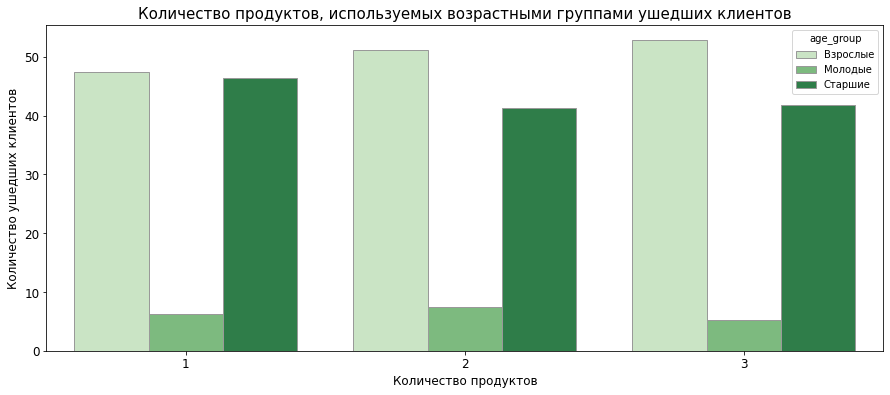

products,age_group,user_id,percent
1,Взрослые,625,47.35
1,Молодые,82,6.21
1,Старшие,613,46.44
2,Взрослые,165,51.24
2,Молодые,24,7.45
2,Старшие,133,41.30
3,Взрослые,139,52.85
3,Молодые,14,5.32
3,Старшие,110,41.83


In [183]:
pairbar('products', 'age_group', 'Greens', 'products == 1', 'products == 2', 'products == 3',\
        'Количество продуктов, используемых возрастными группами ушедших клиентов',\
        'Количество продуктов', 'Количество ушедших клиентов')

У взрослых чем больше продуктов - тем популярнее, старшие предпочитают обратный порядок, молодые чаще используют два продукта. Таблица же показывает, что все три сегмента ушедших клиентов чаще всего использовали один продукт.

---
#### Активность

Остался последний параметр перед финальной сегментацией на этом шаге:

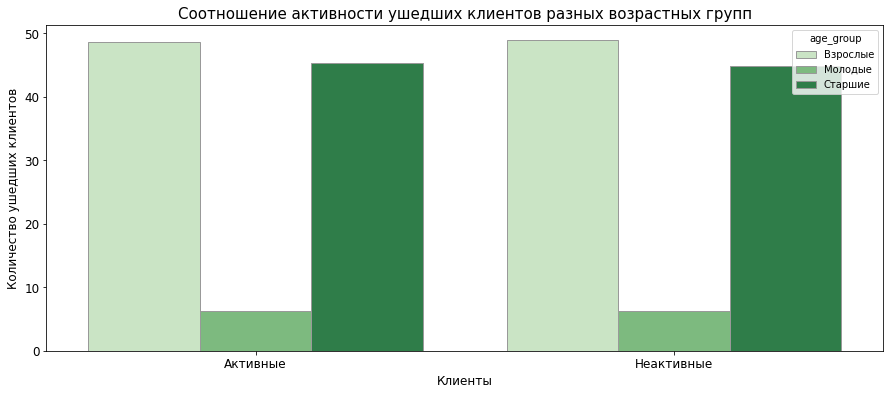

loyalty,age_group,user_id,percent
Активные,Взрослые,335,48.55
Активные,Молодые,43,6.23
Активные,Старшие,312,45.22
Неактивные,Взрослые,594,48.89
Неактивные,Молодые,77,6.34
Неактивные,Старшие,544,44.77


In [184]:
pairbar('loyalty', 'age_group', 'Greens', 'loyalty == "Активные"', 'loyalty == "Неактивные"', 'zero',\
        'Соотношение активности ушедших клиентов разных возрастных групп', 'Клиенты', 'Количество ушедших клиентов')

В соотношениях между собой показатели схожие, а в целом по таблице вновь мы видим что неактивные клиенты уходят чаще. Кстати, мы обозначили рост клиентской активности у наиболее старших клиентов на одном из этапов EDA.

---
#### Сравнение портретов

**Портрет молодого ушедшего клиента**

Во-первых, стоит отметить, что в целом это меньшая из трёх возрастных групп. На этапе исследовательского анализа мы также видели, что **ушли клиенты более высоких возрастов, наибольшая вероятность оттока у старших, а распределение возрастов оставшихся клиентов сдвинулось в пользу молодых**. В целом молодые женщины уходят чаще мужчин, используют один продукт.

**Портрет взрослого ушедшего клиента**

Взрослые - самая объёмный сегмент в Метанпромбанке. Уходящие клиенты этой категории отличаются обслуживанием в Ростове Великом или Рыбинске и использованием одного продукта.

**Портрет старшего ушедшего клиента**
Этот сегмент требует работы, потому что отток в нём очень большой. В целом все три группы объединяет низкая активность.

---

---
> ### 3.4 Сегментация пользователей количеству используемых продуктов

Для сегментации ушедших пользователей по количеству продуктов, мы используем ту же концепцию, которую мы использовади для городов. На основе нашей супер-функции magic_city_segmentation сделаем схожую функцию magic_products_segmentation, потому что на превращение magic_city_segmentation в универсальную функцию времени совсем не остаётся:

In [185]:
def magic_products_segmentation(prod, color_mf, number_mf_city_title, total_mf_city_title, color_age, age_city_title,\
                                color_prod, prod_city_title, color_loyalty, loyalty_city_title):
    prod = prod.replace({'gender': {'М': 'Мужчины', 'Ж': 'Женщины'}})
    prod_gender_segment = prod.groupby('gender')['user_id'].count().reset_index()
    
    prod_total = prod_gender_segment['user_id'].sum()
    wonder_percent(prod_gender_segment, 'user_id', prod)
    
    best_plot_ever(prod_gender_segment, 'gender', 'user_id', color_mf, number_mf_city_title,\
                   8, 2, 'Сегмент', 'Количество клиентов')
    print('\033[1m' + total_mf_city_title, prod_total, '\033[0m')
    sets_for_mf_printer = [['Доля женщин:', 0], ['Доля мужчин:', 1]]
    for i, d in sets_for_mf_printer:
        print(i, prod_gender_segment['percent'][d])
    
    prod_age_segment = prod.groupby('age')['user_id'].count().reset_index()
    best_plot_ever(prod_age_segment, 'age', 'user_id', color_age, age_city_title, 8, 2, 'Возраст', 'Количество клиентов')
    print('Медианный возраст клиента:', int(prod.age.median()))
    
    prod_city_segment = prod.groupby('city')['user_id'].count().reset_index()
    wonder_percent(prod_city_segment, 'user_id', prod)
    
    best_plot_ever(prod_city_segment, 'city', 'user_id', color_prod, prod_city_title,\
               8, 2, 'Город', 'Количество клиентов')
    sets_for_products_printer = [['Доля клиентов из Ростова Великого:', 0], ['Доля клиентов из Рыбинска:', 1],\
                                 ['Доля клиентов из Ярославля:', 2]]
    for i, d in sets_for_products_printer:
        print(i, prod_city_segment['percent'][d])
    
    prod_loyalty_segment = prod.groupby('loyalty')['user_id'].count().reset_index()
    wonder_percent(prod_loyalty_segment, 'user_id', prod)
    prod_loyalty_segment = prod_loyalty_segment.replace({'loyalty': {0: 'Неактивные', 1: 'Активные'}})
    
    best_plot_ever(prod_loyalty_segment, 'loyalty', 'user_id', color_loyalty, loyalty_city_title,\
               8, 2, 'Активность клиентов', 'Количество клиентов')
    sets_for_mf_printer = [['Доля неактивных клиентов:', 0], ['Доля активных клиентов:', 1]]
    for i, d in sets_for_mf_printer:
        print(i, prod_loyalty_segment['percent'][d])

In [186]:
one_prod = df_gone.query('products == 1').reset_index(drop=True)
two_prod = df_gone.query('products == 2').reset_index(drop=True)
three_prod = df_gone.query('products == 3').reset_index(drop=True)

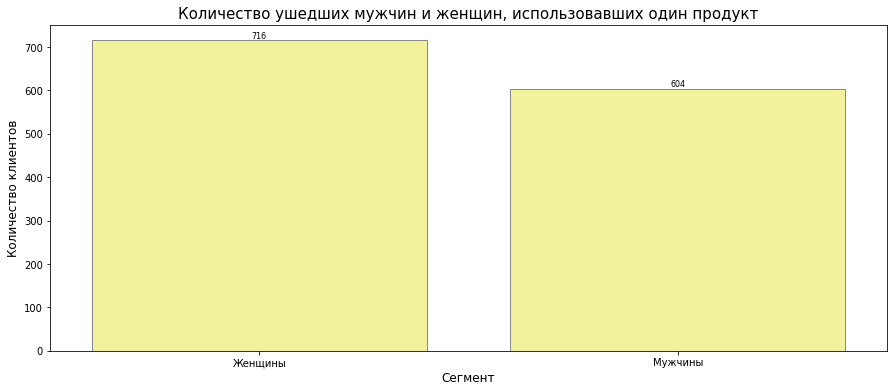

Всего ушедших клиентов, использовавших один продукт: 1320 
Доля женщин: 54.24%
Доля мужчин: 45.76%


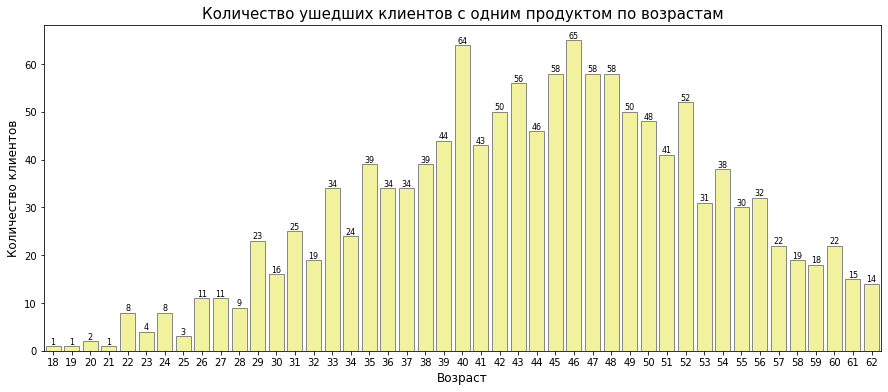

Медианный возраст клиента: 45


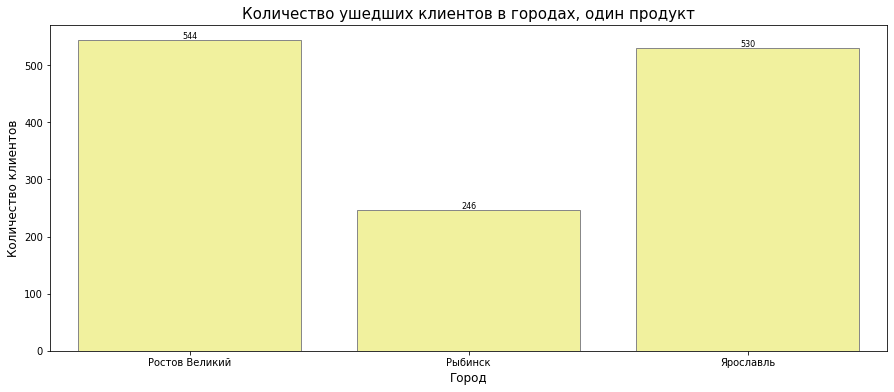

Доля клиентов из Ростова Великого: 41.21%
Доля клиентов из Рыбинска: 18.64%
Доля клиентов из Ярославля: 40.15%


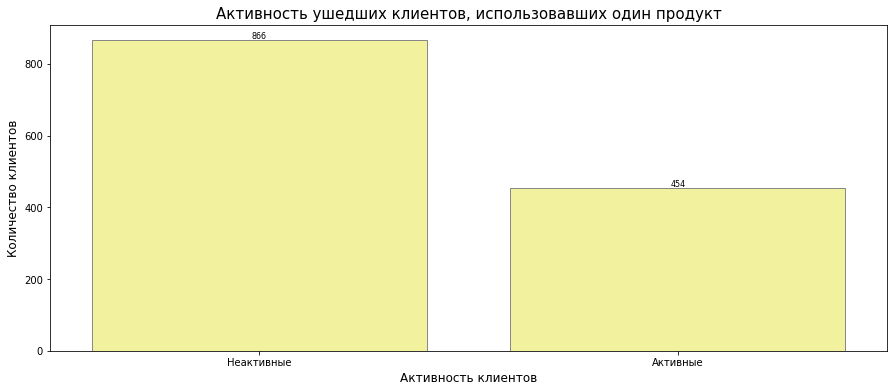

Доля неактивных клиентов: 65.61%
Доля активных клиентов: 34.39%


In [187]:
magic_products_segmentation(one_prod, '#ffff90', 'Количество ушедших мужчин и женщин, использовавших один продукт',\
                            'Всего ушедших клиентов, использовавших один продукт:', '#ffff90',\
                            'Количество ушедших клиентов с одним продуктом по возрастам',\
                            '#ffff90', 'Количество ушедших клиентов в городах, один продукт', '#ffff90',\
                            'Активность ушедших клиентов, использовавших один продукт')

---
**Портрет ушедшего пользователя с одним продуктом**

Женщина 35-56 лет, из Ростова Великого или Ярославля, неактивна.

---

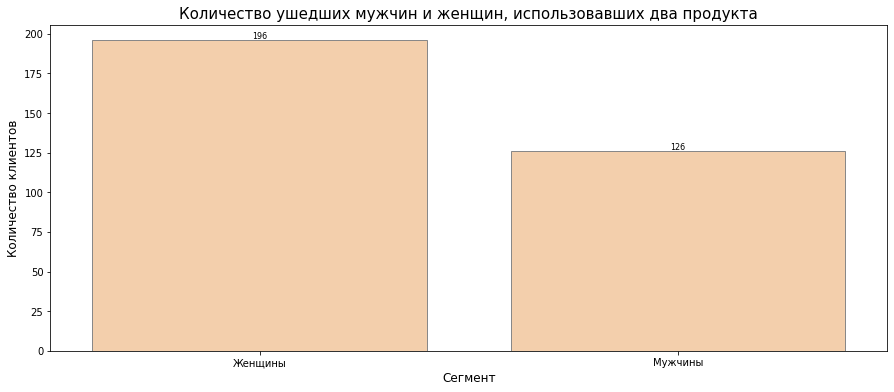

Всего ушедших клиентов, использовавших два продукта: 322 
Доля женщин: 60.87%
Доля мужчин: 39.13%


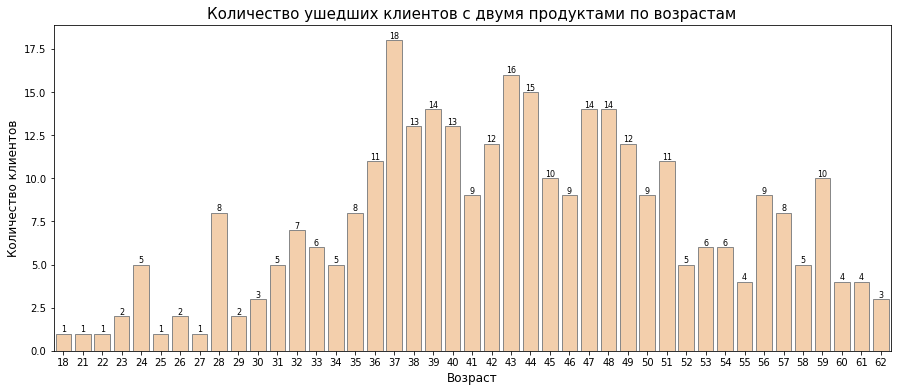

Медианный возраст клиента: 43


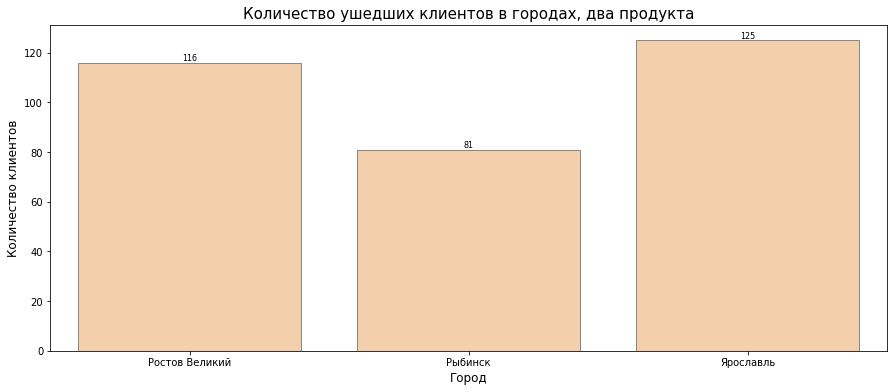

Доля клиентов из Ростова Великого: 36.02%
Доля клиентов из Рыбинска: 25.16%
Доля клиентов из Ярославля: 38.82%


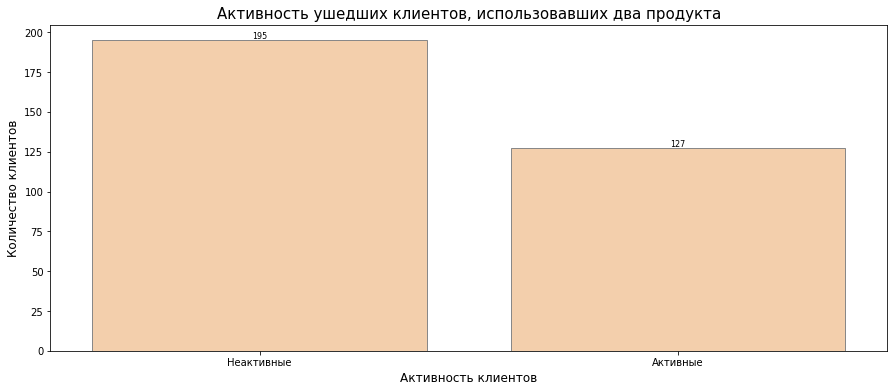

Доля неактивных клиентов: 60.56%
Доля активных клиентов: 39.44%


In [188]:
magic_products_segmentation(two_prod, '#ffcfa0', 'Количество ушедших мужчин и женщин, использовавших два продукта',\
                            'Всего ушедших клиентов, использовавших два продукта:', '#ffcfa0',\
                            'Количество ушедших клиентов с двумя продуктами по возрастам',\
                            '#ffcfa0', 'Количество ушедших клиентов в городах, два продукта', '#ffcfa0',\
                            'Активность ушедших клиентов, использовавших два продукта')

---
**Портрет ушедшего пользователя с двумя продуктами**

Картина очень схожа с предыдущей - женщина 36-59 лет, из Ростова Великого или Ярославля, с низкой активностью.

---

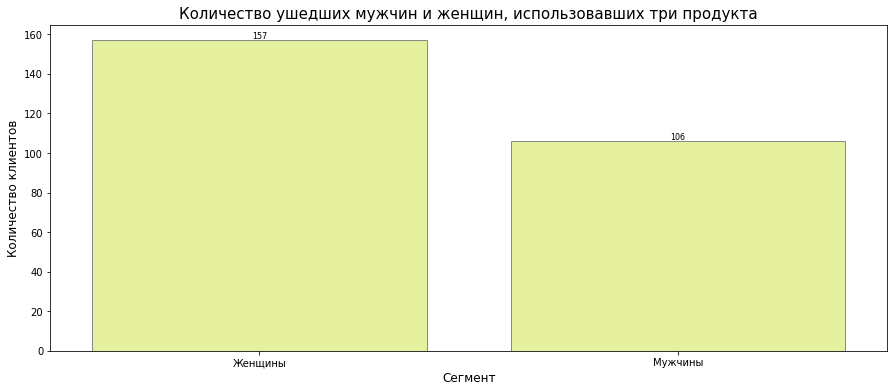

Всего ушедших клиентов, использовавших три продукта: 263 
Доля женщин: 59.7%
Доля мужчин: 40.3%


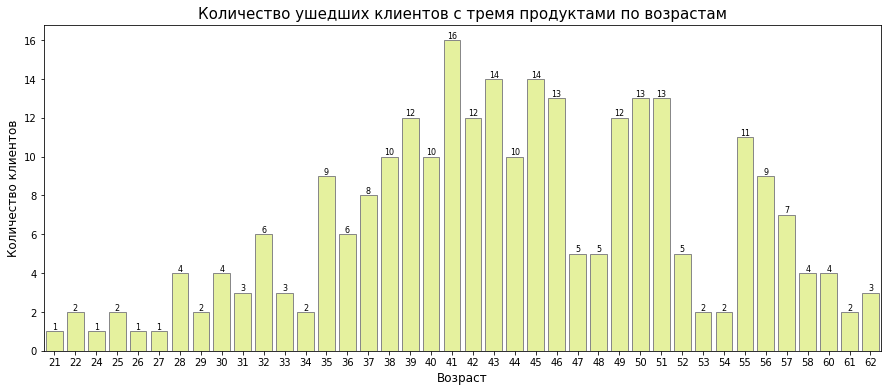

Медианный возраст клиента: 44


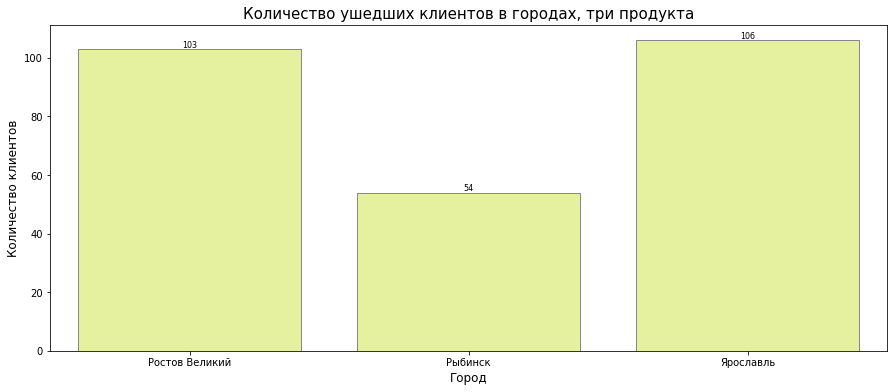

Доля клиентов из Ростова Великого: 39.16%
Доля клиентов из Рыбинска: 20.53%
Доля клиентов из Ярославля: 40.3%


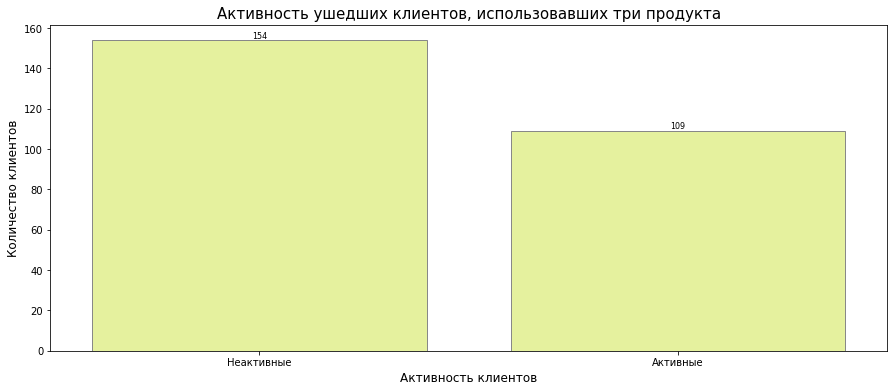

Доля неактивных клиентов: 58.56%
Доля активных клиентов: 41.44%


In [189]:
magic_products_segmentation(three_prod, '#efff90', 'Количество ушедших мужчин и женщин, использовавших три продукта',\
                            'Всего ушедших клиентов, использовавших три продукта:', '#efff90',\
                            'Количество ушедших клиентов с тремя продуктами по возрастам',\
                            '#efff90', 'Количество ушедших клиентов в городах, три продукта', '#efff90',\
                            'Активность ушедших клиентов, использовавших три продукта')

---
**Портрет ушедшего пользователя с тремя продуктами**

Это снова женщина, на этот раз 35-46 лет, из Ростова Великого или Ярославля, пользуется продуктами банка неактивно.

---

---
#### Сравнение портретов

**Портрет ушедшего пользователя с одним продуктом**

Женщина 35-56 лет, из Ростова Великого или Ярославля, неактивна..

**Портрет ушедшего пользователя с двумя продуктами**

Картина очень схожа с предыдущей - женщина 36-59 лет, из Ростова Великого или Ярославля, с низкой активностью.

**Портрет ушедшего пользователя с тремя продуктами**

Это снова женщина, на этот раз 35-46 лет, из Ростова Великого или Ярославля, пользуется продуктами банка неактивно.

---

---
> ### 3.5 Выделение сегментов

На это этапе у нас получилось выделить два явный сегмента оттока:
- **женщины 35-50 лет с одним продуктом и низкой активностью**;
- **клиенты страше 45 лет**;

Помимо этого, ранее мы выявили сегмент "Клиенты старше 46 лет с низкой активностью" - теперь мы можем подтвердить найденные закономерности. Сначала посмотрим отток этого сегмента, какой процент от общего числа клиентов составляют клиенты старше 46 лет и старше, и выясним насколько доля отточных клиентов в этом сегменте выше средней по банку:

In [190]:
total_churn = df['churn'].sum()
forty_six_low_loyalty_gone = df.query('age > 45 and loyalty == 0 and churn == 1')['user_id'].count()
forty_six_low_loyalty_devoted = df.query('age > 45 and loyalty == 0 and churn == 0')['user_id'].count()
forty_six_low_loyalty_churn_ratio = round(forty_six_low_loyalty_gone / (forty_six_low_loyalty_gone +\
                                                                        forty_six_low_loyalty_devoted) * 100, 2)
forty_six_low_loyalty_comparison = pd.DataFrame({'segment': ['Ушедшие', 'Оставшиеся'], \
                                            'clients': [forty_six_low_loyalty_gone, forty_six_low_loyalty_devoted]})


forty_six_low_loyalty_total_ratio = round((df.query('age > 45 and loyalty == 0')['user_id'].count()) /\
                                          df['user_id'].count() * 100, 2)
df_number_of_gone = df.query('churn == 1')['user_id'].count()
df_number_of_devoted = df.query('churn == 0')['user_id'].count()
df_churn_ratio = round(df_number_of_gone / (df_number_of_gone + df_number_of_devoted) * 100, 2)

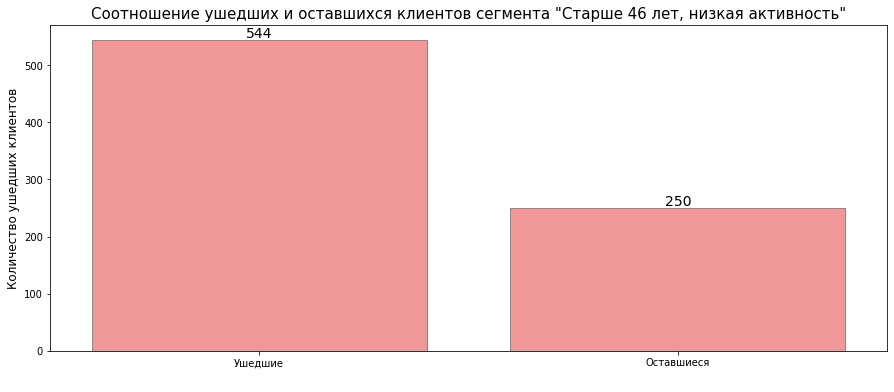

Доля оттока в сегменте "Старше 46 лет, низкая активность": 68.51 %
Средняя доля оттока по банку: 20.12 %
Превышение среднего оттока: 48.39 % 
Доля сегмента "Старше 46 лет, низкая активность" от общего числа клиентов: 8.39 %


In [191]:
best_plot_ever(forty_six_low_loyalty_comparison, 'segment', 'clients', '#ff8888', \
               'Соотношение ушедших и оставшихся клиентов сегмента "Старше 46 лет, низкая активность"',\
               14, 2, ' ', 'Количество ушедших клиентов')

print('Доля оттока в сегменте "Старше 46 лет, низкая активность":', forty_six_low_loyalty_churn_ratio, '%')
print('Средняя доля оттока по банку:', df_churn_ratio, '%')
print('\033[1m' + 'Превышение среднего оттока:', forty_six_low_loyalty_churn_ratio - df_churn_ratio, '%', '\033[0m')
print('Доля сегмента "Старше 46 лет, низкая активность" от общего числа клиентов:', forty_six_low_loyalty_total_ratio, '%')

Теперь выделим в отдельный сегмент женщин 35-50 лет с одним продуктом и низкой активностью и также построим график сравнения ушедших и оставшихся клиентов в сегменте:

In [193]:
w_mid_age_one_prod_low_act_gone = df.query('age >= 35 and age <= 50 and loyalty == 0 and churn == 1')['user_id'].count()
w_mid_age_one_prod_low_act_devoted = df.query('age >= 35 and age <= 50 and loyalty == 0 and churn == 0')['user_id'].count()
w_mid_age_one_prod_low_act_churn_ratio = round(w_mid_age_one_prod_low_act_gone / (w_mid_age_one_prod_low_act_gone +\
                                                                        w_mid_age_one_prod_low_act_devoted) * 100, 2)
w_mid_age_one_prod_low_act_comparison = pd.DataFrame({'segment': ['Ушедшие', 'Оставшиеся'], \
                                            'clients': [w_mid_age_one_prod_low_act_gone, w_mid_age_one_prod_low_act_devoted]})

w_mid_age_one_prod_low_act_total_ratio = round((df.query('age >= 35 and age <= 50 and loyalty == 0 and churn == 1')\
                                                ['user_id'].count()) / df['user_id'].count() * 100, 2)

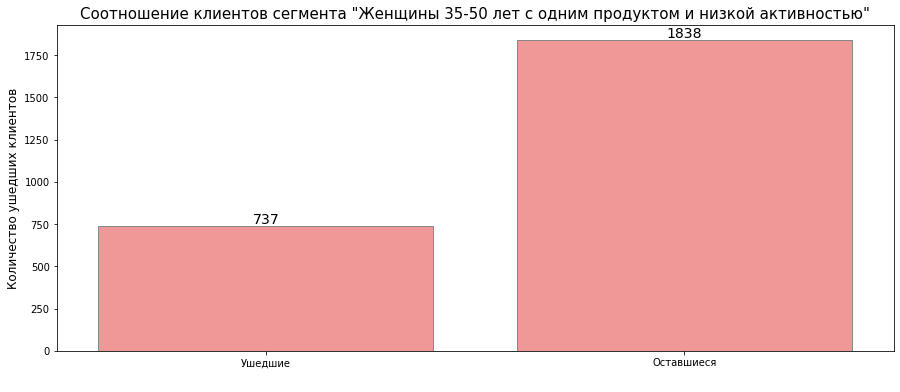

Доля оттока в сегменте "Женщины 35-50 лет с одним продуктом и низкой активностью": 28.62 %
Средняя доля оттока по банку: 20.12 %
Превышение среднего оттока: 8.5 % 
Доля сегмента "Женщины 35-50 лет с одним продуктом и низкой активностью" от общего числа клиентов: 7.78 %


In [194]:
best_plot_ever(w_mid_age_one_prod_low_act_comparison, 'segment', 'clients', '#ff8888', \
               'Соотношение клиентов сегмента "Женщины 35-50 лет с одним продуктом и низкой активностью"',\
               14, 2, ' ', 'Количество ушедших клиентов')

print('Доля оттока в сегменте "Женщины 35-50 лет с одним продуктом и низкой активностью":',\
      w_mid_age_one_prod_low_act_churn_ratio, '%')
print('Средняя доля оттока по банку:', df_churn_ratio, '%')
print('\033[1m' + 'Превышение среднего оттока:', w_mid_age_one_prod_low_act_churn_ratio - df_churn_ratio, '%', '\033[0m')
print('Доля сегмента "Женщины 35-50 лет с одним продуктом и низкой активностью" от общего числа клиентов:',\
      w_mid_age_one_prod_low_act_total_ratio, '%')

---
**Выводы**

Мы выявили два сегмента оттока:

**1. Клиенты старше 46 лет с низкой активностью**:
- 544 ушедших клиента, 250 оставшихся;
- Доля оттока в сегменте: 68.51 %
- Средняя доля оттока по банку: 20.12 %
- Превышение среднего оттока: 48.39 % 
- Доля сегмента от общего числа клиентов: 8.39 %

**2. Женщины 35-50 лет с одним продуктом и низкой активностью**
- 737 ушедших клиентов, 1838 оставшихся;
- Доля оттока в сегменте: 28.62 %
- Средняя доля оттока по банку: 20.12 %
- Превышение среднего оттока: 8.5 % 
- Доля сегмента от общего числа клиентов: 7.78 %

Для работы приоритетнее сегмент "Женщины 35-50 лет с одним продуктом и низкой активностью", потому что в банке остаётся большое число клиентов сегмента, и есть возможность повлиять на их отток.

---

---
## <center> 4. Формулировка и проверка статистических гипотез </center> 

Остаётся последний шаг нашей работы - проверить гипотезы. В нашем распоряжении:

- Гипотеза о разнице дохода клиентов с разным количеством продуктов;

- Гипотеза о разнице среднего возраста клиентов в группах с оттоком и без оттока.

Приступим к проверке.

---
> ### 4.1 Гипотеза о разнице дохода клиентов с разным количеством продуктов

Нулевая гипотеза звучит так: "Доходы клиентов с разным количеством продуктов не различаются," - тогда альтернативная гипотеза: "Доходы клиентов с разным количеством продуктов различаются". Сгруппируем данные и проведём t-test, так как этот тест подходит для номральных распределений:

In [195]:
df_income = df

In [196]:
df_income_one = df_income.loc[(df_income['products'] == 1), 'estimated_salary']
df_income_several = df_income.loc[(df_income['products'] >= 2), 'estimated_salary']

alpha = 0.05

results = st.ttest_ind(df_income_one, df_income_several, equal_var=False)

print('P-value:', round(results.pvalue, 2))

if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

P-value: 0.34
Не получилось отвергнуть нулевую гипотезу


Мы видим что p-value больше значения alpha, что позволяет сказать, что данные не противоречат нулевой гипотезе - не отвергаем.

---
> ### 4.2 Гипотеза о разнице среднего возраста клиентов в группах с оттоком и без оттока

Нулевая гипотеза: "Средние возраста клиентов в группах с оттоком и без оттока не различаются," - альтернативная гипотеза: "Средние возраста клиентов в группах с оттоком и без оттока различаются". Чтобы проверить нулевую гипотезу, нам следует сгруппировать датасет по оттоку и провести t-test:

In [197]:
df_mean_age_gone = df.loc[(df['churn'] == 1), 'age']
df_mean_age_devoted = df.loc[(df['churn'] == 0), 'age']

alpha = 0.05

results = st.ttest_ind(df_mean_age_gone, df_mean_age_devoted, equal_var=False)

print('P-value:', round(results.pvalue, 2))

if results.pvalue > alpha:
    print('Не получилось отвергнуть нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

P-value: 0.0
Отвергаем нулевую гипотезу


Совершенно ожидаемый результат, отвергаем нулевую гипотезу.

---
**Выводы**

Мы выяснили, что данные не противоречат гипотезе об отсутствии разницы доходов клиентов с разным количеством продуктов, а гипотезу об отсутствии разницы среднего возраста клиентов в группах с оттоком и без мы отвергли.

---

---
## <center> Выводы и рекомендации </center> 

Перед нами стояло немало задач, которые мы смогли выполнить в процессе работы с предоставленными файлами.

Мы получили данные и ознакомились с ними, выполнили **предобработку данных**, а именно: загрузили данные и ознакомились с ними, убедились, что в датасете нет пропусков и дубликатов, изменили регистр названий столбцов и переименовали некоторые из них, добавили столбцы с возрасными группами, уровнем дохода и оценкой кредитного рейтинга.

Затем мы провели **исследовательский анализ данных**, в ходе которого ознакомились с графиками и распределениями, избавились от выбросов. Выводы, получение от изучения данных таковы:
- у клиентов примерно **до 40 лет отток ощутимо ниже**, чем у более возрастных;
- **если у клиента 4 продукта - значит он уйдёт**;
- **кредитная карта - крайне популярный продукт** в нашем банке, у 70.5% она есть в наличии;
- **почти половина продуктов банка** - это кредитные карты;
- отток неактивных клиентов почти в **2 раза выше**, чем активных;
- общий отток клиентов составляет **около 20%** от числа клиентов;
- **клиенты оттока** старше и менее активно пользуются продуктами банка, чем оставшиеся в банке клиенты;
- **в Ростове Великом отток в два раза выше**;
- **женщины уходят значительно чаще мужчин**;
- **у клиентов с 3 продуктами** очень высокая вероятность оттока - 0.83;
- **у клиентов с 2 продуктами** наименьшая вероятность оттока - 0.07;

После этого мы построили **матрицу корреляций**, и многие наши выводы подтвердились - мы увидели некоторую корреляцию оттока со следующими данными: возраст, количество продуктов, активность, нахождение в Ростове Великом, пол клиентов, возрастные группы "Взрослые" и "Молодые".

Затем мы приступили к **сегментации пользователей**, которую проводили по 5 параметрам: **география, пол, возраст, количество используемых продуктов, активность**. Вкупе с исследовательским анализом данных мы определили два крупных сегмента оттока:

**1. Клиенты старше 46 лет с низкой активностью**:
- 544 ушедших клиента, 250 оставшихся;
- Доля оттока в сегменте: 68.51 %
- Средняя доля оттока по банку: 20.12 %
- Превышение среднего оттока: 48.39 % 
- Доля сегмента от общего числа клиентов: 8.39 %

**2. Женщины 35-50 лет с одним продуктом и низкой активностью**
- 737 ушедших клиентов, 1838 оставшихся;
- Доля оттока в сегменте: 28.62 %
- Средняя доля оттока по банку: 20.12 %
- Превышение среднего оттока: 8.5 % 
- Доля сегмента от общего числа клиентов: 7.78 %

**Для работы приоритетнее сегмент "Женщины 35-50 лет с одним продуктом и низкой активностью"**, потому что в банке остаётся большое число клиентов сегмента, и есть возможность повлиять на их отток.

В конце нашего исследования мы **проверили гипотезы** о разнице дохода клиентов с разным количеством продуктов и о разнице среднего возраста клиентов в группах с оттоком и без оттока. В результате проверок мы выяснили, что данные не противоречат гипотезе об отсутствии разницы доходов клиентов с разным количеством продуктов, а гипотезу об отсутствии разницы среднего возраста клиентов в группах с оттоком и без мы отвергли.

---

**Наши предложения** для стратегии взаимодействия с клиентами и их удержания таковы:

- **Крайне популярный продукт - кредитная карта** - стоит использовать этот фактор для удержания и превлечения клиентов;
- **Женщины 35-50 лет с одним продуктом и низкой активностью** - возможно, как раз _кредитные карты_, при правильной их подаче (например, для шопинга или покупки "нового айфона, который так просит дочка") могут увеличить активность этого сегмента. Также этой аудитории может быть интересен _кредит на обучение детей_ клиентов;
- **Клиенты старше 46 лет с низкой активностью** - вероятно здесь может пригодиться _кредит_, например, на строительство дачи, и _вклады_ с конкурентоспособной процентной ставкой;
- **Необходимо обратить внимание на работу офиса в Ростове Великом** - доля оттока там составляет 31.38% от числа клиентов.

---
### <center> Ссылки </center> 

Итоговая презентация PDF:  <https://disk.yandex.ru/i/fb_XIMAPiNReug> 

---